# Лабораторная работа 1. Основы построения нейронных сетей в PyTorch

**Внимание:** в самостоятельных заданиях иногда требуется ***записать, выписать*** какие-то значения. Выписывайте их себе ***обязательно***, они потребуются для сравнения результатов при сдаче лабораторной. Желательно не путаться, оформлять заметку или электронную таблицу как вам удобно, но так, чтобы ***вы сами могли вспомнить, какие числа и где записанные что означают***. Оправдания вида "я уже забыл, что это" ***не принимаются***, плохие ответы на вопросы преподавателя негативно влияют на оценку.<br><br>
Также в этом курсе для сдачи лабораторной ***недостаточно ответить на вопросы***, нужно после всей работы преподавателю ***лично показать, как вы выполняете те или иные простые дейтствия, навыки работы с которыми вы приобрели в ходе лабораторной***.

## Установка и импорт библиотек

&emsp;`Pytorch` - опенсорсный фреймворк для машинного обучения, в том числе для построения нейронных сетей. Состоит из трех библиотек:<br>
<ul>
<li>torch - основная библиотека, общий набор методов, функций и т.п. для машинного обучения;</li>
<li>torchvision - методы для базовой обработки изображений и видео, наборы датасетов и моделей компьютерного зрения;</li>
<li>torchaudio - методы обработки, датасеты и модели для аудио.</li>
</ul>

&emsp;Установим все модули данного набора (и на всякий случай `numpy`, `matplotlib`, если отсутствовали).

В дальнейшем понадобится использовать GPU для вычислений (поддерживается только Nvidia). Поэтому для установки `torch`, `torchvision` и `torchaudio` нужно использовать специализированную версию CUDA. Чтобы ее получить перейдите по ссылке: https://pytorch.org/get-started/locally/ и выберите вашу версию системы и `Compute Platform` с CUDA (обычно по умолчанию все уже выбрано), создайте новую ячейку и запустите тот код, что предложил Pytorch на странице выше (добавьте в установку `torchaudio` в этот код). Второй стркой приведен пример установки актуальных на 2025 г версии библиотек Pytorch для Windows 

In [1]:
!pip install numpy matplotlib
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://download.pytorch.org/whl/cu126



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


&emsp;Центральное понятие `pytorch`, как и `tensorflow` - тензоры. **Тензор - это многомерный массив**. Так, например, **вектор является одномерным тензором, матрица - двухмерным, изображение - трехмерным** (две размерности задают положение пиксела в изображении, третье измерение - вектор цветов RGB или другой цветовой системы) и т.д. По существу машинное обучение во многом сводится к операциям над тензорами (сложение, умножение и др. - их великое множество). Несмотря на то, что код `pytorch` запускается через python, сами операции над тензорами компилируются в C++ для более оптимального выполнения на CPU/GPU.<br>
Начнем с импорта модуля `pythorch`, для доступа к нему используется название `torch`.<br>
Модули `torch.nn` и `torch.optim` будут использованы далее при обучении нейронных сетей.

In [ ]:
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

## Часть 1. Азы pytorch

&emsp;Создадим двухменый тензор из 5 строк по 3 элемента в каждой. Метод `zeros` позволяет создать произвольного размера тензор, заполненый нулями. Как видим, тип числовых значений в тензоре float32. 

In [ ]:
tensor_zeros = torch.zeros(5, 3)
print(tensor_zeros)
print(tensor_zeros.dtype)

&emsp;Размеры каждого из измерения ("стороны" тензора) задаются через запятую, ниже, например, задан тензор единиц 4x4x3 (такой тензор можно было бы вывести как черное изображение размером 4x4, 3 отвечает за 3 канала - красный цвет, зеленый цвет, синий цвет, но можно добавить 3 канал - прозрачность) методом `ones`.

In [ ]:
torch.ones(3, 4, 4)

Собственно выведем массив в виде изображения, для этого понадобится метод `transforms.ToPILImage()` из библиотеки `torchvision`. Здесь вы должны видеть белый прямоугольник 100x200 пикселей. Метод `float` здесь преобразует тип тензора в `float32`, а `transforms.ToPILImage()`, если в тензоре значения лежат в диапазоне 0...1, сам преобразует их в диапазон 0...255, приемлемый для изображений.

In [ ]:
trans = transforms.ToPILImage()
trans(torch.ones(3, 100, 200).float())

&emsp;Но для изображений тип данных float32 излишен, можно вручную задать тип значений аргументом `dtype`. Зададим тензор, аналогичный тому, что представлен выше, но сменим тип данных на int16 (-32768...32767).

In [ ]:
tensor_ones = torch.ones((4, ???, ???), dtype=torch.int16)
print(tensor_ones)

Чтобы вывести изображение в виде целых чисел, нужно преобразовать его тип к `uint8`, но стандартного метода для этого в `Pytorch`,  аналогичного `float` нет. Поэтому приходится явно вызывать метод преобразования `to` для тензора и в аргументах метода указывать тип `torch.uint8`. Выведите в ячейке ниже в виде изображение тензор `tensor_ones`, преобразовав его сперва к нужному типу.

Чтобы получить сведения о том, в каком диапазоне могут лежать числа того или иного типа, можно использовать метод `iinfo`. Его атрибуты `min` и `max` дают соответственно нижнюю или верхнюю границу диапазона данного типа чисел. Помимо `int` также существуют типы `uint`, если не знаете, чем они отличаются от обычных `int`, смените `int16` на `uint16` в ячейке и посмотрите. 

In [ ]:
print(torch.iinfo(torch.int16))
torch.iinfo(torch.int16).min

&emsp;Метод `rand` класса `torch` аналогичен `zeros` и `ones` того же класса, но инициализируется случайными значениями (float32) от 0 до 1. Если необходимо в разных местах кода сгенерировать случайные, но одинаковые тензоры - перед строкой с генеацией нужно вызвать метод `manual_seed` с одинаковым числом в качестве аргумента.

In [ ]:
torch.manual_seed(42)
r1 = torch.rand(2, 2)
print('Случайный тензор 2х2')
print(r1)

r2 = torch.rand(2, 2)
print('Другой случайный тензор:')
print(r2)

torch.manual_seed(42)
r3 = torch.rand(2, 2)
print('Должен совпадать с первым:')
print(r3)

Но `rand` создает числа `float32` в диапазоне от 0 до 1 включительно. Если нужно здать массив целых чисел, то следует использовать метод `randint`, который генерирует числа в указанных границах (первые 2 аргумента) в виде тензора указанного размера (последний аргумент). Как и для `ones`, `zeros` и подобных методов, можно добавить аргумент `dtype` для смены типа чисел.  

In [ ]:
torch.randint(0, 10, (3,3,3))

**Самостоятельное задание:**
* задайте в ячейке ниже тензор для изображения, содержащий случайные целые значения;
* размер изображения (как ширина, так и высота) должен совпадать с последней (младшей) цифрой вашего варианта + 1, умноженной на 100;
* подберите такой тип чисел, чтобы он совпадал с диапазоном изобраений (0...255) и задайте его генерируемому тензору;
* границы генерации случайных чисел задавайте c помощью метода `iinfo` с учетом выбранного типа чисел;
* выведите полученный тензор как изображение (преобразовывать тип не нужно, если вы корректно подобрали тип чисел).

&emsp;Ниже пример простых математических операций над тензорами.

In [ ]:
ones = torch.rand(2, 2, 3)
print('Первый:')
print(ones)

twos = torch.rand(2, 2, 3) * 2 # умножение всех элементов на константу 2
print('Второй:')
print(twos)

threes = ones + twos       # сложение допускается для тензоров однаковой размерности
print('Сумма тензоров:')
print(threes)              # выведется поэлементное сложение тензоров
print(threes.shape)        # размерность нового тензора совпадает с исходными

&emsp;К тензорам можно применять и другие операции - как поэлементные, так и из линейной алгебры (как при работе с матрицами).

In [ ]:
r = torch.rand(2, 2) - 0.5 * 2 # зададим матрицу (тензор 2х2) со случайными значениями от -1 до 1
print('Случайная матрица, r:')
print(r)

# Общие математические операции применимы к тензорам поэлементно:
print('\nМодуль элементов r:')
print(torch.abs(r))

# Тригонометрические функции:
print('\nАрксинус элементов r:')
print(torch.asin(r))

# Элементы линейной алгебры:
print('\nОпределитель r:')
print(torch.det(r))
print('\nСингулярное разложение r:')
print(torch.svd(r))

# Статистические функции:
print('\nСреднее и СКО в r:')
print(torch.std_mean(r))
print('\nНаибольшее в r:')
print(torch.max(r))

Получить тензор из массива `numpy` очень просто, поскольку "под капотом" `Pytorch`, во многом, и находится `numpy`. Сперва создадим сам многомерный массив `numpy` из единиц.

In [ ]:
width, length = 128, 256
np_arr = np.array([np.ones((width, length)),np.ones((width, length)), np.ones((width, length))])
np_arr

Теперь осуществим преобразование, для которого нужно вызвать метод `torch.tensor()`. В ячейке ниже задайте код для вывода полученного тензора в виде изображения.

**Самостоятельное задание:**
* добейтесь комбинацией `zeros` и `ones` выше (сейчас только ones) того, чтобы цвет прямоугольника, выводимого после предыдущей ячейки, соответствовал заданному вариантом (см. ниже);
* цвет 1 для вариантов, последняя цифра которых 0, 3 или 6;
* цвет 2 для вариантов, последняя цифра которых 1, 4, 7 или 9;
* цвет 3 для вариантов, последняя цифра которых 2, 5 или 8;
* размер прямоугольника (как ширина, так и высота) должен совпадать с последней (младшей) цифрой вашего варианта + 1, умноженной на 100;
* оставшийся `zeros` массив замените на массив случайных чисел (`np.random.rand`, при этом метод принимает не `tuple` аргументом, а числа через запятую);
* сами цвета:<br>
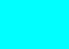<br>
Цвет 1<br>
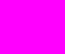<br>
Цвет 2<br>
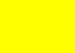<br>
Цвет 3<br>

## Часть 2. Создание полносвязной нейронной сети в PyTorch

### Загрузка и подготовка данных

&emsp;При загрузке стандартных датасетов можно применять к ним преобразования различного вида. Метод ```transforms.compose``` из ```torchvision``` позволяет создать конвейер из нескольких преобразований, которые будут применяться к загружаемым изображениям последоваельно.<br>
&emsp;Метод ```ToTensor``` преобразует изображения в тензор, а ```Normalize(mean, std)`` - осуществляет нормализацию, приведение числовых значений яркости пикселов к одному диапазону по формуле:<br>
$$output_{Normalize}(input)=\frac{input-mean}{std}​$$
и поскольку значения яркости изначально от 0 до 1, данная формула с теми аргументами, которые указаны сейчас, даст среднее значение 0 и СКО 0.5 в новых данных. 
&emsp; `Normalize` работает по каналам, и поскольку используемый далее датасет монохромный, здесь указывается нормализация по одному каналу, если бы нужно было нормализовать цветное изображение без прозрачности (3 канала), то метод выглядел бы как `Normalize((mean1, mean2, man3), (std1, std2, std3))`.

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(0.5, 0.5)])

&emsp;Метод ```torchvision.datasets.xxx``` дает возможность загрузить тот или иной датасет (в модуле datasets присутствует множество датасетов, как понятно из названия библиотеки - изображений). Аргументы:
* ```root``` указывает путь, по которому (относительно расположения текущего файла) будут загружены изображения датасета; 
* ```train=True``` указывает, что в переменную ```trainset``` будут записана только обучающая выборка из всего датасета; 
* ```download=True``` указывает на необходимость скачивания датасета (если уже был скачан - даже при ```download=True``` повторной загрузки не произойдет);
* ```transform``` указывает на переменную, содержащую применяемые к датасету после загрузки преобразования.<br>
Загрузим датасет MNIST (рукописные цифры, монохромные - 1 канал цвета, размер 28x28).

In [ ]:
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)

&emsp;После загрузки файлов датасета необходимо инициализировать их, загрузить в память. В терминах pytorch это означает создать загрузчик данных, здесь он записывается в переменную ```trainloader```. Используемый для загрузки подкласс ```torch.utils.data.DataLoader``` позволяет загрузить датасет в память, и при обучении/проверке данные датасета будут подаваться батчами (порциями). Данный подкласс принимает в качестве аргументов:
* переменную с загруженным датасетом (```trainset```);
* размер батча ```batch_size``` (число образцов данных, после которого при обучении будут корректироваться веса нейросети);
* параметр перемешивания ```shuffle``` (для лучшего обучения данные стоит перемешать);
* число потоков при загрузке данных ```num_workers``` (не стоит указывать его большим числом, чем число ядер вашего процессора).

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True)

Аналогично загружаем тестовую часть того же датасета и создааем для нее загрузчик. 

In [ ]:
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False)

### Визуализация обучающих данных

Чтобы лучше понять, с какими данными мы работаем, давайте визуализируем несколько изображений из обучающего набора. Для чего их необходимо денормализовать (вернуть исходные значения) и поменять местами стороны (транспонировать, получив из тензора изображение), что осуществляет заданная здесь функция ```imshow```. Код ниже выведет первые 9 изображений из первого батча и подпишет их соответствующими метками классов. 

In [ ]:
# Получаем один батч изображений, создав итератор 
# (условно массив) стадартным методом iter,
# в нем содержатся изображения и номера классов,
# которые выгружаем в images и labels
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Создаем сетку 3x3 для отображения
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    # Отменяем нормализацию для корректного отображения
    img = images[i] * 0.5 + 0.5
    # И извлекаем данные пикселов, выводим изображением
    npimg = img.numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)))
    ax.set_title(f"Класс: {labels[i]}")
    ax.axis('off')
plt.show()

**Самостоятельное задание:**
* смените число изображений выше с 9 на $2(3+N)$, где $N$ - последняя цифра вашего номера варианта.

### Определение архитектуры модели


Создадим нейронную сеть для классификации выбранного датасета на `pytorch`. В данном фреймворке модель создается в виде класса, наследника базового класса ```nn.Module ```из библиотеки pytorch, именно он содержит базовые параметры нейросетей. Структура модели указывается в методе ```__init__```.<br>
&emsp;Первой строкой в нем должна быть ```super().__init__()``` Для верной инициализации всех параметров согласно высшему в иерархии классу (берутся значения по умолчанию из `nn.Module`).<br>
&emsp;Далее определяются сами слои ```Linear``` полносвязный слой без активации.<br>
&emsp;Обратите внимание, что число нейронов слоя - это параметр ```out_features```. Для правильной работы нейросети необходимо, чтобы число входов слоя ```in_features``` совпадало с числом нейронов ```out_features``` предыдущего слоя.<br>
&emsp;Но никаких преобразований при инициализации объекта класса `Net` не произойдет - метод ```__init__``` лишь задает слои. Для возможности обучения нейросети в ней задается метод ```forward``` (в отличие от Tensorflow, где задание слоев означает создание конвейера, который последовательно обрабатывает входные данные). В методе `forward` мы описываем последовательность прохождения данных через эти слои и функции активации (`ReLU`, `TanH`).
&emsp;Также важной здесь является строка ```x.view...```. Она преобразует данные из многомерного вида в одномерный вектор, поскольку на входе изображение (многомерный тензор), а полносвязные слои не могут работать с ними, могуь лишь с векторами. Поэтому данная строка кода "разворачивает" поданный на него многомерный тензор по строкам в один длинный вектор.<br>
&emsp;Первая строка в `forward` нужна для преобразования входных данных во `float` на случай, если они отличаются от этого типа (например, когда яркость на изображении задана диапазоном целых чисел 0...255).

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features= 28 * 28, out_features = 128)
        self.fc2 = nn.Linear(in_features = 128, out_features = 64)
        self.fc3 = nn.Linear(in_features = 64, out_features = 10)

    def forward(self, x):
        x = x.float()
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

Теперь создадим экземпляр нашей сети. Для применения модели к входным данным нужно использовать `net(im_data)`.

In [ ]:
net = Net()

&emsp;Теперь нужно создать функцию потерь - именно она будет позволять обучиться модели. Для обучения моделей, выполняющих классификацию, чаще всего достаточно использовать функцию кросс-энтропии (```nn.CrossEntropyLoss```, она уже включает в себя активацию Softmax).<br>
&emsp;Также зададим оптимизатор AdamW для лучшего обучения нейросети. Здесь используется 3 аргумента: ```params``` - содержит ссылку на параметры объекта созданной модели нейросети, ```lr``` - learning rate, темп обучения, задает шаг смещения к минимуму функции потерь оптимизатором на каждой итерации обучения, ```weight_decay``` - вводимая для предотвращения переобучения (регуляризации) поправка.

**Если вы заменяете в ходе задания оптимизатор, не забывайте выполнять предыдущую ячейку (с определением объекта класса модели) для сброса параметров нейронной сети.**

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(params=net.parameters(), lr=3e-4, weight_decay=1e-2)

**Самостоятельное задание:**
*ниже имеется 2 пустых ячейки для вашего кода*
* создайте в первой ячейке ниже переменную `tens`, которой присвойте значение - тензор случайных чисел `float` от 0 до 1, совпадающий по размерам с изображениями датасета MNIST (учитывая канал цвета);
* выведите `tens` в формате изображения там же;
* во второй ячейке примените к созданному тензору созданную нейросеть и выведите результат (предсказания номера класса изображения).

### Обучение модели

Определим функцию `train_model`, которая реализует цикл обучения. На каждой эпохе мы итерируемся по `trainloader`, на каждом шаге выполняем прямой проход, вычисляем потери, выполняем обратное распространение ошибки для вычисления градиентов и обновляем веса модели с помощью оптимизатора.

In [ ]:
def train_model(net, criterion, optimizer, epochs=5):
    for epoch in range(epochs):
        running_loss = 0.0 # обнуляем значение функции потерь перед эпохой
        for _, data in enumerate(trainloader, 0):
            # извлекаем данные: inputs изображения, labels - номера классов
            inputs, labels = data

            # обнуляем градиент, иначе накопится "импульс" градиента
            # и обучения не произойдет
            optimizer.zero_grad()

            # применяем функцию forward из класса
            outputs = net(inputs)
            # вычисляем потери по предсказанным классам
            # outputs и реальным labels
            loss = criterion(outputs, labels)
            # распространяем ошибку назад
            loss.backward()
            # выполняем шаг оптимизации
            optimizer.step()

            running_loss += loss.item()
        print(f'Эпоха {epoch + 1}, Потери: {running_loss / len(trainloader):.3f}')

    print('Обучение завершено')

И вызываем определенную выше функцию

In [ ]:
train_model(net, criterion, optimizer)

**Самостоятельное задание:**
* 1) перебором функции активации первого слоя добейтесь наименьших потерь на последней, 5 эпохе:
    * 1.1) запишите потери после 5 эпохи при текущей архитектуре нейронной сети;
    * 1.2) перейдите на страницу справки по функциям активации Pytorch: https://docs.pytorch.org/docs/stable/nn.functional.html#non-linear-activation-functions;
    * 1.3) в архитектуре нейронной сети вместо `F.relu` задавайте по очереди 4 функции из списка "*Non-linear activation functions*" **кроме тех, что оканчиваются на "_"**:
        * 1.3.1) для нечетных вариантов - начиная с `relu6` и далее вниз;
        * 1.3.2) для четных вариантов - начиная с `gelu` и далее вверх;
    * 1.4) выполняйте ячейку с архитектурой и последующие для определения потерь после 5 эпохи, фиксируйте полученное значение потерь;
    * 1.5) после тестов верните в архитектуру нейронной сети ту функцию активации, которая обеспечила наименьшие потери (даже если это была изначальная функция);
* 2) перебором функции активации второго слоя добейтесь наименьших потерь на последней, 5 эпохе:
    * 2.1) выполните обучение нейронной сети для получения исходных потерь после 5 эпохи, **если функция активации первого слоя по реультатам прошлого задания не F.relu**, если F.relu - используйте в качестве изначального выписанное ранее значение, кторое вами использовалось при подборе функции первого слоя;
    * 2.2) вернитесь на страницу справки с функциями активации;
    * 2.3) в архитектуре нейронной сети вместо `F.tanh` задавайте по очереди 5 функции из списка "*Non-linear activation functions*" **кроме тех, что оканчиваются на "_"**:
        * 2.3.1) для нечетных вариантов - начиная с `logsigmoid` и далее вниз;
        * 2.3.2) для четных вариантов - начиная с `log_softmax` и далее вверх;
    * 2.4) выполняйте ячейку с архитектурой и последующие для определения потерь после 5 эпохи, фиксируйте полученное значение потерь;
    * 2.5) после тестов верните в архитектуру нейронной сети ту функцию активации, которая обеспечила наименьшие потери;
* 3) обучите 5 эпох нейронную сеть с итоговой архитектурой, запишите себе последнее значение потерь в качестве эталонных;
* 4) смените оптимизатор с `AdamW` на `SGD` и проверьте, как изменятся потери, запишите себе новое значение потерь;
* 5) проверьте влияние момента опитимизатора на потери:
    * 5.1) добавьте аргумент `momentum` в `SGD`, теперь оптимизатор будет учитывать момент - накопленные предыдущие градиенты. Задайте используемое в большинстве случаев значение 0.9 данному аргументу и повторите обучение, запишите значение потерь;
    * 5.2) меняйте дважды значение момента в сторону уменьшения на 0.1 и каждый раз повторяйте обучение, записывая значения потерь после последней эпохи;
* 6) проверьте влияние коэффициента регуляризации на потери:
    * 6.1) увеличьте коэффициент `weight_decay` оптимизатора в 3 раза и повторите обучение, запишите значение потерь;
    * 6.2) меняйте дважды значение коэффициента регуляризации, увеличивая в 3 раза, и каждый раз повторяйте обучение, записывая значения потерь после последней эпохи;
* 7) проверьте влияние скорости обучения на потери:
    * 7.1) увеличте скорость обучения `lr` оптимизатора в 10 раз и повторите обучение, запишите значение потерь;
    * 7.2) меняйте дважды значение скорости обучения, увеличивая в 10 раз, и каждый раз повторяйте обучение, записывая значения потерь после последней эпохи;
* 8) подставьте сам оптимизатор и смените его его параметры на те, при которых достигалось лучшее из записанных вами значений потерь после обучения (`AdamW`, `SGD`, значения `momentum`, `weight_decay`, `lr`) и повторите обучение модели (после этого не выполняйте ячейку, оставьте итоговое, лучшее значение потерь для проверки преподавателем в конце работы).

### Тестирование модели

После обучения необходимо оценить качество модели на данных, которые она не видела, то есть к инференсу. Для этого задаем функцию `test_model`, которая проходит по тестовому набору данных (`testloader`), делает предсказания и вычисляет итоговую точность. `torch.no_grad()` используется для отключения вычисления градиентов, что ускоряет процесс.

In [ ]:
def test_model(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Точность на тестовых изображениях: {100 * correct / total} %')

Вызываем даную функцию для полученной нейронной сети

In [ ]:
test_model(net)

### Тестовая генерация ответов нейронной сетью

После обучения и общей оценки точности интересно посмотреть, как именно модель справляется с конкретными примерами. В этой ячейке мы подадим на вход сети 9 тестовых изображений и выведем их вместе с истинным классом и классом, предсказанным нашей нейронной сетью.<br><br>
**Самостоятельное задание:**
* выведите вместо 9 изображений $4(5+N)$, где $N$ - последняя цифра вашего номера варианта;
* измените размер графиков `figsize` так, что первое число (ширина) должно равняться $3A-1$, где $A$ - число графиков по горизонтали, а второе (высота) должно равняться $3B$, где $B$ - число графиков по вертикали.
* если в результатах вывода нет ни одной ошибки (все классы совпадают в подписях), то запускайте ячейку снизу до тех пор, пока не появится хотя бы один неверный ответ.

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# Получаем предсказания модели
outputs = net(images)
_, predicted = torch.max(outputs, 1)

# Визуализация результатов
fig, axes = plt.subplots(3, 3, figsize=(8, 9)) # число subplots должно равняться числу изображений, сейчас 3*3 = 9
for i, ax in enumerate(axes.flat):
    if i >= 9: # после первых 9 изображений останавливаемся
        break
    img = images[i] / 2 + 0.5
    npimg = img.numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)))
    ax.set_title(f"Пред.: {predicted[i]}, Ист.: {labels[i]}")
    ax.axis('off')

plt.show()

## Сдача работы

**При сдаче работы, для получения оценки, выполните при преподавателе задания или ответьте на вопросы:**
*внимание: если не сказано иного, то то или иное действие выполняется встроенными в `torch` методами, к примеру "вывести максимум тензора" означает использование встроенного метода `torch`, а не ручной поиск числа в тензоре и его print;*
* *часть 1 - тензоры:*
    * задайте тензор размером 3x128x196 (или другого размера, который попросит преподаватель), с заданной преподавателем конфигурацией (наполнением), выведите его как изображение;
    * выведите максимум и СКО в первом тензоре;
    * задайте второй тензор (размер совпадает с первым) из случайных целых чисел в диапазоне 1...512 или другом, указанном преподавателем;
    * получите методом `dtype` тип чисел второго тензора, выведите максимальное или минимальное значение данного типа;
    * выведите результат суммы двух тензоров в качестве изображения;
* *часть 2 - обучение нейронной сети:*
    * добавьте указанное преподавателем число слоев в архитектуру модели с указанными функциями активации (без обучения, просто добавить код в архитектуру);
    * что и где нужно изменить, если размер изображений будет не 28x28, а, скажем, 32x32? Если изображения датасета будут цветными?
    * как вызвать обучение нейросети используемой в работе функцией на число эпох, отличное от 5?
    * расскажите, какой оптимизатор оказался лучшим (`AdamW`, `SGD` или `SGD с momentum`);
    * расскажите, как повлияло в вашем случае изменение коэффициентов момента, регуляризации и скорости обучения на потери?

# Лабораторная работа №2. Регрессия, регуляризация и компьютерное зрение в Pytorch

**Внимание:** в самостоятельных заданиях иногда требуется ***записать, выписать*** какие-то значения. Выписывайте их себе ***обязательно***, они потребуются для сравнения результатов при сдаче лабораторной. Желательно не путаться, оформлять заметку или электронную таблицу как вам удобно, но так, чтобы ***вы сами могли вспомнить, какие числа и где записанные что означают***. Оправдания вида "я уже забыл, что это" ***не принимаются***, плохие ответы на вопросы преподавателя негативно влияют на оценку.<br><br>
Также в этом курсе для сдачи лабораторной ***недостаточно ответить на вопросы***, нужно после всей работы преподавателю ***лично показать, как вы выполняете те или иные простые дейтствия, навыки работы с которыми вы приобрели в ходе лабораторной***.

## Установка и импорт библиотек

Запустите для установки зависимостей.

Проверьте, установлен ли у вас pytorch для GPU (в Colab установлен сразу). Если нет - обучение будет медленным и лучше всего переустановить версию для GPU. Запусте ячейку ниже, если она выдает, что GPU недоступен - вам нужно переустановить Pytorch для GPU (далее). Если не может импортировать `torch` - установите новую версию далее (пропустите часть про удаление библиотек и запустите код установки в новой пустой ячейке). Выполнив код ниже вы запишите устройство, которое используется в вашем компьютере (CPU/GPU) для Pytorch.

In [ ]:
import torch

if torch.cuda.is_available():
    device_name = torch.cuda.get_device_name(0)
    print(f"Доступен GPU: {device_name}")
    device = torch.device("cuda")
else:
    print("GPU недоступен, используется CPU")
    device = torch.device("cpu")

Чтобы переустановить сперва перейдите по ссылке: https://pytorch.org/get-started/locally/ и выберите вашу версию системы и `Compute Platform` с CUDA (обычно по умолчанию все уже выбрано). Откройте консоль и выполните в ней код `pip uninstall torch torchvision torchaudio`, подтвердите действие нажатием `Y`. После этого там же запустите тот код, что предложил Pytorch на странице выше (добавьте в установку `torchaudio` в этот код).


In [ ]:
!pip install numpy matplotlib openpyxl seaborn scikit-learn
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

И импортируем все необходимое для первой части работы.

In [ ]:
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

Здесь импортируется все, что нужно для второй части

In [ ]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
import seaborn as sns

from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
warnings.simplefilter(action='ignore', category=(DataConversionWarning, ConvergenceWarning, pd.errors.PerformanceWarning))

from sklearn.linear_model import (
    LinearRegression,
    Ridge, RidgeCV,
    Lasso, LassoCV, LassoLars, LassoLarsCV,
    ElasticNet, ElasticNetCV,
    SGDRegressor,
    BayesianRidge,
    PassiveAggressiveRegressor,
    TheilSenRegressor,
    QuantileRegressor,
    TweedieRegressor,
    PoissonRegressor,
    GammaRegressor
)
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.dummy import DummyRegressor

## Часть 1. Регрессия методом обратного распространения ошибок и регуляризация

Опробуем метод обратного распространения ошибок в `Pytorch` для регрессии. Сперва сгенерируем регрессируемые данные, пусть по легенде это будет зависимость между временем, которое человек тратит в неделю на просмотр Tik-Tok от его возраста. Для генерации таких данных в ячейке ниже замените ??? на номер своего варианта и запустите ячейку, выведется график полученных данных.

In [ ]:
num_points = 1000
X_in = np.linspace(0,???,num_points)
y_in = ((10/???**2)*(X_in-???)**2 + np.random.randn(num_points)*.7)*5
y_in = y_in - min(y_in)

plt.scatter(X_in, y_in)
plt.xlabel('Возраст, лет')
plt.ylabel('Просмотр в неделю, часов')
plt.show()

Тензоры Pytorch имеют атрибут `requires_grad`. Если задать его значением `True`, то для него может быть вычислен градиент, то есть такой числовое значение такого тензора можно будет обновлять тем же методом обратного распространения ошибки.<br>
В ячейке ниже мы опробуем возможность обучения модели вида $w\cdot f(x)+b$ или $w\cdot f(x+b)$, где $w$ и $b$ - обучаемые значения, $f(x)$ - некоторая функция (здесь будут использованы линейная, квадратичная, кубическая, экспоненциальная и логарифмическая).<br>

Для этого задаем тензоры из 1 числа, равного 0:

```python
    w = torch.zeros(1, requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
```

То есть модель является какой-то функцией от $x$ с двумя параметрами (коэффициентами) - $w$ и $b$.<br>
Методом обратного распространения ошибки можно осуществить регрессию параметров этой функции. В качестве исходных данных используем сгенерированные ранее X_in и y_in, которые преобразуем в тензоры:

```python
    x = torch.tensor(X_in , dtype=torch.float32)
    y = torch.tensor(y_in, dtype=torch.float32)
```

И произведем обучение линейной модели на этих данных

```python
    y_pred = w * x + b
```

Для обучения, как вам должно быть известно, необходима функция потерь. Здесь она вычисляется в виде:

```python
    loss = torch.mean( (y - y_pred)**2 ) 
```

То есть как среднее от квадрата разностей истинных значений и предсказаний по модели - это прямая реализация MSE функции потерь. Далее происходит вычисление градиента строкой `loss.backward()`, а сами значения градиента берутся из переменных, для которых они вычислялись, как `переменная.grad.data`. Поэтому процедура обновления весов по градиенту происходит здесь в строках:

```python
    w.data -= 0.05 * w.grad.data
    b.data -= 0.05 * b.grad.data
```

Далее не забываем обнулить градиенты, чтобы они не накапливались и обновлялись на каждой эпохе:

```python
    w.grad.data.zero_()
    b.grad.data.zero_()
```

Остальной код ниже нужен для вывода графика и потерь в процессе обучения.<br>
В функции, задающей модель машинного обучения можно вводить собственные константы, уменьшающие аргумент `x` или параметры `w`, `b`. Это может позволить избежать взрыва градиентов.<br><br>
**Запустите ячейку, если loss будут равны nan, введите константу, уменьшающую x на номер вашего варианта (поделите на него x в функции, задающей модель). Далее в задании эта константа будет именоваться $\alpha$.**

In [ ]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(X_in, dtype=torch.float32)
y = torch.tensor(y_in, dtype=torch.float32)

#Для сравнения первого значения потерь с последующими
last_loss, first_loss, good_epoch = np.inf, np.inf, np.inf

#Число эпох
epochs = 1000
for i in range(epochs):

    #Функция, задающая модель
    y_pred = w * (x - 0.04*b)**3
    #MSE функция потерь
    loss = torch.mean( (y - y_pred)**2 ) 
    loss.backward()

    #0.05 по сути learning rate
    w.data -= 0.05 * w.grad.data
    b.data -= 0.05 * b.grad.data
    
    #Обнуляем градиенты
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    #Обновляем график и вывод потерь только если они уменьшились хоть бы на 5%
    if loss.data.numpy()*1.05 < last_loss or i >= epochs-1:
      if last_loss == np.inf: first_loss = loss.data.numpy()
      last_loss = loss.data.numpy()
      #При выводе нового графика очищаем вывод, что позволяет анимировать процесс
      clear_output(True)
      plt.scatter(x.data.numpy(), y.data.numpy())
      plt.scatter(x.data.numpy(), y_pred.data.numpy(), color='orange', linewidth=5)
      plt.xlabel('Возраст, лет')
      plt.ylabel('Просмотр в неделю, часов')
      plt.show()
      print("loss = ", loss.data.numpy())

      #Если потери сократились в 35 раз - это уже хороший знак, сохраняем номер эпохи
      if first_loss/loss.data.numpy() > 35 and good_epoch == np.inf: 
        good_epoch = i

#Если потери были снижены в 35 раз, то выводим, на какой эпохе
if good_epoch < np.inf:
    print('*'*30)
    print(f"Потери снижены в 35 раз на {good_epoch} эпохе")
    print('*'*30)

#Выводим отношение потерь, полезно для оценки производительности обучения
print(f"Отношение потерь последней эпохи к первой: {first_loss/last_loss}")
#Первое значение потерь может помочь понять, насколько хорошо инициализирована модель,
#что в данном примере поможет выбрать начальные веса - случайные или нулевые
print(f"Первое значение потерь: {first_loss}")

**Самостоятельное задание:**
* зафиксируйте потери при линейной функции;
* смените инициализацию весов нулями `torch.zeros` на случайные числа `torch.rand`, как делают на практике. Проверьте, уменьшились ли потери на первой эпохе и если да, то оставьте случайные веса, если нет - верните нули;
* смените функцию, задающую модель на каждую (по очереди) из приведенных, $\alpha$ задавать 1:
    * $w\cdot e^{\alpha\cdot x} + b$, где экспонента задается функцией torch.exp();
    * $w(x-\alpha\cdot b)^2$, *если вы уменьшали x на номер вашего варианта, здесь также сохраните этот коэффициент (например, для варинта 35 `x/35`)*;
    * $\frac{w}{\ln(\alpha\cdot x)} + b$, где натуральный логарифм задается функцией torch.log();
    * $\frac{w}{e^{\alpha\cdot x}} + b$, где экспонента задается функцией torch.exp();
    * $w(x-\alpha\cdot b)^3$ *если вы уменьшали x на номер вашего варианта, здесь также сохраните этот коэффициент*;
* для каждой из функций подберите значение $\alpha$, при котором обеспечиваются наименьшие потери, запишите это значение $\alpha$ и полученные потери. Потери `nan` означают, что вы слишком превысили или уменьшили нужное значение. Менять следует в сторону увеличения не более, чем до 100, а в сторону уменьшения не меньше, чем до 0.01. Значащая цифра, отличная от 0, в $\alpha$ должна быть одна (то есть 0.1 задавать можно, 10 можно, а 0.15 и 13 уже нет, так как в этих числах по две значащих цифры, не равных нулю);
* определите лучшую из функций для регрессии имеющихся данных методом обратного распространения ошибки, опраясь на зафиксированныее ранее вами значения потерь.

Теперь рассмотрим случай, когда в обучающих данных имеются какие-то особенности, которые не присущи другим данным, не входящим в обучающий набор. Предположим, что кто-то решил повторить исследование про время просмотра Tik-Tok и получил новые данные. Запустите ячейку ниже, чтобы увидеть их (синие точки - новые, красные - исходные). Будем считать, что исходные данные корректны, а новые искажены. Попробуем обучить модель на искаженных данных, введя регуляризацию для снижения степени подстройки модели к искажениям.

In [ ]:
y_in_2 = y_in + np.linspace(1,7,num_points)*np.sin(25*(np.linspace(0,1,num_points)))
plt.scatter(X_in, y_in, color='red')
plt.scatter(X_in, y_in_2)
plt.xlabel('Возраст, лет')
plt.ylabel('Просмотр в неделю, часов')
plt.legend(['Исходные данные', 'Искаженные данные'])
plt.show()

Здесь процесс регрессии от того, что вы осуществляли выше, не отличается существенно. Но в качестве функции регрессии используется: 
$$f(x)=\sum_{i=0}^{60}{w_i x^i}$$
то есть полином 60 степени. Запустите ячейку ниже, посмотрите на результат, после чего приступайте к заданиям после этой ячейки.

In [ ]:
w = torch.rand(60, requires_grad=True)

y_2 = torch.tensor(y_in_2, dtype=torch.float32)
x = torch.tensor(X_in/max(X_in), dtype=torch.float32)

last_loss, first_loss =  np.inf, np.inf

epochs = 1200
for i in range(epochs):
    y_pred_2 = sum([w[i] * x**i for i in range(w.shape[0])])
    
    loss = torch.mean( (y_2 - y_pred_2)**2 )

    loss.backward()
    w.data -= 0.4 * w.grad.data
    w.grad.data.zero_()
    
    
    if loss.data.numpy()*1.05 < last_loss or i >= epochs-1:
      if last_loss == np.inf: first_loss = loss.data.numpy()
      last_loss = loss.data.numpy()
      clear_output(True)
      plt.scatter(X_in, y_in, color='red')
      plt.scatter(X_in, y_in_2)
      plt.scatter(x.data.numpy(), y_pred.data.numpy(), color='black')
      plt.scatter(X_in, y_pred_2.data.numpy(), color='orange', linewidth=5)
      plt.xlabel('Возраст, лет')
      plt.ylabel('Просмотр в неделю, часов')
      plt.legend(['Исходные данные', 'Искаженные данные', 'Регрессия 2', 'Регрессия 1'])
      plt.show()
      print("loss = ", loss.data.numpy())
      print("MSE регрессии 2 с регрессией 1 = ", torch.mean((y_pred - y_pred_2)**2).data.numpy())
      
print(f"Отношение потерь последней эпохи к первой: {first_loss/last_loss}")
print(f"Первое значение потерь: {first_loss}")

**Самостоятельное задание:**
* реализуйте L1-регуляризация:
    * после вычисления `loss` в коде нужно обновить ее значение на основе самой себя по формуле L1:
    $$L = L + \lambda\sum{|w_i|},$$
    где $L$ - функция потерь, $\lambda$ нужно задать равным 0.1, $w_i$ - это тензор весов `w`, для суммирования всех значений тензора используется код `torch.sum`, а для вычисления модуля - `torch.abs`;
    * выолните полученную ячейку. Регуляризация ограничивает рост всех коэффициентов, но первые из них отвечают за сдвиг, наклон - без которых пытаться реализовать те же свойства членами более высоких степеней сложно. Поэтому, если модель с регуляризацией обучилась хуже, чем без нее, в формуле регуляризации измените `w` на `w[k:]`, где `k` - номер первого учитываемого веса. Это позволит исключить регуляризацию весов `0...k-1`. Подберите значение k не более 10, при котором при котором достигается наибольшая близость графиков новой регрессии (Регресия 2) и прошлой (Регрессия 1), опираясь на выводимое после графика значение MSE. Если Регрессия 1 плохо описывает исходные данные, вернитесь к прошлому заданию и закончите выбор оптимальной функции, задающей модель;
    * подберите значение $\lambda$ в диапазоне 1...0.01 (используя числа с одним или двумя значащими разрядами), при котором достигается меньшее значение MSE;
    * зафиксируйте подобранное значение $\lambda$ и значение MSE между регрессиями;
* реализуйте L2-регуляризацию:
    * смените формулу регуляризации на L2:
    $$L = L + \lambda\sum{w^2_i},$$
    $\lambda$ нужно задать равным 0.1, вторая степень вычисляется как обычно. Сохраните использование лишь отобранного числа весов `w[k:]` в формуле;
    * подберите значение $\lambda$ в диапазоне 1...0.01 (используя числа с одним или двумя значащими разрядами), при котором достигается наибольшая близость графиков новой регрессии и прошлой, опираясь на MSE;
    * зафиксируйте подобранное для L2 значение $\lambda$ и значение MSE между регрессиями.


---
В следующей ячейке необходимо реализовать Elastic Net регуляризацию. Для этого сразу же придется выполнить **самостоятельное задание:**
* Elastic Net комбинирует L1 и L2 и требует подбора 2 параметров, что может быть затруднено, поэтому часто они подбираются в ходе обучения автоматически. Создайте в начале ячейки переменную `elastic`, присвойте ей значение тензора нулей с `requires_grad=True` и размером 2 (это и будут параметры обучения). Инициализация нулями позволяет отключить регуляризацию на начальных этапах и постепенно ее наращивать;
* задайте после `loss` переменную `l1_ratio = torch.sigmoid(elastic[1])`, она будет вычислять из обновленного значения коэффициента регуляризации `elastic[1]` новое значение по сигмоидальной функции. Это необходимо, чтобы ограничить ее значения в требуемом диапазоне 0...1, иначе (проверено на практике) это значение начинает неограниченно расти, из-за чего в формуле перед членом регуляризации "-" меняется на "+" и вместо штрафа за переобучение модель получает за это "похвалу", тем самым значения модели начинают стремиться в бесконечность;
* следом задайте переменную `lamb_ratio = torch.exp(elastic[0])`, которая будет брать вместо обучаемого коэффициента его экспоненту, чтобы результат никогда не был отрицательным (если он отрицателен - опять же, перед членом регуляризации будет "+");
* смените формулу регуляризации на Elastic Net:
$$L = L + \lambda \left( l1_{ratio}\sum{|w_i|} + (1-l1_{ratio})\sum{w^2_i} \right),$$
где в качестве $\lambda$ используйте `lamb_ratio`, а в качестве $l1_ratio$ - `l1_ratio`. Сохраните использование лишь отобранного числа весов `w[k:]` в формуле;
* в данном разделе применяется автоматический подбор коэффициентов регуляризации так называемым методом гиперградиента. При нем нужно отдельно вычислять градиент по весам и использовать его для изменения весов модели, и отдельно по какому-то гиперпараметру, в данном примере по коэффициентам регуляризаци, но используют и для подбора скорости обучения и т.д. Существуют и другие алгоритмы, как например, двухуровневая оптимизация, использующая валидационную выборку для подбора гиперпараметров, но реализовать его сложнее. Для добавления гиперградиента смените код
    ```python
    loss.backward()
    w.data -= 0.4 * w.grad.data
    w.grad.data.zero_()
    ```
    на тот, что вычисляет градиент отдельно для каждого тензора `torch.autograd.grad(функция_потерь, тензор)`:
    ```python
    grad_w = torch.autograd.grad(loss, w, retain_graph=True)[0]
    grad_h = torch.autograd.grad(loss, elastic, create_graph=True)[0]
    w.data -= 0.4 * grad_w
    elastic.data -= 1e-6 * grad_h
    ```
    здесь `retain_graph=True` нужен, чтобы не удалялся граф вычислений в первый раз, чтобы можно было использовать его далее, а `create_graph=True` указывает на то, что нужно построить граф вычислений для самого предыдущего графа (градиент градиента - гиперградиент), что необходимо для обновления гиперпараметров;
* подберите значение скорости обучения `elastic` весов в диапазоне `1e-6...1e-2` (с одной значащей цифрой), при котором будет достигнуто наименьшее значение MSE между регрессиями. Зафиксируйте полученное значение;
* выполните в следующей за данной ячейке (пустой) код `torch.exp(elastic.data[0]),torch.sigmoid(elastic.data[1])`, зафиксируйте полученное значение полученные значения коэффициентов (первый - $\lambda$, второй - $l1_{ratio}$).

In [ ]:
w = torch.rand(60, requires_grad=True)

last_loss, first_loss =  np.inf, np.inf

epochs = 1200
for i in range(epochs):
    y_pred_2 = sum([w[i] * x**i for i in range(w.shape[0])])
    loss = torch.mean( (y_2 - y_pred_2)**2 )
    
    loss.backward()
    w.data -= 0.4 * w.grad.data
    w.grad.data.zero_()
    
    if loss.data.numpy()*1.05 < last_loss or i >= epochs-1:
      if last_loss == np.inf: first_loss = loss.data.numpy()
      last_loss = loss.data.numpy()
      clear_output(True)
      plt.scatter(X_in, y_in, color='red')
      plt.scatter(X_in, y_in_2)
      plt.scatter(x.data.numpy(), y_pred.data.numpy(), color='black')
      plt.scatter(X_in, y_pred_2.data.numpy(), color='orange', linewidth=5)
      plt.xlabel('Возраст, лет')
      plt.ylabel('Просмотр в неделю, часов')
      plt.legend(['Исходные данные', 'Искаженные данные', 'Регрессия 2', 'Регрессия 1'])
      plt.show()
      print("loss = ", loss.data.numpy())
      print("MSE регрессии 2 с регрессией 1 = ", torch.mean((y_pred - y_pred_2)**2).data.numpy())
      
print(f"Отношение потерь последней эпохи к первой: {first_loss/last_loss}")
print(f"Первое значение потерь: {first_loss}")

## Часть 2. Кейс обработки реальных данных

Вторая часть работы посвящена обработке данных различными методами машинного обучения. Чтобы завершить общие вопросы машинного обучения вообще рассмотрим набор данных, который использован при подготовке научной работы. В работе описан эксперимент, который был направлен на формирование зависимости между скоростью ультразвука, пропущенного через смесь двух жидкостей и объемные доли этих жидкостей. Предполагалось, что зная такие табличные параметры, как плотность и скорость звука в каждой из чистых жидкостей в отдельности, можно измерить скорость звука в смеси и оценить, какую долю объема составляет одна жидкость, а какую - вторая.<br>

Здесь придется поработать с инженерией признаков и подбором параметров моделей.<br>

### Загрузка датасета

Датасет поделен на обучающие и тестовые данные, обе части сохранены в xlsx файле и загружаются в `pandas` `DataFrame`.

In [ ]:
link = 'https://github.com/heymynameis/mdl_ims/raw/refs/heads/main/labs/lab2/data_train.xlsx'
data_train = pd.read_excel(link).fillna(0)
if 'Unnamed: 0' in data_train.columns: data_train = data_train.drop('Unnamed: 0', axis = 1)
data_train

In [ ]:
link_test = 'https://github.com/heymynameis/mdl_ims/raw/refs/heads/main/labs/lab2/data_test.xlsx'
data_test = pd.read_excel(link_test)
if 'Unnamed: 0' in data_test.columns: data_test = data_test.drop('Unnamed: 0', axis = 1)
data_test

В работе предсказывалась доля 1 компонента в смеси, поскольку долю второго можно вычислить как `1 - доля первого`, число предсказываемых компонентов задается в `num_predicted_comps`. `feat_cols` - столбцы признаков (входных данных), `target_col` - столбец для предсказания (выходнеые данные). Вам же менять код данной ячейки не требуется, здесь собраны некоторые необходимые для работы остального кода константы, в частности, после ячейки должны вывестись имена столбцов, которые считаются признаками (входыми данными).

In [ ]:
num_predicted_comps = 1
target_col = data_train.columns[1]
feat_cols = []
for c in data_train.columns:
    if not(target_col[:-2] in c):
        feat_cols.append(c)
v_cols, rho_cols = [feat_cols[1], feat_cols[3]], [feat_cols[2], feat_cols[4]]
vsum_col = feat_cols[0]
feat_cols

Делим данные на входные и выходные. Нормализацию использовать не будем, поскольку все значения признаков (скорость звука, плотности) лежат примерно в одном диапазоне. 

In [ ]:
X_train = data_train[feat_cols]
y_train = data_train[target_col]
X_test = data_test[feat_cols]
y_test = data_test[target_col]

### Выбор данных для обучения моделей

Переменные `X_train_used`, `X_test_used` используются далее при обучении моделей, в них можно записывать разные данные, чтобы удобно отслеживать наличие или отсутствие положительного эффекта от того или иного инструмента (нормализация, инженерия признаков и т.п.).

In [ ]:
X_train_used = X_train
X_test_used = X_test

### Задание моделей

В дальнейшем возможно придется использовать модели несколько раз на разных данных, поэтому в данный раздел сведены все части кода, которые, после доработки по заданию (см. далее) перевыполнять при смене не нужно.

В дальнейшем будем использовать "классические" модели машинного обучения, зададим их в виде массива. Здесь собрано большое число регрессоров из `sklearn`, поскольку мы не знаем, какой может оказаться лучше. Древо решений здесь не представлено, поскольку оно сильно переобучается, а данных крайне мало, что способствует переобучению древа.

In [ ]:
regressors = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Ridge CV", RidgeCV()),
    ("Lasso Regression", Lasso(max_iter=10000)),
    ("Lasso CV", LassoCV(max_iter=10000)),
    ("Lasso Lars", LassoLars()),
    ("Lasso Lars CV", LassoLarsCV()),
    ("Elastic Net Regression", ElasticNet(max_iter=10000)),
    ("Elastic Net CV", ElasticNetCV(max_iter=10000)),
    ("SGD Regressor", SGDRegressor()),
    ("Bayesian Ridge Regression", BayesianRidge()),
    ("Passive Aggressive Regressor", PassiveAggressiveRegressor()),
    ("Theil-Sen Regressor", TheilSenRegressor()),
    ("Quantile Regressor", QuantileRegressor()),
    ("Tweedie Regressor", TweedieRegressor()),
    ("Poisson Regressor", PoissonRegressor()),
    ("Gamma Regressor", GammaRegressor()),
    ("Random Forest Regressor", RandomForestRegressor()),
    ("Extra Trees Regressor", ExtraTreesRegressor()),
    ("Gradient Boosting Regressor", GradientBoostingRegressor()),
    ("AdaBoost Regressor", AdaBoostRegressor()),
    ("Bagging Regressor", BaggingRegressor()),
    ("Hist Gradient Boosting Regressor", HistGradientBoostingRegressor()),
    ("Support Vector Regressor (SVR)", SVR()),
    ("NuSVR", NuSVR()),
    ("Kernel Ridge Regression", KernelRidge()),
    ("Gaussian Process Regressor", GaussianProcessRegressor()),
    ("K-Nearest Neighbors Regressor", KNeighborsRegressor()),
    ("MLP Regressor", MLPRegressor(max_iter=10000)),
    ("Dummy Regressor (Mean)", DummyRegressor(strategy='mean')),
]

Но начнем мы не с них, а с нейронной сети. Для нее сперва зададим даталоадер для загрузки данных в формат, понятный pytorch. В прошлой работе вы использовали готовый библиотечный датасет, здесь создадим свой из представленных вышедатафреймов.

Как и многое на Pytorch создание датасета требует создания класса. Класс `LiquidMixtureDataset` наследует от общего класса библиотеки `Dataset`. В базовом случае рекоммендуют создавать хотя бы 3 метода в классе загрузчика данных:
* `__init__(self, X, y)` - для преобразования в тензоры входных данных (здесь `y` в методе также меняется размерность для адекватной работы модели);
* `__len__(self)` - для получения числа элементов в датасете;
* `__getitem__(self, idx)` - для прямого доступа к конкретному элементу датасета.
Для "обертывания" в понятный Pytorch вид данных достаточно первого метода, но без оставшихся двух обучить модель не удастся, они используются библиотекой для перебора данных.<br>
Применение `np.array` в `__init__` необходимо на случай, когда на вход подается `DataFrame` (а может `np.array`). Чтобы исключить ошибки из-за разных типов входных данных преобразуем их всегда в `np.array`.

In [ ]:
class LiquidMixtureDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(np.array(X), dtype=torch.float32)
        self.y = torch.tensor(np.array(y), dtype=torch.float32).view(-1, num_predicted_comps)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

Создаем обучающий и тестовый датасет по заданному классу.

In [ ]:
dataset_train = LiquidMixtureDataset(X_train_used, y_train)
dataset_test = LiquidMixtureDataset(X_test_used, y_test)

Также создаем даталоадер для подачи обучающих данных в виде батчей (требуется Pytorch, позволяет оптимизировать доступ к памяти). Он будет подавать даные в виде порций-батчей при обучении. Поскольку в тестовых данных мало результатов, его размер батча делаем равным его длине, а для обучающих данных делаем размер батча, кратный его длине.

In [ ]:
train_loader = DataLoader(dataset_train, batch_size=9, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=len(dataset_test), shuffle=False)

Задание класса модели - обычный многослойный перцептрон. Функции активации у всех слоев (кроме входного, ему не нужна активация) ReLU, как самая простая и достаточно эффективная функция активации, хотя функции вида TanH и Softmax здесь применять было бы можно, поскольку предсказываемые значения лежат в диапазоне 0...1. 

**Самостоятельное задание:**
* задайте вместо ??? число нейронов в слоях сети (помните, что число нейронов слоя должно совпадать с числом входов следующего слоя):
    * входной слой - число нейронов, равное числу признаков, но, как вы помните, в коде входной слой задавать не нужно, он эквивалентен простой подаче входных данных на первый скрытый слой. Чтобы данные подавались корректно, в первом скрытом слое размерность входа равна числу признаков (уже задано);
    * для скрытых выбираем исходя из предположения, что зависимость сложная. Вы должны помнить, что в этом случае можно начать подбор числа нейронов с удвоенного числа признаков. Вы же задайте в первом слое не просто удвоенное число признаков, а удвоенное и после увеличенное на $N/2$ нейронов, где $N$ - номер вашего варианта. **Если N нечетное - прибавьте к нему 1**;
    * во 2 скрытом слое задайте в 2 раза меньше нейронов, чем в 1 скрытом;
    * во 3 скрытом слое задайте в 2 раза меньше нейронов, чем во 2 скрытом;
    * в выходном слое задайте 1 нейрон, поскольку предсказывается одно значение;
* выполните ячейку для загрузки модели в память.

In [ ]:
class WideFNN(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.hid_1 = nn.Linear(in_features = input_size, out_features = ???)
        self.hid_2 = nn.Linear(in_features = ???, out_features = ???)
        self.hid_3 = nn.Linear(in_features = ???, out_features = ???)
        self.out_layer = nn.Linear(???, num_predicted_comps)

    def forward(self, x):
        x = F.relu(self.hid_1(x))
        x = F.relu(self.hid_2(x))
        x = F.relu(self.self.hid_3(x))
        x = self.out_layer(x)
        return x

Размер входного слоя модели задается по числу признаков в `input_size`, объект самой модели, функцию потерь и оптимизатор для нее задаются далее.

In [ ]:
input_size = X_train_used.shape[1]
model = WideFNN(input_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

### Обучение моделей

Обучите модель нейронной сети 1000 эпох. Здесь же в `grads_avg` записываем значения средних градиентов по слоям.

In [ ]:
num_epochs = 1000
grads_avg = [[],[],[]]
model.train()
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        outputs = model(inputs.to(device))
        loss = criterion(outputs, labels.to(device))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_weights = model.hid_1.weight.cpu().numel()
        grads_avg[0].append(torch.sum(torch.abs(model.hid_1.weight.grad)).cpu().item() / total_weights)
        total_weights = model.hid_2.weight.cpu().numel()
        grads_avg[1].append(torch.sum(torch.abs(model.hid_2.weight.grad)).cpu().item() / total_weights)
        total_weights = model.hid_3.weight.cpu().numel()
        grads_avg[2].append(torch.sum(torch.abs(model.hid_3.weight.grad)).cpu().item() / total_weights)

    if (epoch + 1) % 50 == 0:
        print(f'Эпоха [{epoch+1}/{num_epochs}], Потери: {loss.item():.6f}')

И выводим усредненные значения градиентов слоев (первые 500 значений). Чем дальше слой от выхода, тем сильнее должен затухать градиент.

In [ ]:
plt.plot(grads_avg[0][:500])
plt.plot(grads_avg[1][:500])
plt.plot(grads_avg[2][:500])
plt.legend(['1 скрытый', '2 скрытый', '3 скрытый'])
plt.show()

**Самостоятельное задание:**
* если модель переобучилась - добавьте в модель слой (перед выходным) `self.dropout = nn.Dropout(p = 0.2)`, который нужно применить в `forward` как `x = self.dropout(x)` (после применения выходного слоя, но до применения функции активации к нему). Выполните измененные ячейки и повторите обучение. Зафиксируйте, изменилось ли обучение (потери стали меньше, больше, примерно те же);
* смените функции активации `relu` в `forward` на `sigmoid`. Повторите обучение, запомните примерный вид графика градиентов для `relu` и запустите ячейку с графиком. Зафиксируйте, стало ли распределение градиентов по слоям лучше после смены функций активации;
* примените Batch Normalization между слоями, для чего: 
    * добавьте в `__init__` модели после каждого скрытого слоя `self.norm_XXX = nn.BatchNorm1d(K)`, где замените `XXX` на номер слоя, `K` на число нейронов в слое, после которого добавлена эта строка;
    * в `forward` смените `F.sigmoid(self.hid_1(x))` для первого скрытого слоя на `F.sigmoid(self.norm_1(self.hid_1(x)))` и аналогично для двух оставшихся; 
* повторите обучение. Зафиксируйте, снизились ли потери и как изменилось распределение градиентов по слоям.
* удалите нормализацию, задайте функции активации всех слоев, кроме выходного `relu`, у выходного - `sigmoid`. В цикле обучения удалите строки, начинающиеся на `total_weights` и `grad_avg` (визуализация весов не нужна). Обучите модель 5000 эпох и, **не выполняя ячейку с построением графиков градиентов**, переходите ниже, к оценке модели на тестовых данных.

---
Здесь оценивется качество работы модели на обучающих и тестовых данных (предсказываются значения) в режиме инференса. Для его активации используется код `model.eval()`. Просто выполните ячейку.

**Переходите далее для сравнения работы нейронной сети с другими, "классическими" моделями.**

In [ ]:
delta = []
for test_num in range(len(y_test)):
  X_tensor = torch.tensor(np.array([np.array(X_test_used)[test_num]]), dtype=torch.float32).to(device)
  model.eval()
  prediction = 0
  with torch.no_grad():
    prediction = np.array(model(X_tensor).cpu())[0][0]

  actual_fraction = y_test.values[test_num]
  print(f"\n  Предсказанные доли компонентов: {prediction}")
  print(f"  Реальные доли компонентов:      {actual_fraction}")
  delta.append(abs(actual_fraction - prediction)/actual_fraction*100)
print(f"Средняя отн. погрешность: {sum(delta)/len(y_test)}")
print(f"Макс. отн. погрешность: {max(delta)}")

Попробуем работу регрессоров, выведем среднеквадратическую ошибку (MSE) и среднюю относительную погрешность (MAPE) результатов (на тестовых данных), чем меньше каждое из чисел, тем лучше.
Если задать `print_log = True`, выведутся данные точности по всем моделям

In [ ]:
print_log = True

delta_avg = lambda ar1, ar2: sum([100*abs(a1-a2)/a1 if a1>0 else 100*abs(a1-a2)/a2 if a2>0 else 0 for a1,a2 in zip(ar1,ar2)])/len(ar1)
delta_max = lambda ar1, ar2: max([100*abs(a1-a2)/a1 if a1>0 else 100*abs(a1-a2)/a2 if a2>0 else 0 for a1,a2 in zip(ar1,ar2)])
best_max = ["", 0, 10000]
best_mean = ["", 10000, 0]

regr_log = []
for name, regressor in regressors:
    regressor.fit(X_train_used, y_train)
    y_pred = regressor.predict(X_test_used)
    mse = mean_squared_error(y_test, y_pred)
    mean_delta = round(delta_avg(y_test.values.flatten(), y_pred.flatten()),1)
    max_delta = round(delta_max(y_test.values.flatten(), y_pred.flatten()),1)
    if mean_delta < best_mean[1]:
      best_mean = name, mean_delta, max_delta
    if max_delta < best_max[2]:
      best_max = name, mean_delta, max_delta
    regr_log.append(f"-----{name}: MSE = {mse}")
    regr_log.append(f'Средняя погрешность модели: {mean_delta} %')
    regr_log.append(f'Макс. погрешность модели: {max_delta} %')
print(f"Модель с лучшей ср.погр.: {best_mean[0]} (ср:{best_mean[1]}, макс:{best_mean[2]})")
print(f"Модель с лучшей макс.погр.: {best_max[0]} (ср:{best_max[1]}, макс:{best_max[2]})")
if print_log:
  print("*"*30)
  print("*"*30)
  for l in regr_log: print(l)
del(regr_log)

Пробуем каждый из регрессоров для предсказания тестовых значений. Из списка регрессоров подставьте вместо ??? по очереди каждый из двух, признанных лучшим. Выполняйте ячейку и анализируя ее вывод зафиксируйте, какой из регрессоров, на ваш взгляд, оказался лучше и почему вы так считаете (скорее всего однозначно неверного ответа тут нет). **Если оба лучших регрессора выше являются древоподобными (см. слудующий раздел), то дополнительно заключить, какой из них лучше, может помочь значение разброса значимости признаков из следующего раздела.**

In [ ]:
reg = ???

reg.fit(X_train_used, y_train)
y_pred = reg.predict(X_test_used).flatten()
y_test_list = [y_test.values[i] for i in range(y_test.values.shape[0])]
delts = []
for yt, yp in zip(y_test_list, y_pred):
  delts.append(round(abs(yt-yp)/yt*100,1))
df_final = pd.DataFrame(data=np.array([y_pred, y_test_list, delts]).T, columns = ['Предсказано', 'Истинное', 'Отн. погрешность, %'])
print(f"Ср. погрешность: {df_final[df_final.columns[-1]].mean()}")
df_final

### Определение значимости признаков

Для непараметрических регрессоров (древоподобных) также можно определить значимость признаков. Регрессор, у которого более равномерна значимость всех признаков, проявляет меньшую склонность к переобучению.

Просто выполните эту ячейку. 

In [ ]:
regressors_nometrics = [
    'Random Forest Regressor',
    'Extra Trees Regressor',
    'Gradient Boosting Regressor',
    'AdaBoost Regressor',
    'Bagging Regressor',
    'Hist Gradient Boosting Regressor']
for name, regressor in regressors:
    if name in regressors_nometrics:
        feature_importances = None
        try:
            regressor.fit(X_train_used, y_train)
            if hasattr(regressor, 'feature_importances_') and regressor.feature_importances_ is not None:
                feature_importances = regressor.feature_importances_
            if feature_importances is not None:
                print(f'Разброс значимости: {np.max(feature_importances) - np.min(feature_importances)}')
                if X_train_used.shape[1] == len(feats_mod): importance_df = pd.DataFrame({'Признак': feats_mod, 'Значимость': feature_importances})
                else: importance_df = pd.DataFrame({'Признак': [str(i) for i in range(X_train_used.shape[1])], 'Значимость': feature_importances})
                importance_df = importance_df.sort_values(by='Значимость', ascending=False).head(10)
                plt.figure(figsize=(10, 6))
                sns.barplot(x='Значимость', y='Признак', data=importance_df)
                plt.title(f'Значимость признаков для модели {name}')
                plt.xlabel('Оценка значимости')
                plt.ylabel('Признак')
                plt.grid(axis='x', linestyle='--', alpha=0.7)
                plt.tight_layout()
                plt.show()
            else:
                print(f"Модель {name} не предоставляет 'feature_importances_' или не имеет базового оценщика с ним.")
        except Exception as e:
            print(f"Произошла ошибка при обработке модели {name}: {e}")

### Инженерия признаков

Полученные результаты далеки от идеала. Для улучшения ситуации прибегнем к инженерии признаков.

Вы уже знаете, что вычислять новые признаки лучше всего на основе известных соотношений. Для рассматриваемой задачи известны такие соотношения:
* относительная скорость компонентов:
$$ V_{отн.i} = \frac{V-V_i}{\sum{V_i}-2 V_i}$$
* средняя скорость:
$$ V_{ср} = \frac{\sum{V_i}}{n}$$
$n$ - число компонентов
* сжимаемость компонентов:
$$ \beta_i=\frac{1}{V_i^2\rho_i} $$

Эти признаки будут вычислены далее. А в ячейке ниже задаются названия столбцов для новых признаков.

In [ ]:
betta_cols = ['Сжимаемость ' + str(i+1) for i in range(2)]
v_avg_col = 'Средняя скорость'
v_rel_cols = ['Относ. скорость комп. ' + str(i+1) for i in range(2)]
new_feats = feat_cols + [v_avg_col]
for b in betta_cols: new_feats.append(b)
for v in v_rel_cols: new_feats.append(v)

**Самостоятельное задание:**<br>
*Для добавления нелинейности применяем к исходным и инженерным признакам функции, формируя новые, дополнительные признаки (далее $x$ - любой признак). Список фукнций задается в словаре `def_funs`. Сейчас в нем задана только функция $x^2$.*
* задайте в словаре дополнительные функции для размножения признаков:
    * для вариантов 1,4,7,10,13,16,19,22,25,28,31,34,37,40: 
    $$x^6, 1/x^4, x^3, e^{x/500}, x^5, 1/x;$$
    * для вариантов 2,5,8,11,14,17,20,23,26,29,32,35,38: 
    $$x^3, e^{x/100}, x^4, 1/x^5, \ln(x), 1/x^2;$$
    * для вариантов 3,6,9,12,15,18,21,24,27,30,33,36,39:
    $$x^4, \log_{10}(x), x^5, 1/x, 1/x^3, e^{x/1000};$$
    причем:<br>
        $\cdot$ $e$ = `np.exp`, $\ln$ = `np.log`, $log_{10}$ = `np.log10`;<br>
        $\cdot$ для функций с делением нужно условие, которое возвращает 0, если x=0 (`lambda x: x if x != 0 else 0`, где x нужно заменить на функцию);<br>
        $\cdot$ для логарифмических функций нужно условие, которое возвращает 0, если x,0.

In [ ]:
#функция, размножающая признаки за счет применения к ним преобразований в виде набора лямбда-функций
#одной переменной funs, позволяет добавить в данные нелинейность, что улучшает работу даже простых
#моделей, если зависимость является нелинейной. Обычно рекоммендуют использовать функции вида
#квадрат, логарифм, 1/x. funs должен быть словарем, где ключ - строка с названием функции для
#добавления ее к названию признака, а значение - сама лямбда-функция.
def_funs = {
            '^2' : lambda x: x**2,
            #'название ф-и 2' : lambda x: функция 2,
            #'название ф-и 2' : lambda x: функция 3,
            # ...
            }

В ячейке ниже непосредственно размножаем признаки, причем не только заданными выше функциями. Для представления модели данных о возможных созависимостях в данных между компонентами вычисляются отношения и произведения признаков, описывающих параметры первого и второго компонентов (как $x_1/x_2$, так и $x_2/x_1$, а также $x_1\cdot x_2$, где $x_1$ - признак для 1 компонента, $x_2$ - признак того же типа для второго компонента).


In [ ]:
def augment_cols(df, cols, funs=def_funs):
  df_internal = pd.DataFrame()
  for f in funs:
    for col in cols:
      df_internal[col + ' ' + f] = df[col].apply(funs[f])
  return df_internal

def str_diff(str1, str2):
  diffs = ['', '']
  if len(str1)==len(str2):
    for i in range(len(str1)):
      if str1[i] != str2[i]:
        diffs[0] += str1[i]
        diffs[1] += str2[i]
  return diffs


def find_equal_feats(feats):
  feats_1, feats_2 = [], []
  for i in range(len(feats)):
    for j in range(len(feats)):
      diff = str_diff(feats[i], feats[j])
      n1, n2 = -1, -1
      try: n1, n2 = int(diff[0]), int(diff[1])
      except ValueError: pass
      if n1 != n2:
        if n1 < n2:
          if feats[i] not in feats_1: feats_1.append(feats[i])
          if feats[j] not in feats_2: feats_2.append(feats[j])
        else:
          if feats[i] not in feats_2: feats_2.append(feats[i])
          if feats[j] not in feats_1: feats_1.append(feats[j])
  return feats_1, feats_2


def add_rel_feats(df, feats_12):
  df_tmp = pd.DataFrame()
  feats_1, feats_2 = feats_12
  for f1, f2 in zip(feats_1, feats_2):
    df_tmp[f1 + ' / ' + f2] = df[f1]/df[f2]
    df_tmp[f2 + ' / ' + f1] = df[f2]/df[f1]
    df_tmp[f1 + ' * ' + f2] = df[f1]*df[f2]
  return df_tmp.replace([np.inf, -np.inf], 0).fillna(0)


#функция, вычисляющая инженерные признаки из нескольких исходных (функция выше опиралась лишь на отдельные)
#после чего к ним применяется сама augment_cols
def add_features(df, feats=False):
    data_mod = df.copy()
    for i in range(2):
        for v, rho in zip (v_cols, rho_cols):
            data_mod[betta_cols[i]] = data_mod[[v, rho]].apply(lambda row: 1/(row[rho]*(row[v]**2)) if (row[rho] > 0) and (row[v] > 0) else 0, axis=1)
            if v_avg_col in data_mod.columns: data_mod[v_avg_col] = data_mod[v_avg_col] + data_mod[v]/len(v_cols)
            else: data_mod[v_avg_col] = data_mod[v]/len(v_cols)
        data_mod[v_rel_cols[i]] = data_mod.apply(lambda row: (row[vsum_col] - row[v_cols[i]])/(row[v_avg_col]*len(v_cols) - 2 * row[v_cols[i]]) if sum([row[v] for v in v_cols]) != row[v_cols[i]] else 0, axis=1)
    augmented_feats = augment_cols(data_mod, new_feats)
    data_mod[augmented_feats.columns] = augmented_feats
    rel_feats = add_rel_feats(data_mod, find_equal_feats(new_feats + list(augmented_feats.columns)))
    data_mod[rel_feats.columns] = rel_feats
    if feats: return data_mod, new_feats + list(augmented_feats.columns) + list(rel_feats.columns)
    else: return data_mod


data_train_mod, feats_mod = add_features(data_train, True)
data_test_mod = add_features(data_test)
data_test_mod

Данные с увеличенным числом признаков разделяем на входные и выходные значения.

In [ ]:
X_train = data_train_mod[feats_mod]
y_train = data_train_mod[target_col]
X_test = data_test_mod[feats_mod]
y_test = data_test_mod[target_col]
print(f"Число признаков: {X_train.shape[1]}")

И осуществляем нормализацию - признаки сильно варьируются по диапазонам значений, необходимо привести их к единообразию.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Самостоятельное задание:**<br>
вернитесь к обучению нейронной сети и проверьте ее и традиционные модели, улучшился ли результат. Зафиксируйте вывод словесно (*стало лучше, стало хуже, не изменилось*), а также какие регрессоры и скакими значениями погрешностей оказались лучшими. После этого переходите к методу главных компонент.

### Метод главных компонент

Поскольку число признаков существенно возрасло, рассмотрим возможность снижения размерности методом главных компонент (МГК). Определяем последний признак, как тот, для которого доля объясненной дисперсии составляет хотя бы $10^{-5}$ часть от признака с наибольшей долей объясненной дисперсии (эвристически выбранный критерий останова). Стоит отметить, что число признаков после МГК не может быть больше, чем число строк в таблице (если оно меньше числа исходных признаков), поэтому полученное число не будет более 27.


**Самостоятельное задание:**
* выполните ячейку ниже для применения МГК к данным;
* вернитесь к обучению нейронной сети и проверьте ее и традиционные модели, улучшился ли результат. Зафиксируйте вывод словесно (*стало лучше, стало хуже, не изменилось*), а также какие регрессоры и скакими значениями погрешностей оказались лучшими. После этого переходите к заключительному самостоятельному заданию, оно находится в разделе "Сдача работы".

In [ ]:
min_var_part = 5e-2

def plot_variance(pca, figwidth=8, dpi=100):
  fig, axs = plt.subplots(1, 2)
  n = pca.n_components_
  grid = np.arange(1, n + 1)
  evr = pca.explained_variance_ratio_
  axs[0].bar(grid, evr)
  label, title = 'Компонент', 'Объясненной дисперсии'
  axs[0].set(xlabel=label, title=title, ylim=(0.0, 1.0))
  cv = np.cumsum(evr)
  axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
  title = 'Совокупной дисперсии'
  axs[1].set(xlabel=label, title=title, ylim=(0.0, 1.0))
  fig.suptitle('Доли дисперсии (от 0 до 1):')
  fig.set(figwidth=figwidth, dpi=dpi)
  plt.show()

pca = PCA(n_components=(1-min_var_part))
Xpca_train = pca.fit_transform(X_train_scaled)
Xpca_test = pca.transform(X_test_scaled)

print(f'Всего объяснено дисперсии: {sum(pca.explained_variance_ratio_)}')
print(f'Оставлено признаков: {Xpca_train.shape[1]}')
plot_variance(pca)

**Самостоятельное задание:**
* после всех улучшений проверьте, все ли инженерные признаки положительно влияют на работу моделей. Для этого комментируйте строчки с каждой из функций в `def_funs` (по одной, по окончанию раскомментируйте и переходите к следующей) и повторяйте обучение моделей (если нейронная сеть особо не менялась по качеству предсказаний - ее повторно можете не обучать, обучайте только регрессоры);
* закомментируйте в `def_funs` все функции, негативно влиявшие на точность, повторите обучение;
* зафиксируйте, какие регрессоры и скакими значениями погрешностей оказались лучшими.

## Сдача работы

**При сдаче работы, для получения оценки, выполните при преподавателе задания или ответьте на вопросы:**
*внимание: если не сказано иного, то то или иное действие выполняется встроенными в `torch` методами, к примеру "вывести максимум тензора" означает использование встроенного метода `torch`, а не ручной поиск числа в тензоре и его print;*
* *часть 1 - регрессия и регуляризация:*
    * напишите формулы L1 и L2 регуляризации на python, если переменная с тензором весов имеет имя `vesa`, коэффициент регуляризации вместо числа задан переменной `keff`, а переменная функции потерь называется `fp`;
    * напишите код обновления весов `vesa`, если фукнция потерь называется `fp` (код от обратного распространения до обнуления градиента);
    * назовите функцию, за счет которой вы видели анимированным процесс обучения модели;
    * какая функция потерь использовалась в этой части работы, как она вычисляется? объясните, что за множитель стоит у градиента при обновлении весов вычитанием градиента;
* *часть 2 - кейс с реальными данными:*
    * представьте результаты, опишите, какая модель оказалась лучше других (по вашему мнению) и с какой погрешностью;
    * зачем используется DataLoader?
    * какие методы регуляризации использованы в этой части работы?
    * скопируйте в новую ячейку код своей модели нейронной сети, добавьте в архитектуру еще один скрытый слой (после последнего скрытого), задайте ему подходящее число нейронов и скорректируйте соответственно метод `forward`;
    * как градиент проявлялся для разных функций активации и как на него повлияло введение BatchNorm?
    * можно ли в нейронной сети в данной части работы использовать функции активации порогового вида, такие, как софтмакс, сигмоида, гиперболический тангенс и почему?

# Лабораторная работа 3. Компьютерное зрение: сверточные нейронные сети

**Внимание:** в самостоятельных заданиях иногда требуется ***записать, выписать*** какие-то значения. Выписывайте их себе ***обязательно***, они потребуются для сравнения результатов при сдаче лабораторной. Желательно не путаться, оформлять заметку или электронную таблицу как вам удобно, но так, чтобы ***вы сами могли вспомнить, какие числа и где записанные что означают***. Оправдания вида "я уже забыл, что это" ***не принимаются***, плохие ответы на вопросы преподавателя негативно влияют на оценку.<br><br>
Также в этом курсе для сдачи лабораторной ***недостаточно ответить на вопросы***, нужно после всей работы преподавателю ***лично показать, как вы выполняете те или иные простые дейтствия, навыки работы с которыми вы приобрели в ходе лабораторной***.

## Установка и импорт библиотек


**Внимание.** Обучение сверточных нейронных сетей очень трудоемкий с точки зрения вычислений процесс и без GPU не рекоммендуется. Если работаете в Colab - откройте на панели меню *Изменить - Настройки блокнота* и выберите *Графический процессор T4* (для TPU нужно иначе писать код, поэтому выбирайте GPU). Если используете VS Code и компьютер с видеокартой - она должна задействоваться автоматически.

Проверьте, установлен ли у вас pytorch для GPU (в Colab установлен сразу). Если нет - обучение будет медленным и лучше всего переустановить версию для GPU. Запусте ячейку ниже, если она выдает, что GPU недоступен - вам нужно переустановить Pytorch для GPU (далее). Если не может импортировать `torch` - установите новую версию далее (пропустите часть про удаление библиотек и запустите код установки в новой пустой ячейке). Выполнив код ниже вы запишите устройство, которое используется в вашем компьютере (CPU/GPU) для Pytorch.

In [ ]:
import torch

if torch.cuda.is_available():
    device_name = torch.cuda.get_device_name(0)
    print(f"Доступен GPU: {device_name}")
    device = torch.device("cuda")
else:
    print("GPU недоступен, используется CPU")
    device = torch.device("cpu")

Чтобы переустановить сперва перейдите по ссылке: https://pytorch.org/get-started/locally/ и выберите вашу версию системы и `Compute Platform` с CUDA (обычно по умолчанию все уже выбрано). Откройте консоль и выполните в ней код `pip uninstall torch torchvision torchaudio`, подтвердите действие нажатием `Y`. После этого там же запустите тот код, что предложил Pytorch на странице выше (добавьте в установку `torchaudio` в этот код).


Запустите для установки зависимостей. Второй стркой приведен пример установки актуальных на 2025 г версии библиотек Pytorch для Windows 

In [ ]:
!pip install numpy scipy matplotlib Pillow
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

И импортируем все необходимое для работы.

In [60]:
import numpy as np
from scipy import signal
from scipy.special import comb
from PIL import Image
import urllib
import io
import os
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

## Часть 1. Свертка в python

Свертка используется, в частности, для выявления паттернов. В контексте изображений паттерны - это некоторые характерные линии и подобные детали. Опробуем свертку для выявления паттернов в виде фильтра Собеля - это распространенный фильтр, свертка с которым дает подчеркивание либо вертикальных, либо горизонтальных линий на изображении. 

К изображению фильтр применяет функция `sobel_filter(img, k_size=3, mode='vertical')`, при этом важно, чтобы `k_size` было нечетным (и не рекоммендуется задавать его больше, чем 25), а `mode` принимает только 2 значения - `'vertical'` (вертикальный фильтр), `'horizontal'` (горизонтальный фильтр).

In [ ]:
#Создает обобщенные фильтры Собеля (Gx, Gy) заданного нечетного размера.
def generalized_sobel_filter(size):
    if size % 2 == 0:
        raise ValueError("Размер фильтра должен быть нечетным.")

    n = size - 1
    
    # Вектор сглаживания (коэффициенты треугольника Паскаля)
    smoothing_vector = np.array([comb(n, i) for i in range(n + 1)])
    # Вектор дифференцирования (последовательность целых чисел)
    diff_vector = np.arange(-n // 2, n // 2 + 1)

    # Горизонтальный и вертикальный фильтры
    gx = np.outer(smoothing_vector, diff_vector)
    gy = np.outer(diff_vector, smoothing_vector)

    return gx, gy


def sobel_filter(img, k_size=3, mode='vertical'):
    img_filtered = np.array(img)/255
    
    # Цветные изображения преобразуем в один канал
    if img_filtered.ndim == 3:
        img_gray = 0.2126 * img_filtered[:, :, 0] + 0.7152 * img_filtered[:, :, 1] + 0.0722 * img_filtered[:, :, 2]
    else:
        img_gray = img_filtered

    # Проверка на нечетный размер фильтра
    if k_size % 2 == 0:
        raise ValueError("Размер фильтра k_size должен быть нечетным.")

    # Создание фильтров Собеля универсальной функцией
    kh, kv = generalized_sobel_filter(k_size)

    # Свертка вертикальным или горизонтальным фильтром Собеля
    if mode == 'vertical':
        gx = signal.convolve2d(img_gray, kh, mode='same', boundary='symm', fillvalue=0)
        g = np.sqrt(gx * gx)
    elif mode == "horizontal":
        gy = signal.convolve2d(img_gray, kv, mode='same', boundary='symm', fillvalue=0)
        g = np.sqrt(gy * gy)
    elif mode == "both":
        gx = signal.convolve2d(img_gray, kh, mode='same', boundary='symm', fillvalue=0)
        gy = signal.convolve2d(img_gray, kv, mode='same', boundary='symm', fillvalue=0)
        g = np.sqrt(gx**2 + gy**2)
    else:
        raise ValueError('unknown mode')

    # Нормализация изображения
    g *= 255.0 / np.max(g)

    return g

Задайте в начале ячейки переменную `link` со ссылкой на стандартное изображение: https://github.com/heymynameis/mdl_ims/raw/refs/heads/main/labs/lab3/sketch.png

После этого запустите ячейку.

In [ ]:

if '://' in link:
    req = urllib.request.Request(link, headers={'User-Agent':'Mozilla/5.0'})
    img_bytes = urllib.request.urlopen(req).read()
    img = Image.open(io.BytesIO(img_bytes))
    file_ext = '.jpg'
    if 'png' in link: file_ext = '.png'
    elif 'webp' in link: file_ext = '.webp'
    path = 'image' + file_ext
    img.save(path)
else: img = Image.open(rf'{link}')
img

Вместо ??? подставьте вызов функции для обработки вашего изображения вертикальным фильтром с размером фильтра 7 и запустите ячейку.

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(sobel_filter(img, 3, 'horizontal') + 0.1*sobel_filter(img, 3, 'vertical'), cmap='gray')
plt.show()

**Самостоятельное задание**:
* определите, как зависит четкость границ от размера окна фильтра;
* скомбинируйте работу фильтра для выделения и вертикальных и горизонтальных границ;
* найдите самостоятельно прямые ссылки на изображения типов:
    * люди в офисе, 2 изображения;
    * перекресток с автомобилями, 2 изображения;
    * поляна с деревом, 2 изображения;
* для каждого первого изображения каждого из 3 типов подберите оптимальные значения размеров фильтров (числа для горизонтального и вертикального могут отличаться), при которых:
    * на изображении 1 типа лучше всего выделялись люди или отдельный человек;
    * на изображении 2 типа лучше всего выделялись столбы, светофоры и подобные узкие вертикальные объекты;
    * на изображении 3 типа лучше всего вырелялся ствол дерева;
* после этого умножьте отдельные составляющие фильтров на коэффициенты 0.5 и варьируя данные значения подберите такие (не меньше 0.1, не более 1.0 с шагом 0.1), при которых указанные выше объекты, возможно, выделены еще более четко; 
* вторые для каждого типа изображения, отобранные ранее, используйте для проверки - так же корректно на них работают фильтры с отобранными вами параметрами, как на первых изображениях.

## Часть 2. Создание и обучение сверточной нейронной сети

#### Пример реализации LeNet5

Приведем здесь структуру первой из практически применимых сверточных нейронных сетей - LeNet5 (рис. 3.1). Далее вам нужно будет воспроизвести ее на Pytorch, здесь даны инструкции, как это сделать.

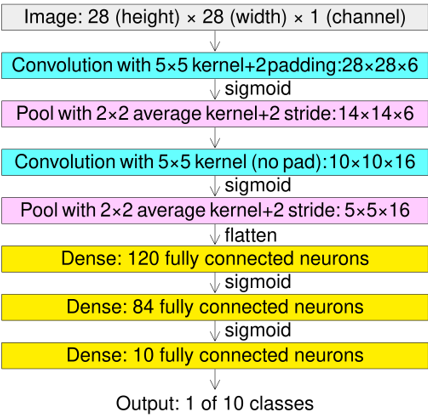<br>
*Рис. 3.1.* LeNet5

&emsp;Повторим структуру этой нейросети на pytorch. Как уже упоминалось, модель создается в виде класса, наследника базового класса ```nn.Module ```из библиотеки pytorch, именно он содержит базовые параметры нейросетей. Структура модели указывается в методе ```__init__```.<br>
&emsp;Первой строкой в нем должна быть ```super().__init__()``` Для верной инициализации всех параметров согласно высшему в иерархии классу (берутся значения по умолчанию из nn.Module).<br>
&emsp;Далее определяются сами слои - ```Conv2d```, ```MaxPool2d``` и ```Linear``` - соответственно сверточный (2d для двухмерного ядра свертки), пулинг-слой (max указывает на то, что при снижении размерности берется наибольшее значение из соседних, а, например, в ```AvgPool2d``` берется среднее), полносвязный слой без активации (```Linear```).<br>
&emsp;Обратите внимание, что число нейронов слоя - это параметр ```out_channels```. В курсовой вам нужно будет менять этот параметр. Для правильной работы нейросети необходимо, чтобы число входов слоя ```in_channels``` совпадало с числом нейронов ```out_channels``` предыдущего слоя.<br>
&emsp;Также важным здесь является строка ```x.view...```. Она преобразует данные из многомерного вида в одномерный вектор, поскольку полносвязные слои F5-F7 не могут воспринимать многомерные тензоры, только вектора. Поэтому данная строка кода "разворачивает" поданный на него многомерный тензор по строкам в один длинный вектор. Этой строке на рис. 3.1 соответствует процедура flatten.<br>

Некоторые слои или строки в `forward` пропущены, вы должны далее дописать их сами.
``` python
class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()
        # первый сверточный слой C1, 1 канал цвета ч/б, 6 нейронов (каналов на выходе),
        # размер ядра свертки 5х5, padding=2 позволяет сохранить размер изображения
        # после свертки 
        self.C1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2)
        # первый пулинг-слой S2, размер ядра = снижение размерности
        # stride - шаг, здесь 2, то есть ядро каждый раз сдвигается на 2 пиксела
        self.S2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # ПРОПУЩЕН второй сверточный слой C3
        # ПРОПУЩЕН второй пулинг-слой S4

        # первый полносвязный слой F5, число входов нейронов 16 * 5 * 5
        # соответствует размеру тензора после S4 - 16 каналов на выходе
        # (определяется слоем C3, S4 не меняет это число), и из-за
        # снижения размерности оставшиеся "грани" тензора 5х5 (см. рис. 3.1)
        self.F5 = nn.Linear(in_features=16 * 5 * 5, out_features=120)

        # ПРОПУЩЕН второй полносвязный слой F6
        # ПРОПУЩЕН третий полносвязный слой F7
```
&emsp;Но никаких преобразований при инициализации объекта класса LeNet5 не произойдет - метод ```__init__``` лишь задает слои. Для возможности обучения нейросети в ней задается метод ```forward``` (в отличии от Tensorflow, где задание слоев означает создание конвейера, который последовательно обрабатывает входные данные).
``` python
    def forward(self, x):
        # в pytorch обрабатываемые данные должны быть float, тогда как
        # в изображениях, как правило, используют целые числа для задания
        # яркостей. Чтобы избежать проблем, сперва преобразуем тензор
        # входных данных x в float стандартным методом pytorch
        x = x.float()
        # применяем свертку слоем C1 с функцией активации relu
        x = F.relu(self.C1(x))
        # применяем первый пулинг-слой S2, он не содержит функции активации,
        # поэтому вызвается как свойство объекта класа self
        x = self.S2(x)

        # ПРОПУЩЕНО применяем свертку слоем C3 с функцией активации relu
        # ПРОПУЩЕНО применяем второй пулинг-слой S4

        # метод view меняет размер тензора на указанный
        # -1, N означает, что первая размерность должна быть
        # рассчитана автоматически так, чтобы вторая составила N
        # в данном примере получится 1x400 (16*5*5=400), 
        # а если указать, например, -1,100, то получим 4x100,
        # то есть общее число элементов из входного тензора
        # должно сохраняться
        x = x.view(-1, 16 * 5 * 5)

        # ПРОПУЩЕНО применяем первый полносвязный слой F5 с функцией активации relu
        # ПРОПУЩЕНО применяем второй полносвязный слой F6 с функцией активации relu
        # ПРОПУЩЕНО применяем последний полносвязный слой F7 без функции активации
        return x
```
&emsp;Комбинируем полученный код в один класс.
``` python
class LeNet5(nn.Module):
    def __init__(self):
        # ваше содержимое
    def forward(self, x):
        # ваше содержимое
        return x
```

И для создания модели достаточно объявить экземпляр класса

``` python
    net = LeNet5()
```

**Самостоятельное задание:**
* реализуйте полный класс нейронной сети `LeNet5` в ячейке ниже по описанной инструкции;
* в последнем полносвязном слое задайте 100 нейронов, чтобы модель могла работать со 100 классами Cifar100;
* во втором полносвязном слое задайте $128+ k$ нейронов, где $k=2\cdot N$ для ваиантов $N < 10$ и $k=128 + 2\cdot N/10$ для ваиантов $N >= 10$;
* в первом полносвязном слое задайте $200+ k$ нейронов, где $k=2\cdot N$ для ваиантов $N < 10$ и $k=128 + 2\cdot N/10$ для ваиантов $N >= 10$;
* в самом первом слое смените число входов с 1 на 3 для возможности работы с цветными изображениями;
* вместо sigmoid используйте в первом и втором полносвязных слоях ReLU.

In [ ]:
class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.C1 = nn.Conv2d(in_channels=3, out_channels=128, kernel_size=5, padding=2)
        self.S2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.C3 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=5)
        self.S4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.F5 = nn.Linear(in_features=128 * 5 * 5, out_features=201)
        self.F6 = nn.Linear(in_features=201, out_features=129)
        self.F7 = nn.Linear(in_features=129, out_features=100)
    def forward(self, x):
        x = x.float()
        x = F.relu(self.C1(x))
        x = self.S2(x)
        x = F.relu(self.C3(x))
        x = self.S4(x)
        x = x.view(-1, 128 * 5 * 5)
        x = F.relu(self.F5(x))
        x = F.relu(self.F6(x))
        x = self.F7(x)
        return x

&emsp;Вновь зададим блок преобразования изображений датасета в тензоры с последующей нормализацией. Обратите внимание: здесь добавилось одно преобразование (строка 2) - Resize. Дело в том, что размер изображений CIFAR10 32x32, тогда как LeNet5 пригодна лишь для изображений 28x28. Подавая изображения произвольного размера получим ошибку при обучении, поэтому при загрузке датасета будем снижать размер изображений до 28x28.

Если необходима аугментация ее тоже логично применять в `transforms_input`, но тогда желательно оставить тестовую выборку без аугментации - придется создать еще одну сущность `transforms.Compose` без аугментации, только с базовыми преобразованиями.

In [ ]:
transform_input = transforms.Compose(
    [transforms.Resize((28,28)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

&emsp;Метод ```torchvision.datasets.CIFAR100``` дает возможность загрузить датасет CIFAR100 (в модуле datasets присутствуют и другие датасеты). Аргумент ```root``` указывает путь, по которому (относительно расположения текущего файла) будут загружены изображения датасета, ```train=True``` указывает, что в переменную ```trainset``` будут записана только обучающая выборка из всего датасета. ```download=True``` указывает на необходимость скачивания датасета (если уже был скачан - даже при ```download=True``` повторной загрузки не произойдет). Аргумент ```transform``` указывает на переменную, содержащую применяемые к датасету после загрузки преобразования. Аналогично грузится тестовый набор данных.

In [ ]:
trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform_input)
testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transform_input)

&emsp;Зададим загрузчики данных обучающей (```trainloader```) и тестовой (```testloader```) выборок. Для проверочной выборки ```shuffle = False```, поскольку при проверке точности перемешивание данных не имеет значения.

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=os.cpu_count())
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=os.cpu_count())

&emsp;Можно вывести изображения из загруженного датасета, для чего их необходимо денормализовать (вернуть исходные значения) и поменять местами стороны (транспонировать, получив из тензора изображение), что осуществляет заданная здесь функция ```imshow```.

In [ ]:
classes = trainset.classes
def imshow(img):
    img = img / 2 + 0.5                        
    npimg = img.numpy()                        
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(trainloader)
images, labels = next(dataiter)
for j in range(4): print(f'{j+1}: {classes[labels[j]]}')
imshow(torchvision.utils.make_grid(images))

Объявите экземпляр класса вашей нейронной сети. **В конце добавьте метод .to(device)**. Для работы на GPU нужно отравить на него и модель и данные (данные можно отправить в процессе обучения). Если у вас CPU - можете не добавлять, он просто ничего не изменит.

In [ ]:
net = LeNet5().to(device)

Здесь используем традиционные функцию потерь и оптимизатор, просто выполните ячейку.

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(params=net.parameters(), lr=3e-4, weight_decay=1e-3)

Метод для отправки на GPU здесь уже добавлен.

In [ ]:
epochs = 2
for epoch in range(epochs):  # обучение заданное число эпох

    running_loss = 0.0 # обнуляем значение функции потерь перед эпохой
    for i, data in enumerate(trainloader, 0):
        # извлекаем данные: inputs изображения, labels - номера классов
        inputs, labels = data[0].to(device), data[1].to(device) 
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 200 == 199:    # чтобы не засорять вывод, данные печатаем каждые 200 обработанных изображений
            print('Эпоха:%d, Обработано образцов: %5d, loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Обучение завершено')

Если за 5 минут не выдается ни одного сообщения - скорее всего не хватает памяти компьютера, проверьте, не забит ли диск C. Если нет - возможно не хватает ОЗУ, переходите на Colab (Файл - Загрузить блокно), там хватает даже 12 ГБ ОЗУ.

&emsp;Проверим правильность распознавания на тестовых изображениях.

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device) 
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Точность нейросети на тестовых изображениях: %d %%' % (100 * correct / total))

&emsp;Проверим работоспособность модели на изображении из интернета, дял чего сперва укажем на него указав на него ссылку.<br>
&emsp;Чтобы найти изображение воспользуйтесь разделом с изображениями в любой поисковой системой (введите в качестве запроса имя одного из классов). Нажмите на любое подходящее изображение левой кнопкой, открыв предпросмотр, затем правой кнопкой мыши и в открывшемся меню выберите пункт Открыть изображение в новой вкладке.<br>
&emsp;Ссылка на изображение будет в адресной строке, если в новой вкладке открывается само изображение. Некоторые изображения недоступны для просмотра отдельно от сайта, в этом случае вы увидите сам сайт – ссылку на такое изображение получить не удастся, ищите другое.


In [ ]:
file_path = 'https://iv-spectehnika.ru/wp-content/uploads/2018/01/f5e60d8109f7019c6c5801a46f224726.jpg'

&emsp;По указанной ссылке здесь происходит загрузка и сохранение изображения рядом с файлом кода. Обратите внимание, что поддерживаются только ```jpg```, ```jpeg```, ```webp``` изображения, ```avif``` не поддерживаются.<br>
&emsp;```urllib``` используется здесь для загрузки изображения с имитацией браузера - не все сайты позволяют скачивать изображение программам, поэтому ```urllib``` маскируется под браузер Mozilla Firefox.<br>
&emsp;Далее, в шестой строке происходит чтение байт по ссылке, которые в седьмой строке преобразуются в изображение ```PIL```. Последующие строки ставят в название файла верное расширение и сохраняют его как ```image.xxx```, где ```xxx``` может быть ```wbp, jpg, png```.<br>
&emsp;Последняя строка выводит содержимое изображения.

In [ ]:
if '://' in file_path:
    req = urllib.request.Request(file_path, headers={'User-Agent': 'Mozilla/5.0'})
    img_bytes = urllib.request.urlopen(req).read()
    img = Image.open(io.BytesIO(img_bytes))
    file_ext = '.jpg'
    if 'png' in file_path: file_ext = '.png'
    elif 'webp' in file_path: file_ext = '.webp'
    path = 'image' + file_ext
    img.save(path)
else: img = Image.open(rf'{file_path}')
img

&emsp;Для возможности переиспользвоания ниже задана функция, выводящая результат распознавания нейросетью изобрежения.
&emsp;Здесь вторая строка убирает у изображения 4 канал, если он есть (канал прозрачности для ```png```).<br> 
&emsp;В третьей строке к изображению применяются заданные ранее преобразование (изменение размера, преобразование в тензор и нормализация).<br>
&emsp;В четвертой строке в переменную ```output``` записывается результат предсказания нейросетью.<br>
&emsp;В пятой определяется номер наибольшего из предсказанных значений, равный номеру предсказанного класса.<br>
&emsp;И в шестой строке выводится название предсказанного класса.
&emsp;Соответственно в седьмой строке вызывается заданная функция.

In [ ]:
def img_recognition(img, net):
    img_without_alphachannel = Image.fromarray(np.array(img)[:,:,:3])
    img_to_tensor = transform_input(img_without_alphachannel).to(device)
    output = net(img_to_tensor)
    class_num = torch.argmax(output)
    print(f'Изображение распознано как: {trainset.classes[class_num]}')
img_recognition(img, net)

&emsp;Чтобы не потерять результаты обучения, их нужно сохранить. Для этого, в простом случае, используется код ниже.
```python
    torch.save(model, 'путь_к_файлу.pth')
```
&emsp;И для загрузки модели после сохранения нужно выполнить код ниже.
```python
    the_model = torch.load('путь_к_файлу.pth')
```
&emsp;Этот способ сохраняет как веса обученной модели и ее параметры, так и струкутру самой модели (заданный класс), а также сведения о версиях используемых библиотек pyorch, torchvision и т.д. Из-за этого при обновлении библиотек может возникнуть несовместимость при загрузке модели спустя время, поэтому рекоммендуется сохранять только веса и параметры модели с помощью кода ниже.
```python
    torch.save(model.state_dict(), 'путь_к_файлу.pth')
```
&emsp;И для загрузки модели после сохранения нужно выполнить код ниже. Сперва создать объект класса нужной модели, а затем загрузить в него веса.
```python
    model = ClassModelName()
    model.load_state_dict(torch.load('путь_к_файлу.pth', weights_only=True))
```
&emsp;Сохраним модель по второму способу.

In [ ]:
torch.save(net.state_dict(), 'lenet5_weights.pth')

&emsp;И для проверки загрузим полученные веса, не забыв сперва создать модель.

In [ ]:
new_net = LeNet5().to(device)
new_net.load_state_dict(torch.load('lenet5_weights.pth', weights_only=True))

&emsp;Проверим распознавание новой нейросетью уже имеющегося в памяти изображения, вызвав функцию img_recognition для модели с загруженными весами ```new_net```.

In [ ]:
img_recognition(img, new_net)

&emsp;Поскольку иногда для собственных целей сохранить модель целиком является удобным инструментом, опробуем и этот подход. Сперва сохраним модель.

In [ ]:
torch.save(net, 'lenet5_full.pth')

&emsp;Затем загрузим ее.

In [ ]:
net_full_loaded = torch.load('lenet5_full.pth', weights_only=False).to(device)

&emsp;Проверим структуру методом ```eval```.

In [ ]:
net_full_loaded.eval()

&emsp;И распознаем изображение.

In [ ]:
img_recognition(img, net_full_loaded)

**Самостоятельное задание:**
* 1) проверьте, не перестает ли модель учиться, хотя потри не снизились и в 2 раза (не боле 6 эпох), если продолжают снижаться - продолжайте обучение;
* 2) если снижаться перестали на п. 1 - увеличьте число нейронов в сверточных слоях до $128+ k$ нейронов, где $k=2\cdot N$ для ваиантов $N < 10$ и $k=128 + 2\cdot N/10$ для ваиантов $N >= 10$;
* 3) не забудьте сменить после этого 16 в первом полносвязном слое и x.view в модели;
* 4) завершите обучение после 14 эпох в любом случае, проверьте новую точность.

#### Модель VGG16

**Самостоятельное задание:**
* воспроизведите ниже модель VGG16 по схеме на рис. 3.2;
* задайте число нейронов в полносвязных слоях (кроме последнего) равным $N*10+512$;
* обучать модель не нужно, просто продемонстрируйте ее при сдаче работы преподавателю.

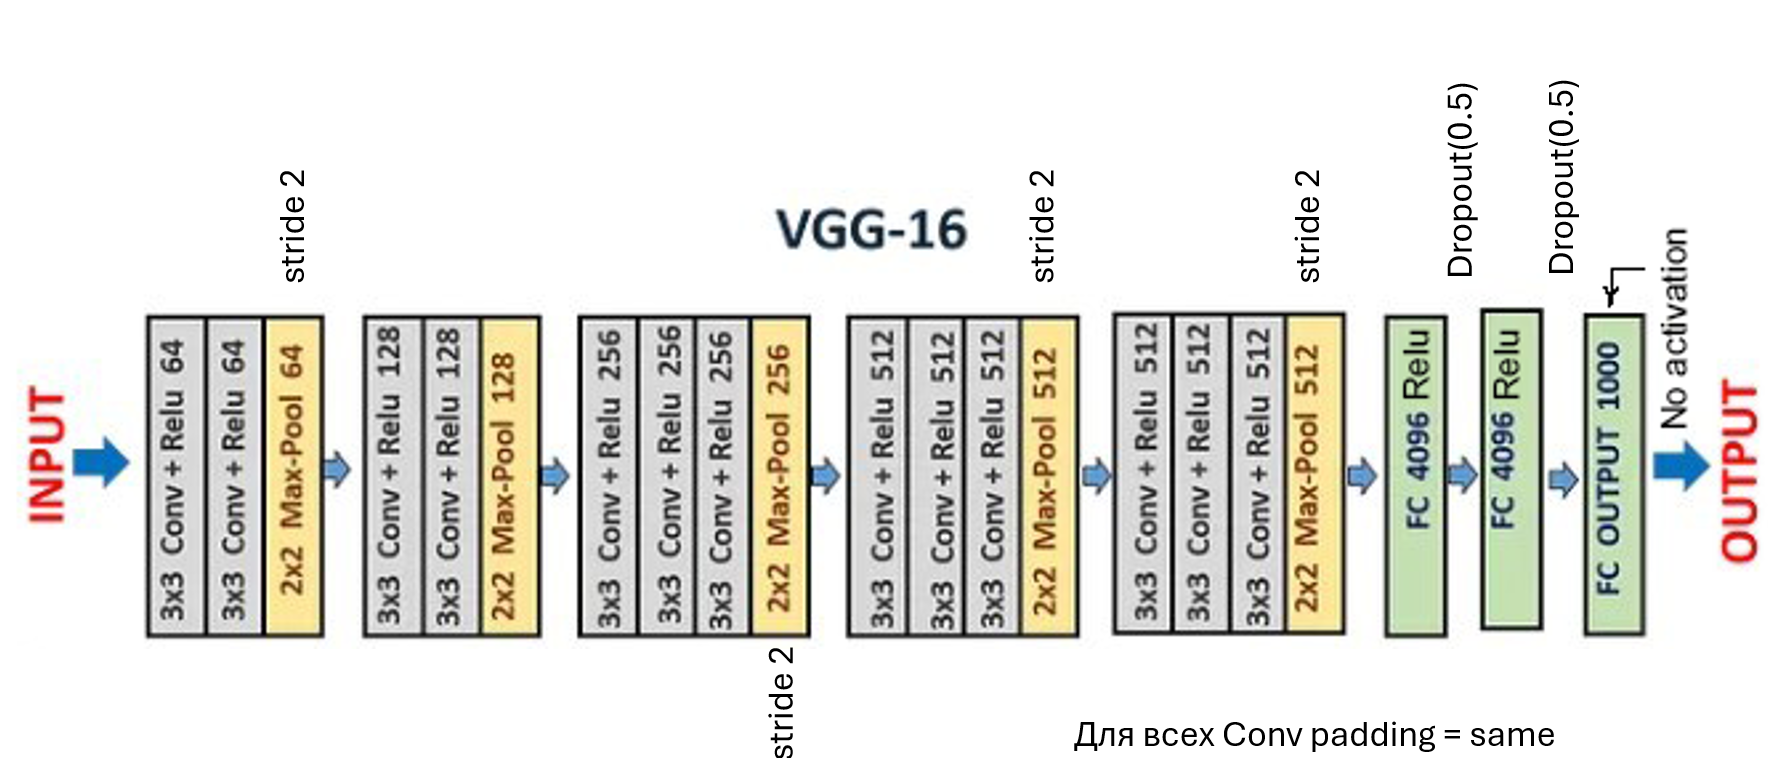
*Рис. 3.2. VGG16*

In [ ]:
#здесь воспроизведите VGG16

## Сдача работы

**При сдаче работы, для получения оценки, выполните при преподавателе задания или ответьте на вопросы:**
*внимание: если не сказано иного, то то или иное действие выполняется встроенными в `torch` методами, к примеру "вывести максимум тензора" означает использование встроенного метода `torch`, а не ручной поиск числа в тензоре и его print;*
* *часть 1 - свертка:*
    * что будет с изображением после фильтров, если изменить операцию, которой вы комбинируете фильтры на противоположную?
    * к чему приводило увеличение размера фильтра?
    * напишите код, в котором бы за счет произведения фильтров выводились бы только общие для обоих участки;
* *часть 2 - сверточные нейронные сети:*
    * почему в LeNet была заменена sigmoid на ReLU?
    * какой метод регуляризации использован в VGG, но не задействован в LeNet?
    * напишите код проверки, есть ли GPU, там же напишите код отправки на GPU модели вашей нейросети;
    * зачем нужен DataLoader?

# Лабораторная работа 4. Векторные представления текста (эмбеддинги)

**Внимание:** в самостоятельных заданиях иногда требуется ***записать, выписать*** какие-то значения. Выписывайте их себе ***обязательно***, они потребуются для сравнения результатов при сдаче лабораторной. Желательно не путаться, оформлять заметку или электронную таблицу как вам удобно, но так, чтобы ***вы сами могли вспомнить, какие числа и где записанные что означают***. Оправдания вида "я уже забыл, что это" ***не принимаются***, плохие ответы на вопросы преподавателя негативно влияют на оценку.<br><br>
Также в этом курсе для сдачи лабораторной ***недостаточно ответить на вопросы***, нужно после всей работы преподавателю ***лично показать, как вы выполняете те или иные простые дейтствия, навыки работы с которыми вы приобрели в ходе лабораторной***.

## Установка и импорт библиотек

Установим необходимые библиотеки

В дальнейшем понадобится использовать GPU для вычислений (поддерживается только Nvidia). Поэтому для установки `torch`, `torchvision` и `torchaudio` нужно использовать специализированную версию CUDA. Чтобы ее получить перейдите по ссылке: https://pytorch.org/get-started/locally/ и выберите вашу версию системы и `Compute Platform` с CUDA (обычно по умолчанию все уже выбрано), создайте новую ячейку и запустите тот код, что предложил Pytorch на странице выше (добавьте в установку `torchaudio` в этот код). Второй стркой приведен пример установки актуальных на 2025 г версии библиотек Pytorch для Windows 

In [ ]:
!pip install numpy matplotlib pandas scikit-learn nltk gensim bokeh umap-learn numba llvmlite deep-translator
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

&emsp;Импортируем все необходимые модули. **Если при импорте возникает ошибка при импорте umap - перезапустите VS Code или перезапустите сеанс Colab.**

In [ ]:
import gensim.downloader as api
import numpy as np
import umap
from nltk.tokenize import WordPunctTokenizer
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from collections import Counter
import pandas as pd
import torch
from torch import nn

# Для скачивания архива датсета
import shutil
import urllib
import os
import zipfile
import platform

# Для перевода датасета Quora
from deep_translator import GoogleTranslator

# Модули для визуализации
import bokeh.models as bm
import bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()
from IPython import display
filt_st = 'я эя'
from matplotlib import pyplot as plt

## Часть 1. Классификация текста моделью нейронной сети

Начнем с попытки применить уже имеющиеся из прошлых лекций навыки, но для работы с текстами. Загрузим сперва датасет STT2, в ем собрано множество отзывов на английском языке и имеется 2 класса: 0 - отзыв негативный, 1 - отзыв положительный.

In [ ]:
link = 'https://github.com/heymynameis/mdl_ims/raw/refs/heads/main/labs/lab4/STT2.tsv'
df = pd.read_csv(link, delimiter='\t', header=None)
df.head()

Извлекаем первые 5000 текстов и соответствующих им номеров лейблов (номеров классов) в качестве обучающих данных.

In [ ]:
X_train = df[0].values[:5000]
y_train = df[1].values[:5000]

Оставшиеся тексты (около 2000) берем в качестве тестовых данных.

In [ ]:
X_test = df[0].values[5000:]
y_test = df[1].values[5000:]

Токен - принятный в данной системе примитив текста. Существует множество разных алгоритмов токенизации, воспользуемся одним из самых простых - разбиение текста по пробелам и знакам пунктуации.

In [ ]:
tokenizer = WordPunctTokenizer()

Для токенизации нужно вызвать метод `tokenize` из созданного объекта. 

In [ ]:
tokenizer.tokenize('Разбей мой текст полностью, сделай это')

С помощью Counter попробуем посчитать частоту повторения токенов.

In [ ]:
counter = Counter()

for text in X_train:
    counter.update(tokenizer.tokenize(text.lower()))

tokens = set([token for token, count in counter.items() if count > 5])

token_to_idx = {token: idx for idx, token in enumerate(tokens)}

vocab_size = len(tokens)

print(f'Размер словаря: {vocab_size}')

Закодируем полученный набор токенов в One-Hot формате, при котром, к примеру, слову с индексом 2 в словаре из 4 токенов будет соответствовать вектор из [0,1,0,0] и т.д. Зададим сперва кодировщик `text_to_bow`, который будет формировать "мешок слов" (см. лекционный материал).

In [ ]:
def text_to_bow(text):
    bow = np.zeros(vocab_size)

    for token in tokenizer.tokenize(text):
        if token in tokens:
            bow[token_to_idx[token]] += 1
    return bow

И применяем кодировщик с помощью `map` к обучающим и тестовым данным.

In [ ]:
X_train_bow = np.stack(list(map(text_to_bow, X_train)))
X_test_bow = np.stack(list(map(text_to_bow, X_test)))

Попробуем обучить простейшую логистическую регрессию для решения поставленной задачи. Поскольку она довольно проста, ее можно использовать для оценки качества вводимой далее нейронной сети - окажется ли она лучше, хуже или будет аналогична линейной регрессии.

In [ ]:
bow_model = LogisticRegression().fit(X_train_bow, y_train)

Построим ROC-кривую для проверки наличия переобучения (см. курс по системам искусственного интеллекта). В лучшем случае обе кривых (тестовая, обучающая) должны с началом графика достичь максимума и оставаться на нем, в худшем одна или обе кривых стремятся к диагональной линии. Помимо самой формы кривой также используют AUC - площадь под ROC кривой в качестве метрики точности (0.5...1, больше = лучше). Чем меньше разница между кривыми, тем меньше выражено переобучение.

In [ ]:
for name, X, y, model in [
    ('train', X_train_bow, y_train, bow_model),
    ('test ', X_test_bow, y_test, bow_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

print('train accuracy', accuracy_score(model.predict(X_train_bow), y_train))
print('test accuracy', accuracy_score(model.predict(X_test_bow), y_test))

Фиксируем число признаков (токенов) и создаем простую нейронная сеть на Pytorch (да, как видите, в Pytorch существует способ создания моделей аналогично Tensorflow, но он менее гибок и поэтому редко используется).

Нейронная сеть содержит Dropout (его нужно задействовать только при обучении) и один входной линейный слой с 2 нейронами и числом входов, равным числу токенов. Фактически также здесь применяется Softmax.

In [ ]:
NUM_FEATURES = len(tokens)
model = nn.Sequential()
model.add_module('dropout', nn.Dropout(p=0.8))
model.add_module('l1', nn.Linear(NUM_FEATURES, 2))

loss_function = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=1e-2)

Преобразуем данные в пригодный для Pytorch вид тензоров.

In [ ]:
X_train_bow_torch = torch.FloatTensor(X_train_bow)
X_test_bow_torch = torch.FloatTensor(X_test_bow)

y_train_torch = torch.LongTensor(y_train)
y_test_torch = torch.LongTensor(y_test)

И запустим обучение модели с выводом графика потерь.

In [ ]:
n_iterations = 2000
batch_size = 256
train_loss_history = []
train_acc_history = []
plot_history = []
test_plot_history = []

for _i in range(n_iterations):
    model.train()
    opt.zero_grad()

    ix = np.random.randint(0, len(X_train_bow_torch), batch_size)
    x_batch = X_train_bow_torch[ix]
    y_batch = y_train_torch[ix]

    y_predicted = model(x_batch)
    loss = loss_function(y_predicted, y_batch)
    loss.backward()
    opt.step()

    train_loss_history.append(loss.data.numpy())
    train_acc_history.append(
        accuracy_score(
            y_batch.detach().numpy(),
            y_predicted.detach().numpy().argmax(axis=1)
        )
    )

    if (_i+25) % 50==0:
        model.eval()
        plot_history.append(np.mean(train_loss_history[-10:]))
        test_plot_history.append(loss_function(model(X_test_bow_torch), y_test_torch).item())


        display.clear_output(True)
        plt.figure(figsize=(15, 10))
        plt.plot(plot_history, label='train loss')
        plt.plot(test_plot_history, label='test loss')
        plt.yscale('log')
        plt.grid()
        plt.xlabel('Iteration')
        plt.ylabel('Loss value (in log scale)')
        plt.legend()
        plt.show()

И строим графики ROC для нейросети.

In [ ]:
for name, X, y, model in [
    ('train', X_train_bow_torch, y_train, model),
    ('test ', X_test_bow_torch, y_test, model)
]:
    model.eval()
    proba = model(X).detach().cpu().numpy()[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

train_predictions = torch.max(model(X_train_bow_torch).detach().cpu(), dim=1)[1].numpy()
test_predictions = torch.max(model(X_test_bow_torch).detach().cpu(), dim=1)[1].numpy()

print('train accuracy', accuracy_score(train_predictions, y_train))
print('test accuracy', accuracy_score(test_predictions, y_test))
plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

**Самостоятельное задание:**
* зафиксируйте значения точности на обучающей и проверочной выборках линейной регрессии и нейронной сети;
* усложните нейронную сеть:
    * добавьте после первого слоя активацию `model.add_module('r1', nn.ReLU(inplace=True))`
    * добавьте после активации второй слой с именем `'l2'` и числом нейронов `NUM_FEATURES`
    * добавьте после второго слоя активацию, как после первого, но с именем `'r2'`
    * и в заключении добавьте третий слой, как первый, но с именем `'l3'`
* повторите обучение нейронной сети и оценку ее переобучения/точности;
* зафиксируйте новые значения точности нейронной сети;
* смените кодировщик с BOW на более совершенный TF-IDF, для чего, сперва, в ячейке с функцией `text_to_bow` вставьте код (в конце ячейки), реализующий TF-IDF:
    ``` python
    # --- Подсчет частоты документов (для IDF) ---
    # df (document frequency) - сколько документов содержат каждый токен
    df_tfidf = np.zeros(vocab_size)
    for text in X_train:
        # Создаем уникальный набор токенов для каждого документа
        unique_tokens_in_doc = set(tokenizer.tokenize(text.lower()))
        for token in unique_tokens_in_doc:
            if token in token_to_idx:
                df_tfidf[token_to_idx[token]] += 1
    # --- Расчет IDF ---
    # N - общее количество документов
    N = len(X_train)
    # Используем log(N / df)
    # Добавляем +1 в знаменателе, чтобы избежать деления на ноль для редких слов
    idf_weights = np.log((N + 1) / (df_tfidf + 1))
    # --- TF-IDF ---
    # Новая функция, которая использует TF и IDF
    # Исходная text_to_bow в ней теперь будет считать TF (то же, что BOW)
    def text_to_tfidf(text):
        tf_vector = text_to_bow(text)
        tfidf_vector = tf_vector * idf_weights
        return tfidf_vector
    ```
* повторите обучение модели, зафиксируйте, стали ли результаты лучше, хуже или не изменились (и в чем они лучше/хуже, если это прослеживается).

## Часть 2. Работа с эмбеддингами

&emsp;На лекции мы рассмотрели, что для эффективной работы с текстом необходимо представлять слова в виде числовых векторов, которые отражают их семантическое значение. Такие представления называются **эмбеддингами**. Обучение моделей для получения качественных эмбеддингов (таких как Word2Vec или GloVe) — ресурсоемкий процесс, требующий огромных текстовых корпусов. Поэтому на практике чаще всего используют **предобученные модели**, которые уже содержат готовые векторы для большого количества слов.

&emsp;В этой части работы мы будем использовать библиотеку `gensim`, которая предоставляет удобный интерфейс для загрузки и работы с такими моделями.

### Загрузка предобученной модели

&emsp;Загрузим предобученную модель эмбеддингов `glove-twitter-25`. Эта модель была обучена на большом корпусе твитов из заблокированной и переименованной ныне сети и содержит векторы размерности 25 для ~1.2 миллиона слов. Загрузка может занять несколько минут.

In [ ]:
model = api.load('glove-twitter-25')

### Анализ векторных представлений

&emsp;Теперь, когда модель загружена, мы можем получить вектор для любого слова из ее словаря. Вектор представляет собой массив `numpy` из 25 вещественных чисел.

Получим вектор для слова 'cat'

In [ ]:
cat_vector = model.get_vector('cat')
print(f"Вектор для слова 'cat':\n{cat_vector}")
print(f"Размерность вектора: {cat_vector.shape}")

&emsp;Основное преимущество эмбеддингов — возможность измерять семантическую близость между словами. В `gensim` для этого используется метод `most_similar`, который находит слова, чьи векторы наиболее близки к заданному по косинусному сходству.

Найдем 5 самых похожих слов на слово 'summer'

In [ ]:
model.most_similar('summer', topn=5)

**Самостоятельное задание:**
* выберите 3 слова русского языка, которые будете сравнивать. Выбирать согласно вариантам:
    * для нечетных вариантов слова каждой из тематик: автомобили, программирование, домашние животные;
    * для четных вариантов слова каждой из тематик: электроника, безопасность данных, дикие животные;
* для первой тематики выведите 3 самых близких слова используемого датасета, для второй 7, для последней 10;
* результаты сравнения должны выводиться для всех 3 слов сразу, тем самым ячейка должна содержать 3 строки кода;
* если ячейка выдает ошибку - слово не найдено в датасете, замените его.

### Векторная арифметика

&emsp;Как обсуждалось в лекции, эмбеддинги улавливают семантические отношения, что позволяет выполнять над ними векторные операции. Классический пример: `король - мужчина + женщина ≈ королева`. В `gensim` это реализуется через аргументы `positive` (слова, которые складываются) и `negative` (слова, которые вычитаются) в методе `most_similar`.
Проверим аналогию: king - man + woman = ?

In [ ]:
model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)

**Самостоятельное задание:**
* согласно варианту проверьте 10 слов тем же образом, что в прошлой ячейке. Для вариантов 1,4,7,10,13,16,19,22,25,28,31,34,37,40:
    * `папа` - `мужчина` + `женщина`
    * `брат` - `мужчина` + `женщина`
    * `актер` - `мужчина` + `женщина`
    * `писатель` - `мужчина` + `женщина`
    * `учитель` - `мужчина` + `женщина`
    * `быстро` - `быстрый` + `медленный`
    * `идти` - `иду` + `шёл`
    * `читать` - `читал` + `спать`
    * `солнце` - `жарко` + `холодно`
    * `ночь` - `темный` + `светлый`

* для вариантов 2,5,8,11,14,17,20,23,26,29,32,35,38:
    * `дядя` - `мужчина` + `женщина`
    * `тетя` - `женщина` + `мужчина`
    * `мама` - `женщина` + `мужчина`
    * `герцог` - `мужчина` + `женщина`
    * `актер` - `актер` + `актриса`
    * `бег` - `бежать` + `прыгать`
    * `большой` - `больше` + `маленький`
    * `высокий` - `выше` + `низкий`
    * `слон` - `бивни` + `конь`
    * `панда` - `лес` + `мультфильм`

* для вариантов 3,6,9,12,15,18,21,24,27,30,33,36,39:
    * `сестра` - `женщина` + `мужчина`
    * `бабушка` - `женщина` + `мужчина`
    * `продавец` - `мужчина` + `женщина`
    * `директор` - `мужчина` + `женщина`
    * `принц` - `мужчина` + `женщина`
    * `хороший` - `лучше` + `плохой`
    * `легкий` - `легче` + `тяжелый`
    * `паук` - `паутина` + `пчела`
    * `самолет` - `пилот` + `корабль`
    * `вода` - `пить` + `хлеб`
* если слова нет в датасете и выводится ошибка - заменяйте синонимами;
* должны выводиться все результаты сравнений, не по одному;
* посчитайте процент соответствующих логике, на ваш взгляд, ответов, зафиксируйте это число. 

### Визуализация эмбеддингов

&emsp;Чтобы лучше понять структуру семантического пространства, которое выучила модель, можно визуализировать эмбеддинги. Поскольку векторы имеют размерность 25, мы не можем отобразить их напрямую. Для этого используются алгоритмы снижения размерности, такие как **UMAP**, который преобразует 25-мерные векторы в 2-мерные точки, стараясь сохранить локальную структуру (то есть близкие в исходном пространстве векторы останутся близкими на плоскости).

Отсортируем слова по частоте, чтобы взять наиболее употребимые

In [ ]:
model.sort_by_descending_frequency()

&emsp;Возьмем 1000 самых частотных слов из словаря модели и получим для них 2D-представления с помощью UMAP.

In [ ]:
words = list(model.key_to_index.keys())[:1000]
word_vectors = np.asarray([model[w] for w in words])

# Применим UMAP для снижения размерности до 2
reducer = umap.UMAP(n_neighbors=15, metric='cosine', random_state=42)
embedding_2d = reducer.fit_transform(word_vectors)

&emsp;Теперь отобразим полученные 2D-точки на интерактивном графике с помощью библиотеки `bokeh`. Вы можете приближать/отдалять график и наводить курсор на точки, чтобы увидеть, какому слову они соответствуют.

In [ ]:
def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=800, height=600, show=True, **kwargs):
    """ Функция для отрисовки интерактивного графика """
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

draw_vectors(embedding_2d[:, 0], embedding_2d[:, 1], token=words)

**Самостоятельное задание 3:**
* Внимательно изучите полученный график.
* Найдите и опишите как минимум 3 семантических кластера (группы близких по смыслу слов). Например, "дни недели", "страны", "цвета", "эмоции" и т.д.
* Запишите для каждого кластера несколько слов, которые в него входят.
* узнайте, сколько всего слов покрывает датасет, для этого можно измерить длину `model.key_to_index` (тип данного инстанса - `list`);
* смените число слов, учитываемых при построении графика. Сейчас используются слова с первого по 1000, смените на диапазон с $100\cdot N$ до $L/100$, где $L$ - число слов в датасете (округлите верхний предел диапазона до целого числа);
* теперь, за счет смены диапазона, мы во-первых, не увидим часть самых популярных слов, которые относятся скорее к используемым разными языковыми группами (символы эмодзи, выражения вроде `lmao` и т.п.), а во-вторых увидим больше слов из-за расширения диапазона. Все это позволит вам провести сравнительный анализ представленности в датасете языков. <br> Определите, какая языковая группа в каждой из заданных сильнее представлена или же они примерно равны, на ваш взгляд, в датасете (ориентируйтесь по графику выше):
    * для вариантов 1,4,7,10,13,16,19,22,25,28,31,34,37,40:
    <br>- корейский | немецкий
    <br>- греческий | испанский
    <br>- русский | арабский
    <br>- японский | турецкий
    <br>- итальянский | французский
    <br>- нидерландский | греческий
    <br>- немецкий | русский
    <br>- испанский | арабский
    <br>- японский | итальянский
    <br>- турецкий | корейский
    * для вариантов 2,5,8,11,14,17,20,23,26,29,32,35,38:
    <br>- французский | испанский
    <br>- нидерландский | русский
    <br>- корейский | греческий
    <br>- немецкий | арабский
    <br>- греческий | русский
    <br>- арабский | японский
    <br>- испанский | итальянский
    <br>- русский | японский
    <br>- турецкий | нидерландский
    <br>- итальянский | немецкий
    * для вариантов 3,6,9,12,15,18,21,24,27,30,33,36,39:
    <br>- корейский | испанский
    <br>- немецкий | японский
    <br>- греческий | турецкий
    <br>- испанский | русский
    <br>- русский | итальянский
    <br>- арабский | нидерландский
    <br>- японский | французский
    <br>- турецкий | итальянский
    <br>- итальянский | корейский
    <br>- французский | немецкий
* зафиксируйте результаты сравнения в формате `языковая_гр_1 ? языковая_гр_2`, где вместо ? может быть >, < или =.

### Векторизация фраз методом усреднения

&emsp;Мы научились получать векторы для отдельных слов. Чтобы получить вектор для целой фразы или предложения, можно использовать простой, но часто эффективный подход — усреднение эмбеддингов всех слов, входящих в эту фразу. Этот метод позволяет получить вектор фиксированной длины для текста любой длины, но при этом теряет информацию о порядке слов.

In [ ]:
def get_phrase_embedding(phrase, tokenizer, model):
    vector = np.zeros([model.vector_size], dtype='float32')
    phrase_tokenized = tokenizer.tokenize(phrase.lower())
    
    # Отфильтровываем слова, которых нет в словаре модели
    phrase_vectors = [model[x] for x in phrase_tokenized if model.has_index_for(x)]

    if len(phrase_vectors) > 0:
        vector = np.mean(phrase_vectors, axis=0)
    
    return vector

tokenizer = WordPunctTokenizer()
vec = get_phrase_embedding("Я календарь переверну", tokenizer, model)
print(vec.shape)
print(vec)

### Кластеризация текстов

&emsp;Теперь, когда мы можем представить любой текст в виде вектора, мы можем применить к набору текстов методы машинного обучения, работающие с векторами. Одной из таких задач является кластеризация — автоматическое разделение набора данных на группы (кластеры) по схожести. Мы используем алгоритм K-Means для группировки вопросов из датасета Quora по темам.

Сперва грузим датасет по ссылке.

In [ ]:
link = 'https://github.com/heymynameis/mdl_ims/raw/refs/heads/main/labs/lab4/quora.zip'

path_file = ''
file_name = 'quora.zip'
urllib.request.urlretrieve(link, file_name)
folder_for_data = 'data'
win_path = 'C:/Users/Public/'+folder_for_data
archive = zipfile.ZipFile(file_name)
if 'windows' in platform.system().lower(): data_path = win_path
else: data_path = folder_for_data
if os.path.isdir(data_path): shutil.rmtree(data_path)
archive.extractall(path=data_path)
path_file = data_path + '/' + file_name[:-3] + 'txt'

Загружаем датасет с вопросами. Возьмем подмножество для ускорения вычислений.

In [ ]:
data = list(open(path_file, encoding="utf-8"))
chosen_phrases = data[::len(data) // 100] # ~100 фраз

Создаем переводчик и переводим на русский. Процедура может занять некоторое время (обычно около 1 минуты).

In [ ]:
translator = GoogleTranslator(source='en', target='ru')
translated_phrases = translator.translate_batch(chosen_phrases)

Фильтруем полученные фразы от мусора, после векторизуем каждую фразу и применяем K-Means для поиска 8 кластеров.

In [ ]:
translated_phrases = [s for s in translated_phrases if filt_st not in s]
# Векторизация
phrase_vectors = np.asarray([get_phrase_embedding(phrase, tokenizer, model) for phrase in translated_phrases])

n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(phrase_vectors)

print("Распределение фраз по кластерам:")
print(Counter(labels))

### Визуализация кластеров

&emsp;Аналогично визуализации слов, мы можем снизить размерность векторов фраз и отобразить их на 2D-графике, раскрасив точки в соответствии с присвоенными им кластерами.

In [ ]:
# Снижаем размерность векторов фраз до 2D
reducer_phrases = umap.UMAP(n_neighbors=5, random_state=42)
phrase_vectors_2d = reducer_phrases.fit_transform(phrase_vectors)

# Создаем палитру цветов для кластеров
from bokeh.palettes import d3
color_palette = d3['Category10'][n_clusters]
colors = [color_palette[i] for i in labels]

# Рисуем интерактивный график
draw_vectors(phrase_vectors_2d[:, 0], phrase_vectors_2d[:, 1], color=colors,
             phrase=[phrase[:70] for phrase in translated_phrases], # Отображаем первые 70 символов фразы
             radius=15)

**Самостоятельное задание:**
* Изучите полученный график кластеризации.
* Выберите 3 любых кластера (разного цвета). Для каждого кластера наведите курсор на несколько точек и выпишите 3-4 фразы, которые в него входят.
* Опишите, какая общая тема объединяет фразы в каждом из выбранных кластеров (например, "вопросы о технологиях", "философские вопросы", "вопросы о личных отношениях").
* Измените количество кластеров (`n_clusters`) на 5, а затем на 15. Перезапустите ячейки с K-Means и визуализацией. Кратко опишите, как изменилась структура кластеров в обоих случаях.
* определите по методу локтя оптимальное число кластеров. Согласно этому методу, оптимальное число кластеров находится в точке "локтя", где снижение суммы квадратов расстояний (WCSS) впервые начинает замедляться, то есть снижается скорость уменьшения графика WCSS. Запустите ячейку ниже и определите данное число;
* смените 8 на новое число кластеров и повторите запуск последующих ячеек для вывода графика;
* оцените, к каким категориям можно отнести определенные алгоритмам кластеры, как их можно назвать и зафиксируйте эти названия. 

In [ ]:
k_max = 21
wcss = []
for k in range(1, k_max):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(phrase_vectors)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, k_max), wcss, marker='o', linestyle='--')
plt.title('Метод локтя для определения числа кластеров')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Сумма квадратов расстояний (WCSS)')
plt.xticks(range(1, k_max))
plt.grid(True)
plt.show()


## Сдача работы

**При сдаче работы, для получения оценки, выполните при преподавателе задания или ответьте на вопросы:**
* *часть 1 - классификация текста моделью нейронной сети:*
    * логистическая регрессия или нейронная сеть сильнее переобучилась?
    * добавьте еще два слоя l4 и l5 в модель, после них поставьте активацию ReLU с именем r3. У l4 задайте 128 нейронов в слое, у l5 - 2;
    * какая модель - логистическая регрессия, нейронная сеть или усложненная нейронная сеть обеспечила меньшее переобучение и/или большую точность?
    * почему в описании ячейки нейронной сети сказано, что фактически там применяется активация Softmax, ведь она не задается явно?
* *часть 2 - работа с эмбеддингами слов:*
    * найдите 5 наиболее близких по смыслу слов к слову на выбор преподавателя;
    * покажите на интерактивном графике слов кластер, связанный с технологиями;
    * объясните, зачем для визуализации данных использовать алгоритмы снижения размерности, почему нельзя без них;
    * опишите полученные смысловые названия кластеров и принципы, по которым вы их получили;
    * что произойдет, если в алгоритме K-Means задать `k=1`? А если `k` будет равно количеству документов?

# Лабораторная работа 5. Рекуррентные нейронные сети

**Внимание:** в самостоятельных заданиях иногда требуется ***записать, выписать*** какие-то значения. Выписывайте их себе ***обязательно***, они потребуются для сравнения результатов при сдаче лабораторной. Желательно не путаться, оформлять заметку или электронную таблицу как вам удобно, но так, чтобы ***вы сами могли вспомнить, какие числа и где записанные что означают***. Оправдания вида "я уже забыл, что это" ***не принимаются***, плохие ответы на вопросы преподавателя негативно влияют на оценку.<br><br>
Также в этом курсе для сдачи лабораторной ***недостаточно ответить на вопросы***, нужно после всей работы преподавателю ***лично показать, как вы выполняете те или иные простые действия, навыки работы с которыми вы приобрели в ходе лабораторной***.

## Установка и импорт библиотек

В дальнейшем понадобится использовать GPU для вычислений (поддерживается только Nvidia). Поэтому для установки `torch`, `torchvision` и `torchaudio` нужно использовать специализированную версию CUDA. Чтобы ее получить перейдите по ссылке: https://pytorch.org/get-started/locally/ и выберите вашу версию системы и `Compute Platform` с CUDA (обычно по умолчанию все уже выбрано), создайте новую ячейку и запустите тот код, что предложил Pytorch на странице выше (добавьте в установку `torchaudio` в этот код). Второй стркой приведен пример установки актуальных на 2025 г версии библиотек Pytorch для Windows.

In [ ]:
!pip install numpy matplotlib requests
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

И импортируем все необходимые библиотеки.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import requests

## Часть 1. Работа с именами

&emsp;В этой лабораторной работе мы будем создавать рекуррентную нейронную сеть, которая сможет генерировать текст посимвольно. Для этого нам понадобится текстовый корпус. Мы будем использовать простой файл с именами, который необходимо загрузить и подготовить.

### Загрузка данных

Загрузим и предобработаем данные. В качестве набора данных будем использовать текстовый файл со списком имен. Каждая последовательность в нем – отдельное имя.

In [ ]:
link = 'https://github.com/heymynameis/mdl_ims/raw/refs/heads/main/labs/lab5/names.txt'

response = requests.get(link)
file_content = response.text

### Проверка токенизации

Используя в качестве `<BOS>`, `<EOS>` и `<PAD>` пробел (на практике так не рекоммендуется делать), опробуем токенизацию слов - замену их символов числами (индексами в словаре).

In [ ]:
start_token = " "

names = [start_token + line for line in file_content.split('\n')]

print ('Количество примеров в датасете = ', len(names))
for x in names[::500]:
    print (x)

&emsp;Для того чтобы нейронная сеть могла работать с текстом, его необходимо преобразовать в числовой формат. Поскольку наша модель будет работать на уровне символов, в качестве токенов (минимальных единиц информации) мы будем рассматривать отдельные символы. Для этого построим "словарь" из всех уникальных токенов в нашем наборе данных и пронумеруем их. Это позволит нам кодировать каждое имя как последовательность индексов его символов.

In [ ]:
tokens = sorted(list(set(''.join(names))))
num_tokens = len(tokens)
print ('Количество уникальных токенов = ', num_tokens)

# Словарь для преобразования символа в его индекс
token_to_id = {token: idx for idx, token in enumerate(tokens)}

# Пример преобразования
print('Символы:', ''.join(tokens))
print('Индексы:', list(token_to_id.values()))

&emsp;Поскольку нейронные сети обычно обучаются на батчах (пакетах) данных фиксированного размера, нам нужно привести все последовательности к одной длине. Для этого мы реализуем функцию, которая преобразует список имен в матрицу. Последовательности короче максимальной длины будут дополнены специальным символом-заполнителем (padding token). В нашем случае для этого используется пробел, с которого начинаются все имена.

In [ ]:
def mk_matrix(lines, max_len, pad=token_to_id[' '], dtype='int32', batch_first=True):
    lines_ix = np.zeros([len(lines), max_len], dtype) + pad

    for i in range(len(lines)):
        line_ix = [token_to_id[c] for c in lines[i]]
        lines_ix[i, :len(line_ix)] = line_ix

    if not batch_first:
        lines_ix = np.transpose(lines_ix)

    return lines_ix

**Самостоятельное задание:**
* выведите максимальную длину имени в датасете, используя `map`, `len` и `max`. В данном случае не критично использовать `map`, но в случае с огромными датасетами позволяет сильно сэкономить память - просто найдите максимум от `map` функцией `len` для массива датасета;
* проверте работоспособность функции to_matrix - первым аргументом у нее должен быть датасет, а вторым - максимальная длина в датасете;
* создайте новый словарь `token_to_id_v2`, в котором в качестве заполнителя (pad) будет использоваться не пробел ' ', а символ '_'. Убедитесь, что этот символ добавлен в список токенов;
* вызовите функцию `mk_matrix` так, чтобы она принимала использовала '_' в качестве заполнителя (см. 3 аргумент в объявлении функции). Выведите результат для первых 5 имен.

### Создание словаря и токенизация

Сменим подход, введя раздельные спецсимволы. Теперь можем создать словарь всех уникальных символов, которые встречаются в нашем корпусе, а также специальные токены `<BOS>` (начало последовательности), `<PAD>` (заполнение пустоты - отступ) и `<EOS>` (конец последовательности). Эти токены позволят нашей сети научиться понимать, когда нужно начинать и когда заканчивать генерацию нового имени, а `<PAD>` используется для согласования длины слов.

 Мы создадим два словаря: `char_to_ix` для преобразования символов в индексы и `ix_to_char` для обратного преобразования.

In [ ]:
# Создаем уникальный набор символов из всего текста
all_chars = sorted(list(set(''.join(file_content.split('\n')))))

# Добавляем специальные токены
special_tokens = ['<PAD>', '<BOS>', '<EOS>']
all_chars = special_tokens + all_chars

# Создаем словари для преобразования символов в индексы и обратно
char_to_ix = {char: i for i, char in enumerate(all_chars)}
ix_to_char = {i: char for i, char in enumerate(all_chars)}

# Выводим информацию о словаре
vocab_size = len(all_chars)
print(f"Размер словаря: {vocab_size}")
print("Пример словаря 'char_to_ix':", {k: v for i, (k, v) in enumerate(char_to_ix.items()) if i < 10})

### Преобразование данных в тензоры

Теперь, когда у нас есть словарь, мы можем преобразовать каждую последовательность (имя) в список индексов. Для этого мы создадим вспомогательную функцию to_matrix, которая добавит токены `<BOS>` и `<EOS>` и выровняет длину всех последовательностей с помощью токена-заполнителя `<PAD>`.

In [ ]:
def to_matrix(names, max_len=None):
    """
    Преобразует список имен в матрицу индексов.
    Добавляет <BOS> и <EOS> токены, дополняет до максимальной длины.
    """
    if max_len is None:
        max_len = max(map(len, names)) + 2  # +2 для <BOS> и <EOS>

    # Создаем тензор с заполнителями
    matrix = torch.full((len(names), max_len), char_to_ix['<PAD>'], dtype=torch.long)
    
    for i, name in enumerate(names):
        ixs = [char_to_ix['<BOS>']] + [char_to_ix[char] for char in name] + [char_to_ix['<EOS>']]
        matrix[i, :len(ixs)] = torch.tensor(ixs, dtype=torch.long)
    
    return matrix

# Преобразуем имена в матрицу индексов
names_ix = to_matrix(names)
print(f"Пример тензора для имени {names[0]}:")
print(names_ix[0])
print("Размерность матрицы:", names_ix.size())

### Реализация архитектуры RNN "с нуля"

В этой части мы реализуем архитектуру нашей рекуррентной сети, не используя готовый модуль `torch.nn.RNN`. Мы создадим собственный класс `CharRNNCell`, который будет имитировать работу одного временного шага сети.
Наша ячейка `CharRNNCell` будет принимать на вход текущий символ и предыдущее скрытое состояние, а возвращать новое скрытое состояние и логиты (предсказания) для следующего символа.

In [ ]:
class CharRNNCell(nn.Module):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.vocab_size = vocab_size

        # Слой эмбеддингов
        self.embedding = nn.Embedding(vocab_size, embedding_size)

        # Слой для обновления скрытого состояния
        # Вход: x_t (embedding) и h_t-1 (hidden state)
        self.rnn_update = nn.Linear(embedding_size + hidden_size, hidden_size)

        # Слой для получения логитов
        self.rnn_to_logits = nn.Linear(hidden_size, vocab_size)

    def forward(self, x_t, h_t_prev):
        # Преобразуем индексы в векторы эмбеддингов
        x_t_emb = self.embedding(x_t)

        # Объединяем эмбеддинг и предыдущее скрытое состояние
        x_and_h = torch.cat([x_t_emb, h_t_prev], dim=1)

        # Вычисляем новое скрытое состояние
        h_t_new = torch.tanh(self.rnn_update(x_and_h))

        # Вычисляем логиты
        logits = self.rnn_to_logits(h_t_new)
        
        return h_t_new, logits

    def initial_state(self, batch_size):
        return torch.zeros(batch_size, self.hidden_size)

### Проверочный прогон одного шага

Проверим, что наша ячейка работает корректно, подав на вход первый символ из батча и начальное скрытое состояние.

In [ ]:
vocab_size = len(all_chars)
embedding_size = 64
hidden_size = 128
batch_size = 32

# Инициализируем модель
char_rnn = CharRNNCell(vocab_size, embedding_size, hidden_size)

# Получаем первый батч данных
first_batch = names_ix[:batch_size]

# Получаем начальное скрытое состояние
hid_state = char_rnn.initial_state(batch_size)

# Берем первый символ из батча (<BOS>)
first_input = first_batch[:, 0]

# Делаем один прямой проход
new_hid_state, logits = char_rnn(first_input, hid_state)

print("Размерность нового скрытого состояния:", new_hid_state.size())
print("Размерность логитов:", logits.size())

### Создание цикла для обработки последовательности

Чтобы обработать всю последовательность, нам нужен цикл. Мы создадим функцию, которая будет итеративно вызывать `CharRNNCell` для каждого символа и собирать все логиты.

In [ ]:
def rnn_loop(char_rnn, batch_ix):
    batch_size, max_length = batch_ix.size()
    hid_state = char_rnn.initial_state(batch_size)
    logprobs = []

    for x_t in batch_ix.transpose(0, 1):
        hid_state, logits = char_rnn(x_t, hid_state)
        logprobs.append(F.log_softmax(logits, -1))
        
    return torch.stack(logprobs, dim=1)

# Проверим работу цикла
logprobs = rnn_loop(char_rnn, first_batch)
print("Размерность итогового тензора logprobs:", logprobs.size())

### Обучение модели и обрезка градиента

Теперь, когда у нас есть модель и функция для обработки последовательностей, мы можем настроить процесс обучения. Определим функцию потерь (`NLLLoss`), оптимизатор (`Adam`) и гиперпараметры.

In [ ]:
# Гиперпараметры
embedding_size = 64
hidden_size = 128
learning_rate = 0.005
num_epochs = 100
batch_size = 32

# Инициализируем модель, оптимизатор и функцию потерь
char_rnn = CharRNNCell(vocab_size, embedding_size, hidden_size)
optimizer = optim.Adam(char_rnn.parameters(), lr=learning_rate)
criterion = nn.NLLLoss(ignore_index=char_to_ix['<PAD>'])

# Создаем загрузчик данных
dataset = torch.utils.data.TensorDataset(names_ix)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

### Реализация тренировочного цикла

Тренировочный цикл будет итерироваться по эпохам и батчам. На каждом шаге мы будем:

* Вычислять предсказания с помощью `rnn_loop`.
* Вычислять функцию потерь.
* Выполнять обратное распространение ошибки.
* Выполнять обрезку градиента для предотвращения взрывного градиента.
* Обновлять веса модели.

 Обрезка градиента (`torch.nn.utils.clip_grad_norm_`) — это критически важный шаг для РНС, поскольку при длинных последовательностях и повторяющихся умножениях весов градиенты могут экспоненциально расти. Обрезка ограничивает норму градиентов, делая обучение более стабильным.

In [ ]:
loss_history = []
clip_value = 1.0 # Порог для обрезки градиентов

for epoch in range(num_epochs):
    epoch_loss = 0
    for batch in dataloader:
        # Извлекаем батч
        batch_ix = batch[0]
        
        # Разделяем на вход (все, кроме последнего символа) и цель (все, кроме первого)
        x = batch_ix[:, :-1]
        y = batch_ix[:, 1:]
        
        optimizer.zero_grad()
        
        # Вычисляем logprobs
        logprobs = rnn_loop(char_rnn, x)
        
        # Преобразуем данные для расчета потерь
        loss = criterion(logprobs.transpose(1, 2), y)
        
        # Обратное распространение ошибки
        loss.backward()
        
        # Обрезка градиентов
        torch.nn.utils.clip_grad_norm_(char_rnn.parameters(), clip_value)
        
        # Обновление весов
        optimizer.step()
        
        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(dataloader)
    loss_history.append(avg_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Эпоха {epoch+1}/{num_epochs}, Средняя потеря: {avg_loss:.4f}")

### Визуализация потерь

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('График потерь при обучении RNN')
plt.xlabel('Эпоха')
plt.ylabel('Потеря')
plt.grid(True)
plt.show()

### Генерация текста обученной моделью

Теперь, когда модель обучена, мы можем использовать ее для генерации новых имен. Этот процесс будет состоять из следующих шагов:
* Подаем на вход токен `<BOS>`.
* Выполняем один шаг `CharRNNCell` и получаем предсказания для следующего символа.
* Сэмплируем (выбираем) следующий символ из распределения вероятностей.
* Подаем выбранный символ обратно на вход и повторяем процесс, пока не сгенерируем токен `<EOS>` или не достигнем максимальной длины.

In [ ]:
def generate_name(char_rnn, max_length=15, temperature=1.0):
    """
    Генерирует новое имя с помощью обученной RNN.
    :param char_rnn: обученная RNN-ячейка
    :param max_length: максимальная длина генерируемого имени
    :param temperature: параметр сглаживания распределения (чем меньше, тем "увереннее" предсказания)
    """
    char_rnn.eval()  # Переводим модель в режим предсказания
    
    with torch.no_grad():
        # Начальный токен и скрытое состояние
        start_token = torch.tensor([char_to_ix['<BOS>']], dtype=torch.long)
        hid_state = char_rnn.initial_state(batch_size=1)
        
        generated_name = []
        current_char_ix = start_token
        
        for _ in range(max_length):
            hid_state, logits = char_rnn(current_char_ix, hid_state)
            
            # Применяем температуру
            logits = logits / temperature
            probs = F.softmax(logits, dim=1).squeeze()
            
            # Сэмплируем следующий символ
            current_char_ix = torch.multinomial(probs, 1)
            
            # Прекращаем генерацию, если получили <EOS>
            if current_char_ix.item() == char_to_ix['<EOS>']:
                break
            
            # Добавляем символ
            generated_name.append(ix_to_char[current_char_ix.item()])

    return ''.join(generated_name)

# Генерируем несколько имен
print("Примеры сгенерированных имен:")
for _ in range(10):
    print(generate_name(char_rnn, temperature=0.5))

**Самостоятельное задание**
* проверьте влияние архитектуры модели на результаты:
    * зафиксируйте текущее значение последних потерь после обучения;
    * измените архитектуру CharRNNCell: добавьте еще один полносвязный слой между `self.embedding` и `self.rnn_update`;
    * выберите и примените к выходу нового слоя функцию активации `F.relu`;
    * заново обучите модель и сгенерируйте 10 имен;
    * зафиксируйте, какие изменения в архитектуре вы сделали и опишите, как, по вашему мнению, это повлияло на качество генерируемых имен;
    * сравните результаты обучения с разными размерами скрытого состояния (`hidden_size`) и размером эмбеддинга (`embedding_size`), для чего увеличте их в 1,5 раза (округлив до целого) и повторите обучение, генерацию;
    * зафиксируйте потери и, если качество генерации стало лучше - также зафиксируйте;
    * увеличьте снова данные параметры, но теперь в 2 раза и повторите процедуру, зафиксировав полученные изменения.
* изучите влияние смены сэмплирования на результаты генерации:
    * сгенерируйте 15 имен в предыдущей ячейке, зафиксируйте результат; 
    * модифицируйте функцию `generate_name` так, чтобы вместо `torch.multinomial` для выбора следующего символа использовался `torch.argmax` (т.е. всегда выбирался самый вероятный символ).
    * сгенерируйте 15 имен снова, с помощью измененной функции, зафиксируйте результат.
* исследуйте возможность работы без спецсимволов:
    * измените код функции `to_matrix(names, max_len=None)` в разделе *Преобразование данных в тензоры* так, чтобы специальные токены `<BOS>` и `<EOS>` не добавлялись к последовательностям;
    * повторите обучение модели и генерацию, зафиксируйте потери и сгенерированные имена.

## Часть 2. Генерация предложений

Используем тот же код для генерации предложений. Сперва возьмем обучающие данные - это собранные тексты песен группы "Кино". В датасете присутствуют не все песни (порядка 70%), но имеется >1000 строк стихов, чего должно быть достаточно для обучения простой модели.

In [ ]:
link = 'https://github.com/heymynameis/mdl_ims/raw/refs/heads/main/labs/lab5/tsoi1008.txt'

response = requests.get(link)
file_content = response.text

Извлечем все слова (знаки препинания оставим как есть).

In [ ]:
words = []

file_rows = file_content.replace('\ufeff','').split('\r\n')
file_text = file_content.replace('\ufeff','').replace('\r\n', ' ')

for row in file_rows:
    for word in row.split(' '): words.append(word)
file_rows[:20]

Создаем словарь символов.

In [ ]:
# Создаем уникальный набор символов из всего текста
all_chars = sorted(list(set(file_text)))

# Добавляем специальные токены
special_tokens = ['<PAD>', '<BOS>', '<EOS>']
all_chars = special_tokens + all_chars

# Создаем словари для преобразования символов в индексы и обратно
char_to_ix = {char: i for i, char in enumerate(all_chars)}
ix_to_char = {i: char for i, char in enumerate(all_chars)}

max_len = max(map(len, file_rows)) + 2

# Выводим информацию о словаре
vocab_size = len(all_chars)
print(f"Размер словаря: {vocab_size}")
print("Пример словаря 'char_to_ix':", {k: v for i, (k, v) in enumerate(char_to_ix.items()) if i < 10})

Преобразовывать в матрицу будем не отдельные слова, а целые строки. И добавим функцию `to_idx(text, max_len=max_len)`, которая позволит векторизировать любой произвольный текст и подавать его как начало генерации.

In [ ]:
def to_matrix(file_rows, max_len=max_len):
    matrix = torch.full((len(file_rows), max_len), char_to_ix['<PAD>'], dtype=torch.long)
    
    for i, row in enumerate(file_rows):
        ixs = [char_to_ix['<BOS>']] + [char_to_ix[char] for char in row] + [char_to_ix['<EOS>']]
        matrix[i, :len(ixs)] = torch.tensor(ixs, dtype=torch.long)
    
    return matrix

def to_idx(text):
    vect = [char_to_ix['<BOS>']]
    for i in range(len(text)): vect.append(char_to_ix[text[i]])
    return vect

# Преобразуем имена в матрицу индексов
rows_ix = to_matrix(file_rows)
print(f"Пример тензора для строки {file_rows[0]}:")
print(rows_ix[0])
print("Размерность матрицы:", rows_ix.size())

Здесь задается та же архитектура.

In [ ]:
class CharRNNCell(nn.Module):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.vocab_size = vocab_size
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.rnn_update = nn.Linear(embedding_size + hidden_size, hidden_size)
        self.rnn_to_logits = nn.Linear(hidden_size, vocab_size)
    def forward(self, x_t, h_t_prev):
        x_t_emb = self.embedding(x_t)
        x_and_h = torch.cat([x_t_emb, h_t_prev], dim=1)
        h_t_new = torch.tanh(self.rnn_update(x_and_h))
        logits = self.rnn_to_logits(h_t_new)
        return h_t_new, logits
    def initial_state(self, batch_size):
        return torch.zeros(batch_size, self.hidden_size)

И обявляем модель, датасет, даталоадер.

In [ ]:
# Гиперпараметры
vocab_size = len(all_chars)
embedding_size = 64
hidden_size = 128
learning_rate = 0.005
num_epochs = 100
batch_size = 32

char_rnn = CharRNNCell(vocab_size, embedding_size, hidden_size)

first_batch = names_ix[:batch_size]
hid_state = char_rnn.initial_state(batch_size)
first_input = first_batch[:, 0]
new_hid_state, logits = char_rnn(first_input, hid_state)

optimizer = optim.Adam(char_rnn.parameters(), lr=learning_rate)
criterion = nn.NLLLoss(ignore_index=char_to_ix['<PAD>'])

dataset = torch.utils.data.TensorDataset(rows_ix)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

Задаем цикл обучения

In [ ]:
def rnn_loop(char_rnn, batch_ix):
    batch_size, max_length = batch_ix.size()
    hid_state = char_rnn.initial_state(batch_size)
    logprobs = []
    for x_t in batch_ix.transpose(0, 1):
        hid_state, logits = char_rnn(x_t, hid_state)
        logprobs.append(F.log_softmax(logits, -1))
    return torch.stack(logprobs, dim=1)

logprobs = rnn_loop(char_rnn, first_batch)
print("Размерность итогового тензора logprobs:", logprobs.size())

И непосредсвенно обучение

In [ ]:
loss_history = []
clip_value = 1.0 # Порог для обрезки градиентов

for epoch in range(num_epochs):
    epoch_loss = 0
    for batch in dataloader:
        batch_ix = batch[0]
        x = batch_ix[:, :-1]
        y = batch_ix[:, 1:]
        optimizer.zero_grad()
        logprobs = rnn_loop(char_rnn, x)
        loss = criterion(logprobs.transpose(1, 2), y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(char_rnn.parameters(), clip_value)
        optimizer.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(dataloader)
    loss_history.append(avg_loss)

    if (epoch + 1) % 2 == 0:
        print(f"Эпоха {epoch+1}/{num_epochs}, Средняя потеря: {avg_loss:.4f}")

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('График потерь при обучении RNN')
plt.xlabel('Эпоха')
plt.ylabel('Потеря')
plt.grid(True)
plt.show()

И вызываем генерацию

In [ ]:
def generate_name(char_rnn, max_length=max_len, temperature=1.0, start_text=None):
    char_rnn.eval()  # Переводим модель в режим предсказания
    
    with torch.no_grad():
        # Создаем начальное скрытое состояние для батча размером 1
        hid_state = char_rnn.initial_state(batch_size=1)
        
        # Если задан start_text, используем его для инициализации скрытого состояния
        if start_text:
            start_indices = to_idx(start_text)
            current_char_ix = None
            for char_index in start_indices:
                current_char_ix = torch.tensor([char_index], dtype=torch.long)
                # Прогоняем каждый символ через ячейку для обновления скрытого состояния
                hid_state, _ = char_rnn(current_char_ix, hid_state)
        else:
            # Иначе начинаем с токена <BOS>
            current_char_ix = torch.tensor([char_to_ix['<BOS>']], dtype=torch.long)

        generated_chars = []
        
        # Основной цикл генерации
        for _ in range(max_length):
            # Передаем предыдущий символ и обновленное скрытое состояние
            hid_state, logits = char_rnn(current_char_ix, hid_state)
            
            # Применяем температуру
            logits = logits / temperature
            probs = F.softmax(logits, dim=1).squeeze()
            
            # Сэмплируем следующий символ
            current_char_ix = torch.multinomial(probs, 1)
            
            # Прекращаем генерацию, если получили <EOS>
            if current_char_ix.item() == char_to_ix['<EOS>']:
                break
            
            # Добавляем сгенерированный символ к результату
            generated_chars.append(ix_to_char[current_char_ix.item()])

    # Соединяем начальный текст с сгенерированными символами
    if start_text:
        return start_text + ''.join(generated_chars)
    else:
        return ''.join(generated_chars)

# Генерируем несколько имен
print("**Примеры генерации:**\n")
for _ in range(10):
    print(generate_name(char_rnn, temperature=0.5))#file_rows[0]

**Самостоятельное задание:**
* проверьте возможность генерации текста с началом, отличным от `<BOS>`:
    * в ячейке с генерацией при вызове функции generate_name задайте последним аргумент `start_text='текст'`;
    * меняйте текст произвольно, проверяя, насколько адекватно происходит генерация с заданием собственного текста по сравнению с его отсутствием. Желательно вставлять текст небольшой, начало (часть) слов, желательно тех, с которых могла начинаться строка в песне ("звезда, закой" и т.п.);
* усложните нейронную сеть для проверки улучшения результатов
    * измените в архитектуре метод `__init__`, добавив второй (`self.rnn_update_2`) и третий (`self.rnn_update_3`) слои `nn.Linear` для создания многослойной РНС;
    * в `forward` создайте `h_t_new_2` и `h_t_new_3` после `h_t_new`, причем содержимое должно обоих новых строх совпадать с `h_t_new`;
    * смените аргумент `x_and_h` в копиях на `h_t_new` и `h_t_new_2`, соответственно, а `rnn_to_logits` должен принимать на вход `h_t_new_3`;
    * смените в `h_t_new_2` и `h_t_new_3` имена слоев на соответствующие тем, что вы добавли ранее;
    * увеличьте `hidden_size` со 128 до 512, `learning rate` уменьшите в 2 раза, а число эпох со 100 до 300;
* если у вас есть GPU NVIDIA:
    * выполните ячейку ниже, в переменную `device` запишется указатель на cuda устройство;
    * в архитектуре нейронной сети в forward в первых двух строках (`x_t_emb`, `x_and_h`) переменным `x_t` и `h_t_prev` задайте метод `to(device)` для отправки на GPU и запустите ячейку;
    * при объвлении модели (`char_rnn = ...`) тоже добавьте отправку на GPU, запустите ячейку;
    * тот же метод добавьте в конец `batch_ix = ...` в ячейке с обучением модели, запустите ячейку и повторите обучение;
* опробуйте генерацию с и без ручного задания начального текста. Сравните результаты предыдущих генераций и текущей.


**Внимание.** Обучение сверточных нейронных сетей очень трудоемкий с точки зрения вычислений процесс и без GPU не рекоммендуется. Если работаете в Colab - откройте на панели меню *Изменить - Настройки блокнота* и выберите *Графический процессор T4* (для TPU нужно иначе писать код, поэтому выбирайте GPU).

In [ ]:
if torch.cuda.is_available():
    device_name = torch.cuda.get_device_name(0)
    print(f"Доступен GPU: {device_name}")
    device = torch.device("cuda")
else:
    print("GPU недоступен, используется CPU")
    device = torch.device("cpu")

## Сдача работы

**При сдаче работы, для получения оценки, выполните при преподавателе задания или ответьте на вопросы:**
* добавьте рекуррентный слой в нейронную сеть и соответствующие изменения внесите в `forward`;
* как повлияли манипуляции с нейронной сетью на результаты?
* в каком случае нейронная сеть работала лучше, когда было задано стартовое слово или без него?
* зачем в рекуррентной нейронной сети эмбеддинги?
* зачем нужен токенизатор?
* что является критерием остановки генерации рекуррентной нейронной сетью?

# Лабораторная работа 6. Усовершенствованные рекуррентные архитектуры и внимание

**Внимание:** в самостоятельных заданиях иногда требуется ***записать, выписать*** какие-то значения. Выписывайте их себе ***обязательно***, они потребуются для сравнения результатов при сдаче лабораторной. Желательно не путаться, оформлять заметку или электронную таблицу как вам удобно, но так, чтобы ***вы сами могли вспомнить, какие числа и где записанные что означают***. Оправдания вида \"я уже забыл, что это\" ***не принимаются***, плохие ответы на вопросы преподавателя негативно влияют на оценку.<br><br>
Также в этом курсе для сдачи лабораторной ***недостаточно ответить на вопросы***, нужно после всей работы преподавателю ***лично показать, как вы выполняете те или иные простые дейтствия, навыки работы с которыми вы приобрели в ходе лабораторной***.

## Установка и импорт библиотек

В дальнейшем понадобится использовать GPU для вычислений (поддерживается только Nvidia). Поэтому для установки `torch`, `torchvision` и `torchaudio` нужно использовать специализированную версию CUDA. Чтобы ее получить перейдите по ссылке: https://pytorch.org/get-started/locally/ и выберите вашу версию системы и `Compute Platform` с CUDA (обычно по умолчанию все уже выбрано), создайте новую ячейку и запустите тот код, что предложил Pytorch на странице выше (добавьте в установку `torchaudio` в этот код). Второй стркой приведен пример установки актуальных на 2025 г версии библиотек Pytorch для Windows 

In [ ]:
!pip install numpy matplotlib requests scikit-learn nltk tqdm
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

Первым делом, как и в предыдущих работах, необходимо убедиться, что мы будем использовать графический процессор для ускорения вычислений. Запустите ячейку ниже. Если в выводе будет имя видеокарты, значит, все в порядке. Если `cpu` - для VS Code переустановите пакеты Pytorch (см. выше), для Colab - измените среду выполнения (`Среда выполнения -> Сменить среду выполнения -> Аппаратный ускоритель -> GPU`).

In [ ]:
import torch

device = ''
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Доступен GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("GPU недоступен, используется CPU")

И импортируем библиотеки

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils import clip_grad_norm_
from tqdm.auto import tqdm, trange
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader

import random
from IPython.display import clear_output
from random import sample
import re
from sklearn.model_selection import train_test_split
import requests
import matplotlib.ticker as ticker
from nltk.tokenize import WordPunctTokenizer
from collections import Counter, defaultdict

## Часть 1. Усовершенствованные рекуррентные архитектуры

В предыдущих работах мы столкнулись с проблемой затухания и взрыва градиента в простых рекуррентных сетях, что мешает им улавливать долгосрочные зависимости. Для решения этой проблемы были созданы более сложные архитектуры, такие как **LSTM (Long Short-Term Memory)** и **GRU (Gated Recurrent Unit)**. В этой части мы применим эти архитектуры к уже знакомой задаче генерации текста.

### Загрузка и подготовка данных
Мы будем использовать тот же набор данных, что и в предыдущей работе, — тексты песен Виктора Цоя (`tsoi1008.txt`). Загрузим его и разобьем на строки.

In [ ]:
link = 'https://github.com/heymynameis/mdl_ims/raw/refs/heads/main/labs/lab5/tsoi1008.txt'

response = requests.get(link)
file_content = response.text
if '\ufeff' in file_content: file_text = file_content.replace('\ufeff','').lower()
else: file_text = file_content.lower()
if '\r\n' in file_text: lines = file_text.split('\r\n')
else: lines = file_text.split('\n')
max_len = max(map(len, lines)) + 2

print(f"Количество строк: {len(lines)}")
print("Пример строки:", lines[10])

Прочитаем файл и разобьем его на строки.

Теперь необходимо токенизировать наши данные. Поскольку мы работаем на уровне символов, токенами будут являться отдельные символы. Создадим словарь всех уникальных символов в корпусе, а также добавим специальные токены: `<BOS>` (начало последовательности), `<EOS>` (конец последовательности) и `<PAD>` (токен для выравнивания).

In [ ]:
tokens = sorted(list(set(''.join(lines))))
tokens.extend(['<BOS>', '<EOS>', '<PAD>'])

n_tokens = len(tokens)
token_to_id = {token: i for i, token in enumerate(tokens)}

assert len(tokens) == len(token_to_id)

print(f'Всего токенов: {n_tokens}')
print(''.join(tokens))

Преобразуем все строки в последовательности индексов (векторизуем) и добавим токены начала и конца строки. Также обрежем или дополним строки до одной длины (`MAX_LEN`) с помощью токена `<PAD>`.

In [ ]:
MAX_LEN = 50

vectorized_lines = []
for line in lines:
    line_indices = [token_to_id[c] for c in line]
    padded_indices = [token_to_id['<BOS>']] + line_indices + [token_to_id['<EOS>']] 
    if len(padded_indices) > MAX_LEN:
        padded_indices = padded_indices[:MAX_LEN]
    else:
        padded_indices += [token_to_id['<PAD>']] * (MAX_LEN - len(padded_indices))
    vectorized_lines.append(padded_indices)

vectorized_lines = torch.tensor(vectorized_lines, dtype=torch.long)

### Визуализация отступов
Давайте визуализируем получившийся набор данных, чтобы увидеть, какую часть занимают реальные данные, а какую — отступы (`<PAD>`). Это полезно для понимания структуры данных, с которыми будет работать модель. Отступы на графике имеют черный цвет, токены текста - белый

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Маска <PAD> токенов в батче')
plt.pcolormesh(vectorized_lines == token_to_id['<PAD>'], cmap='Greys')
plt.xlabel('Позиция токена')
plt.ylabel('Пример в батче')
plt.colorbar()
plt.show()

### Архитектура модели с LSTM
Создадим нашу рекуррентную сеть. Она будет состоять из трех слоев:
1.  **Слой эмбеддингов (`nn.Embedding`)**: Преобразует индексы токенов в плотные векторы (эмбеддинги).
2.  **Слой LSTM (`nn.LSTM`)**: Основной рекуррентный слой, который обрабатывает последовательность эмбеддингов.
3.  **Линейный слой (`nn.Linear`)**: Преобразует выход LSTM в логиты для каждого токена в словаре.

Обратите внимание на метод `.to(device)`, который перемещает модель и все ее параметры на выбранное нами устройство (CPU или GPU).

In [ ]:
class CharRNN_LSTM(nn.Module):
    def __init__(self, num_tokens, emb_size=16, rnn_num_units=64):
        super(self.__class__, self).__init__()
        self.emb = nn.Embedding(num_tokens, emb_size)
        self.rnn = nn.LSTM(emb_size, rnn_num_units, batch_first=True)
        self.hid_to_logits = nn.Linear(rnn_num_units, num_tokens)

    def forward(self, x, hidden_state=None):
        assert isinstance(x, torch.Tensor)
        x_emb = self.emb(x)
        
        if hidden_state is None:
            # LSTM требует два скрытых состояния: h и c
            h_0 = torch.zeros(1, x.size(0), self.rnn.hidden_size).to(x.device)
            c_0 = torch.zeros(1, x.size(0), self.rnn.hidden_size).to(x.device)
            hidden_state = (h_0, c_0)
            
        output, (h_n, c_n) = self.rnn(x_emb, hidden_state)
        output = self.layer_norm(output)
        
        logits = self.hid_to_logits(output)
        return logits, (h_n, c_n)

И создаем экземпляр модели, оптимизатор и функцию потерь для обучения. Переменные в начале будут использованы для накопления истории потерь.

In [ ]:
history = []
avg_loss = []
epochs = [0]

criterion = nn.CrossEntropyLoss(ignore_index=token_to_id['<PAD>'])

model_lstm = CharRNN_LSTM(n_tokens).to(device)
optimizer_lstm = torch.optim.Adam(model_lstm.parameters())

### 1.4. Обучение модели
Теперь напишем цикл обучения. В качестве функции потерь используем кросс-энтропию, а в качестве оптимизатора — Adam. На каждой эпохе мы будем проходить по набору данных, вычислять предсказания модели, считать ошибку и обновлять веса.

Важно помнить, что в задаче языкового моделирования мы пытаемся предсказать **следующий** токен. Поэтому в качестве входа (`X_batch`) мы подаем все токены, кроме последнего, а в качестве цели (`Y_batch`) — все токены, начиная со второго.

In [ ]:
def train_model(model, optimizer, criterion, data, n_epochs=500, batch_size=32):
    model.train()
    first_loss, last_loss = np.inf, np.inf
    for i in range(n_epochs):
        batch_ix = sample(range(len(data)), batch_size)
        batch = data[batch_ix]
        X_batch = batch[:, :-1].to(device)
        Y_batch = batch[:, 1:].to(device)
        optimizer.zero_grad()
        logits, _ = model(X_batch)
        loss = criterion(logits.contiguous().view(-1, n_tokens), 
                         Y_batch.contiguous().view(-1))
        loss.backward()
        optimizer.step()
        if i == 0: first_loss = loss.item()
        if len(avg_loss) == 0: avg_loss.append(first_loss)
        elif i == n_epochs-1: last_loss = loss.item()
        history.append(loss.item())
        if (i+1) % 100 == 0:
            avg_loss.append(sum(history[-5:])/5)
            epochs.append(epochs[-1]+100)
            clear_output(True)
            plt.plot(history, label='loss')
            plt.plot(epochs, avg_loss, label='avg_loss')
            plt.legend()
            plt.show()
    print(f'Потери до обучения: {first_loss} после: {last_loss}')
    return history

Запустим обучение нашей LSTM-модели.

In [ ]:
lstm_history = train_model(model_lstm, optimizer_lstm, criterion, vectorized_lines, n_epochs=25000)

После обучения модель готова генерировать текст. Напишем функцию, которая будет принимать начальную строку (`start_text`), преобразовывать ее в тензор, подавать в модель и итеративно генерировать следующие символы, пока не встретится токен `<EOS>` или не будет достигнута максимальная длина.

In [ ]:
def generate_text(model, start_text='', max_len=100, temperature=1.0):
    id_to_token = {i: t for t, i in token_to_id.items()}
    if start_text:
        x_sequence = [token_to_id['<BOS>']] + [token_to_id.get(c, 0) for c in start_text]
    else:
        x_sequence = [token_to_id['<BOS>']]
    x_sequence = torch.tensor([x_sequence], dtype=torch.long).to(device)
    model.eval()
    hidden_state = None
    for _ in range(max_len):
        logits, hidden_state = model(x_sequence[:, -1:], hidden_state)
        p_next = nn.functional.softmax(logits[0, -1, :] / temperature, dim=-1).data.cpu().numpy()
        next_ix = np.random.choice(n_tokens, p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.long).to(device)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)
        if next_ix.item() == token_to_id['<EOS>']:
            break
    return ''.join([id_to_token[ix.item()] for ix in x_sequence[0] if ix.item() not in (token_to_id['<BOS>'], token_to_id['<EOS>'], token_to_id['<PAD>'])])

Попробуем сгенерировать несколько строк с помощью обученной LSTM-модели.

In [ ]:
print("Результат генерации:")
for _ in range(5):
    print(generate_text(model_lstm, start_text='А ', max_len=max_len, temperature=0.5))

**Самостоятельное задание:**
* дообучите модель с LSTM ячейкой:
    * увеличьте число эпох до 30000, повторите обучение;
    * зафиксируйте последнее значение потерь;
    * повторите генерацию как со стартовым словом (, start_text='А', где вместо А  истользуйте первую букву своего имени), так и без него;
    * зафиксируйте полученные строки;
* введите нормализацию по слоям:
    * добавьте нормализацию по слоям `LayerNorm`, для чего после рекуррентного слоя архитектуры модели добавьте строку `self.layer_norm = nn.LayerNorm(rnn_num_units)`, а в `forward` примените этот слой (`self.layer_norm`) к переменной `output` (создайте новую строку и запишите в ту же переменную результат применения к ней слоя нормализации);
    * заново выполните ячейки с объявлением класса модели и объекта класса;
    * увеличьте число эпох до 30000 повторите обучение;
    * зафиксируйте последнее значение потерь;
    * повторите генерацию как со стартовым словом (, start_text='А', где вместо А  истользуйте первую букву своего имени), так и без него;
    * зафиксируйте полученные строки;
* замените ячейку на GRU, которая похожа на LSTM, но упрощает ее работу:
    * продублируйте класс модели в той же ячейке, переименуйте в его названии `LSTM` на `GRU`;
    * замените в архитектуре новой модели ячейку `nn.LSTM` на `nn.GRU`;
    * в методе `forward` учтите, что `GRU` возвращает только одно скрытое состояние (`h`), а не два (`h` и `c`), как `LSTM`. Скорректируйте `forward` с этим учетом;
    * объявите класс новой модели и оптимизатор для нее (имена переменных должны отличаться от оригинальных);
    * укажите в строке, вызывающей обучение, объект новой модели и ее оптимизатор, обучите модель те же 30000 эпох;
    * повторите генерацию (сменив в строке вызова генерации переменную модели на новую). Генерируйте как со стартовым словом (, start_text='А', где вместо А  истользуйте первую букву своего имени), так и без него;
    * зафиксируйте полученные строки;
* смените тип модели на BiRNN, которая при обучении учитывает как начало, так и конец фразы, и при инференсе ожидает как начало, так и конец:
    * продублируйте класс модели с лучшими, на ваш взгляд, результатами (судите по осмысленности зафиксированных строк) в той же ячейке, переименуйте в его названии `LSTM` или `GRU` на `BiRNN`;
    * укажите в рекуррентном слое (`nn.LSTM` или `nn.GRU`) аргумент `bidirectional=True`;
    * учтите, что выходной тензор `output` и скрытое состояние `h_n` будут иметь вдвое больший размер по `hidden_size` оси, так как они конкатенируют выходы прямого и обратного проходов. Соответственно, нужно в слоях, которые принимают данные от рекуррентного (нормализации и следующий линейный) число нейронов увеличить вдвое (умножить на 2), также в инициализации весов (`h_0 = torch.zeros()`) увеличить первую размерность в 2 раза;
    * объявите класс новой модели и оптимизатор для нее (имена переменных должны отличаться от оригинальных);
    * укажите в строке, вызывающей обучение, объект новой модели и ее оптимизатор, обучите модель **1000** эпох;
    * повторите генерацию (сменив в строке вызова генерации переменную модели на новую). Генерируйте как со стартовым словом (, start_text='А', где вместо А  истользуйте первую букву своего имени), так и без него;
    * зафиксируйте полученные строки.

## Часть 2. Модель Sequence-to-Sequence (Seq2Seq)

Модели Seq2Seq являются основой для многих задач обработки естественного языка, таких как машинный перевод, суммирование текста и диалоговые системы. Они состоят из двух основных компонентов:
- **Энкодер (Encoder)**: Рекуррентная сеть, которая считывает входную последовательность (например, предложение на одном языке) и сжимает ее в один вектор фиксированной длины, называемый *вектором контекста*.
- **Декодер (Decoder)**: Другая рекуррентная сеть, которая принимает вектор контекста и генерирует выходную последовательность (например, перевод на другой язык) токен за токеном.

В этой части мы построим и обучим модель Seq2Seq для задачи машинного перевода с русского на английский.

###  Загрузка переведенного датасета для составления параллельного корпуса
Для обучения нам понадобится параллельный корпус — набор предложений и их переводов. Используем в качестве оригиналов предложений строки из датасета *abobster_pushkin_hf*. Научить модель русскому языку крайне сложно из-за множества окончаний и прочих морфем, из которых образуются разные слова. Чтобы было возможно хоть как-то обучить простую модель (на обучение сложной на ваших устройствах понадобится часы и дни), загрузим лемматизированный датасет.

In [ ]:
link = 'https://github.com/heymynameis/mdl_ims/raw/refs/heads/main/labs/lab6/abobster_pushkin_hf_lem.txt'

response = requests.get(link)
file_content = response.text
if '\ufeff' in file_content: file_text = file_content.replace('\ufeff','').lower()
else: file_text = file_content.lower()
if '\r\n' in file_text: lines = file_text.split('\r\n')
else: lines = file_text.split('\n')
max_len = max(map(len, lines)) + 2

print(f"Количество строк: {len(lines)}")
print("Пример строки:", lines[10])

Поскольку в датасете очень много строк, переводить его с помощью библиотеки его нет смысла (это займет около 160 минут), поэтому для вас подготовлен файл с осуществленным переводом (для простоты из него также удалены знаки препинания). Загрузим переведенный датасет

In [ ]:
link_en = 'https://github.com/heymynameis/mdl_ims/raw/refs/heads/main/labs/lab6/abobster_pushkin_hf_en.txt'

response = requests.get(link_en)
file_content_en = response.text
if '\ufeff' in file_content_en: file_text_en = file_content_en.replace('\ufeff','').lower()
else: file_text_en = file_content_en.lower()
if '\r\n' in file_text_en: translated_lines = file_text_en.split('\r\n')
else: translated_lines = file_text_en.split('\n')

print(f'Оригинал первой строки: {lines[10]}')
print(f'Перевод: {translated_lines[10]}')

Формируем из полученных данных итоговый датасет `DATA`. В нем содержатся кортежи из оригинала и перевода.

In [ ]:
DATA = [(orig, trans) for orig, trans in zip(lines, translated_lines)]

def preprocess_sentence(sentence):
    sentence = sentence.lower().strip()
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = sentence.strip()
    return sentence

data = [(preprocess_sentence(rus), preprocess_sentence(eng)) for rus, eng in DATA]

rus_texts, eng_texts = zip(*data)

train_rus, val_rus, train_eng, val_eng = train_test_split(rus_texts, eng_texts, test_size=0.2, random_state=42)

train_data = [(orig, trans) for orig, trans in zip(train_rus, train_eng)]
val_data = [(orig, trans) for orig, trans in zip(val_rus, val_eng)]

DATA[:4]

Загружаем стандартный токенизатор, который делит текст на слова и знаки пунктуации.

In [ ]:
tokenizer = WordPunctTokenizer()
def tokenize(sent): return tokenizer.tokenize(sent.rstrip().lower())
tokenize("Ура! Мы наконец разделились.")

### Создание словарей
Как и в предыдущей задаче, нам нужно создать словари для исходного (русского) и целевого (английского) языков, чтобы преобразовать слова в числовые индексы. Задаем функцию, которая будет принимать словарь из слов и числа их упоминаний в корпусе.

In [ ]:
class Vocab:
    def __init__(self, counter, min_freq=1):
        self.unk = "<UNK>"
        self.bos = "<BOS>"
        self.eos = "<EOS>"
        self.pad = "<PAD>"
        self.word2index = {self.unk: 0, self.bos: 1, self.eos: 2, self.pad: 3}
        self.word_count = {}
        for word, count in counter.items():
            if count >= min_freq:
                if word not in self.word2index:
                    self.word2index[word] = len(self.word2index)
                    self.word_count[word] = count
        self.index2word = {v: k for k, v in self.word2index.items()}
        self.n_words = len(self.word2index)

    def __iter__(self):
        return iter(self.word2index.keys())

    def __len__(self):
        return self.n_words

    def __getitem__(self, word):
        return self.word2index.get(word, self.word2index["<UNK>"])
    
    def __getword__(self, token):
        return self.index2word.get(token, "<UNK>")
    
    def encode(self, sentence):
        return [self.__getitem__(word) for word in  ["<BOS>"] + tokenize(sentence) + ["<EOS>"]]

    def decode(self, tokens):
        words = [self.__getword__(token) for token in tokens]
        filtered_words = []
        for word in words:
            if word != self.bos and word != self.eos and word != self.pad: filtered_words.append(word)
        return ' '.join(filtered_words)

Используем библиотечный `Counter` для формирования словарей слов с их упоминанием. Его подаем в `Vocab` для создания словарей корпусов. Данный код позволит отобрать только слова, упоминаемые в корпусе не менее min_freq раз (остальные считаем слишком редкими).

In [ ]:
rus_counter = Counter()
eng_counter = Counter()

for src, trg in train_data:
    rus_counter.update(tokenize(src))
    eng_counter.update(tokenize(trg))

rus_vocab = Vocab(rus_counter, min_freq=2)
eng_vocab = Vocab(eng_counter, min_freq=2)
print(f'Размер словаря оригинальных слов {rus_vocab.n_words}')
print(f'Размер словаря переведенных слов {eng_vocab.n_words}')

Проверим встроенные в класс словаря методы кодирования и декодирования

In [ ]:
src, trg = train_data[4]
print('Кодирование словарем')
print(rus_vocab.encode(src))
print(eng_vocab.encode(trg))
print('Декодирование словарем')
print(rus_vocab.decode(rus_vocab.encode(src)))
print(eng_vocab.decode(eng_vocab.encode(trg)))

И загрузим полученные данные в `DataLoader`

In [ ]:
def collate_batch(batch):
    src_list, trg_list = [], []
    for src, trg in batch:
        src_encoded = rus_vocab.encode(src)
        src_list.append(torch.tensor(src_encoded))
        trg_encoded = eng_vocab.encode(trg)
        trg_list.append(torch.tensor(trg_encoded))
    src_padded = pad_sequence(src_list, padding_value=rus_vocab[rus_vocab.pad])
    trg_padded = pad_sequence(trg_list, padding_value=eng_vocab[eng_vocab.pad])
    return src_padded, trg_padded

batch_size = 256
train_dataloader = DataLoader(train_data, batch_size, shuffle=True, collate_fn=collate_batch)
val_dataloader = DataLoader(val_data, batch_size, shuffle=False, collate_fn=collate_batch)
src_batch, trg_batch = next(iter(train_dataloader))
src_batch.shape, trg_batch.shape

### Архитектура Seq2Seq модели
Теперь определим классы для Кодировщика, Декодировщика и самой модели Seq2Seq.

#### Энкодер
Энкодер принимает на вход последовательность индексов слов, пропускает их через слой эмбеддингов и GRU-слой. Он возвращает выходы GRU для каждого временного шага и конечное скрытое состояние, которое и будет нашим вектором контекста.

In [ ]:
class Encoder(nn.Module):
    def __init__(self, n_tokens, emb_dim, hid_dim, n_layers, dropout = 0.5):
        super().__init__()
        self.n_tokens = n_tokens
        self.hid_dim = hid_dim
        self.n_layers = n_layers
        self.embedding = nn.Embedding(n_tokens, emb_dim)
        self.dropout = nn.Dropout(dropout)
        self.rnn = nn.LSTM(emb_dim, hid_dim, n_layers, dropout=dropout)
        self.norm = nn.LayerNorm(hid_dim) 

    def forward(self, src):
        embedded = self.embedding(src)
        embedded = self.dropout(embedded)
        _, hidden = self.rnn(embedded)
        hidden = (self.norm(hidden[0]), self.norm(hidden[1]))
        return hidden

#### Декодер
Декодер принимает на вход токен из целевой последовательности, предыдущее скрытое состояние (изначально это вектор контекста от кодировщика) и выходы энкодера. Он генерирует предсказание для следующего токена и новое скрытое состояние.

In [ ]:
class Decoder(nn.Module):
    def __init__(self, n_tokens, emb_dim, hid_dim, n_layers, dropout = 0.5):
        super().__init__()
        self.n_tokens = n_tokens
        self.hid_dim = hid_dim
        self.n_layers = n_layers
        self.embedding = nn.Embedding(n_tokens, emb_dim)
        self.dropout = nn.Dropout(dropout)
        self.rnn = nn.LSTM(emb_dim, hid_dim, n_layers, dropout=dropout)
        self.out = nn.Linear(hid_dim, n_tokens)
        self.norm = nn.LayerNorm(hid_dim)

    def forward(self, input, hidden):
        input = input.unsqueeze(dim=0)
        embedded = self.embedding(input)
        embedded = self.dropout(embedded)
        output, hidden = self.rnn(embedded, hidden)
        output = self.norm(output)
        pred = self.out(output.squeeze(dim=0))
        return pred, hidden

#### Модель Seq2Seq
Этот класс объединяет энкодер и декодер. Он организует процесс: сначала энкодер обрабатывает исходную последовательность, затем его конечное скрытое состояние передается в деккодер, который генерирует целевую последовательность.

In [ ]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, tfr = 0.5):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.teacher_forcing_ratio = tfr

    def forward(self, src, trg):
        batch_size = trg.shape[1]
        trg_len = trg.shape[0]
        trg_vocab_size = self.decoder.n_tokens
        preds = []
        hidden = self.encoder(src)
        input = trg[0, :]
        for i in range(1, trg_len):
            pred, hidden = self.decoder(input, hidden)
            preds.append(pred)
            teacher_force = random.random() < self.teacher_forcing_ratio
            _, top_pred = pred.max(dim=1)
            input = trg[i, :] if teacher_force else top_pred
        return torch.stack(preds)

### Обучение Seq2Seq модели
Подготовим все необходимое для обучения: создадим экземпляры моделей, определим гиперпараметры, оптимизатор и функцию потерь.

In [ ]:
teacher_forcing_ratio = 0.5
INPUT_DIM = rus_vocab.n_words
OUTPUT_DIM = eng_vocab.n_words
ENC_EMB_DIM = 256
DEC_EMB_DIM = 256
HID_DIM = 512
N_LAYERS = 2

enc = Encoder(INPUT_DIM, ENC_EMB_DIM, HID_DIM, N_LAYERS).to(device)
dec = Decoder(OUTPUT_DIM, DEC_EMB_DIM, HID_DIM, N_LAYERS).to(device)

model_seq2seq = Seq2Seq(enc, dec, teacher_forcing_ratio).to(device)

optimizer = torch.optim.Adam(model_seq2seq.parameters())
criterion = nn.CrossEntropyLoss(ignore_index=eng_vocab.word2index['<PAD>'])

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'В модели {count_parameters(model_seq2seq):,} обучаемых параметров')

Напишем цикл обучения. Он похож на предыдущие, но здесь мы работаем с батчами пар предложений.

In [ ]:
def train_seq2seq(model, optimizer, criterion, n_epochs=5, clip = 1):
    for epoch in trange(n_epochs, desc="Epochs"):
        model.train()
        train_loss = 0
        for src, trg in tqdm(train_dataloader, desc="Train", leave=False):
            src, trg = src.to(device), trg.to(device)
            output = model(src, trg)
            output = output.view(-1, output.shape[-1])
            trg = trg[1:].view(-1)
            loss = criterion(output, trg)
            optimizer.zero_grad()
            loss.backward()
            clip_grad_norm_(model.parameters(), clip)
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_dataloader)
        print(f"Эпоха {epoch} train loss = {train_loss}")
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for src, trg in tqdm(val_dataloader, desc="Val", leave=False):
                src, trg = src.to(device), trg.to(device)
                output = model(src, trg)
                output = output.view(-1, output.shape[-1])
                trg = trg[1:].view(-1)
                loss = criterion(output, trg)
                val_loss += loss.item()
        val_loss /= len(val_dataloader)
        print(f"Эпоха {epoch} val loss = {val_loss}")

И запускаем обучение.

In [ ]:
seq2seq_history = train_seq2seq(model_seq2seq, optimizer, criterion, n_epochs=10)

### Генерация перевода
Теперь, когда модель обучена, мы можем использовать ее для перевода предложений, которых она не видела. Для этого мы подаем исходное предложение в энкодер, а затем декодер генерирует перевод слово за словом, пока не сгенерирует токен `<EOS>`.

In [ ]:
def translate_sentence(model, rus_vocab, eng_vocab, device, val_index = None, test_sentence = None, attention=False):
    model.eval()
    with torch.no_grad():
        if test_sentence: src, trg = test_sentence.lower(), 'нет проверочного перевода'
        elif val_index: src, trg = val_data[val_index]
        else:
            val_index = random.randint(0,len(val_data))
            src, trg = val_data[val_index]
        max_len = int(len(src)*1.1)
        encoded = rus_vocab.encode(src)[::-1]
        encoded = torch.tensor(encoded)[:, None].to(device)
        if attention: encoder_outputs, hidden = model.encoder(encoded)
        else: hidden = model.encoder(encoded)

        pred_tokens = [eng_vocab[eng_vocab.bos]]
        for _ in range(max_len):
            decoder_input = torch.tensor([pred_tokens[-1]]).to(device)
            if attention: pred, hidden, _ = model.decoder(decoder_input, hidden, encoder_outputs)
            else: pred, hidden = model.decoder(decoder_input, hidden)
            _, pred_token = pred.max(dim=1)
            if pred_token.item() == eng_vocab[eng_vocab.eos]:
                break

            pred_tokens.append(pred_token.item())
        if val_index: print(f'Тестовое предложение: {val_index}')
        print(f"Предложение: '{src.rstrip().lower()}'")
        print(f"Верный перевод: '{trg.rstrip().lower()}'")
        print(f"Сгенерированный: '{eng_vocab.decode(pred_tokens[1:])}'")
        print()

И попробуем использовать для перевода - для двух предложений из проверочной выборки (первые 2 вызова функции) и для предложения, которое не представлено в данных вообще (`'Привет мой друг'`).

In [ ]:
for i in range(10):
    translate_sentence(model_attn, rus_vocab, eng_vocab, device, val_index=i, attention=True)
translation = translate_sentence(model_seq2seq, rus_vocab, eng_vocab, device, test_sentence='Привет мой друг')

**Самостоятельное задание:**
* зафиксируйте `train_loss` и `val_loss` с последней эпохи;
* отберите наиболее адекватные результаты перевода (совпадает больше всего слов) из валидационного массива (`val_index`) в предыдущей ячейке:
    * для нечетных вариантов - среди первых 10 предложений датасета;
    * для четных - среди последних 10;
    * зафиксируйте результат число верных слов в самом адекватно переведенном предложении, его номер в массиве, а также сами предложения (оригинал, генерация, верный перевод);
    * можете автоматизировать процесс, считая число совпадающих слов в одной позиции среди результата генерации и оригинальным переводом;
* в используемой реализации Seq2Seq есть параметр `teacher_forcing_ratio`. Он определяет вероятность того, что на следующем шаге декодеру будет подан правильный токен из целевой последовательности (учительское принуждение), а не сгенерированный самой моделью. Опробуйте его влияние на качество генерации:
    * смените при задании модели значение переменной `teacher_forcing_ratio` с 0.5 на 0.1, повторите обучение;
    * зафиксируйте `train_loss` и `val_loss` с последней эпохи;
    * проверьте наиболее адекватно переведенное в прошлом задании предложение, зафиксируйте новое число верных слов в нем и новый перевод моделью;
    * смените `teacher_forcing_ratio` на 0.9 и повторите описанные выше 2 пункта;
* в энкодере использование двунаправленной RNN может значительно улучшить качество, так как вектор контекста будет содержать информацию обо всей фразе целиком, а не только о ее начале. Модифицируйте модель Seq2Seq, чтобы использовать двунаправленный GRU в энкодере:
    * в классе `Encoder` добавьте `bidirectional=True` в `nn.LSTM`;
    * чтобы согласовать новую размерность выхода энкодера нужно в класс энкодера нужно добавить метод:
    ``` python
        def _combine_directions(self, hidden):
            hidden = hidden.view(self.n_layers, 2, hidden.size(1), self.hid_dim)
            hidden = torch.cat([hidden[:, 0], hidden[:, 1]], dim=2)
            return hidden
    ```
    * в `forward` класса нужно добавить (перед применением нормализации) вызов созданного метода <br>
    `hidden = (self._combine_directions(hidden[0]), self._combine_directions(hidden[1]))`;
    * в слое нормализации энкодера также нужно умножить на 2 разменость;
    * также число нейронов в слоях `rnn`, `out`, `norm` нужно удвоить в `__init__` класса декодера;
    * выполните все измененные ячейки, повторите обучение с лучшим, на ваш взгляд, `teacher_forcing_ratio`;
    * зафиксируйте `train_loss` и `val_loss` с последней эпохи;
    * проверьте наиболее адекватно переведенное в прошлом задании предложение, зафиксируйте новое число верных слов в нем и новый перевод моделью.
* проверьте наличие позитивного влияния повышения слоев:
    * увеличьте число слоев до 3, повторите обучение;
    * зафиксируйте `train_loss` и `val_loss` с последней эпохи;
    * проверьте наиболее адекватно переведенное в прошлом задании предложение, зафиксируйте новое число верных слов в нем и новый перевод моделью.

## Часть 3. Внимание

### Механизм внимания (Attention)

Вместо того чтобы сжимать всю исходную последовательность в один вектор контекста, механизм внимания позволяет декодеру на каждом шаге генерации "смотреть" на все слова исходной последовательности и решать, какие из них наиболее важны для предсказания следующего слова. 

Внимание вычисляет веса для каждого выходного состояния кодировщика. Эти веса затем используются для создания взвешенной суммы выходов кодировщика, которая и формирует контекст для данного шага декодировщика.

In [ ]:
class Attention(nn.Module):
    def __init__(self, enc_hid_dim, dec_hid_dim):
        super().__init__()
        self.attn = nn.Linear((2 * enc_hid_dim) + dec_hid_dim, dec_hid_dim)
        self.v = nn.Linear(dec_hid_dim, 1, bias=False)

    def forward(self, hidden, encoder_outputs):
        src_len = encoder_outputs.shape[0]
        hidden = hidden.unsqueeze(1).repeat(1, src_len, 1)
        encoder_outputs = encoder_outputs.permute(1, 0, 2)
        energy = torch.tanh(self.attn(torch.cat((hidden, encoder_outputs), dim=2)))  
        attention = self.v(energy).squeeze(2)
        return torch.softmax(attention, dim=1)

### Модификация архитектуры
Теперь нам нужно обновить наши классы `Encoder`, `Decoder` и `Seq2Seq`, чтобы они использовали механизм внимания.

In [ ]:
class Encoder(nn.Module):
    def __init__(self, n_tokens, emb_dim, hid_dim, n_layers, dropout = 0.5):
        super().__init__()
        self.n_tokens = n_tokens
        self.hid_dim = hid_dim
        self.n_layers = n_layers
        self.embedding = nn.Embedding(n_tokens, emb_dim)
        self.dropout = nn.Dropout(dropout)
        self.rnn = nn.LSTM(emb_dim, hid_dim, n_layers, dropout=dropout, bidirectional=True)
        self.norm = nn.LayerNorm(2*hid_dim) 

    def forward(self, src):
        embedded = self.embedding(src)
        embedded = self.dropout(embedded)
        output, (h_n, c_n) = self.rnn(embedded)
        h_n = self._combine_directions(h_n)
        c_n = self._combine_directions(c_n)
        h_n = self.norm(h_n)
        c_n = self.norm(c_n)
        return output, (h_n, c_n)
    
    def _combine_directions(self, hidden):
        hidden = hidden.view(self.n_layers, 2, hidden.size(1), self.hid_dim)
        hidden = torch.cat([hidden[:, 0], hidden[:, 1]], dim=2)
        return hidden

Новый декодер будет принимать на вход выходы энкодера. На каждом шаге он будет:
* вычислять веса внимания, используя текущее скрытое состояние и выходы энкодера;
* создавать взвешенный вектор контекста;
* конкатенировать эмбеддинг входного слова и вектор контекста;
* подавать эту конкатенацию в LSTM-слой.

In [ ]:
class Decoder(nn.Module):
    def __init__(self, n_tokens, emb_dim, enc_hid_dim, dec_hid_dim, n_layers, dropout = 0.5):
        super().__init__()
        self.n_tokens = n_tokens
        self.hid_dim = dec_hid_dim
        self.n_layers = n_layers
        self.embedding = nn.Embedding(n_tokens, emb_dim)
        self.dropout = nn.Dropout(dropout)
        self.attention = Attention(enc_hid_dim, dec_hid_dim)
        self.rnn = nn.LSTM((2 * enc_hid_dim) + emb_dim, dec_hid_dim, n_layers, dropout=dropout)
        self.out = nn.Linear((2 * enc_hid_dim) + dec_hid_dim + emb_dim, n_tokens)
        self.norm = nn.LayerNorm(dec_hid_dim)

    def forward(self, input, hidden, encoder_outputs):
        input = input.unsqueeze(0)
        embedded = self.dropout(self.embedding(input))
        h_last = hidden[0][-1]
        attn_weights = self.attention(h_last, encoder_outputs)
        attn_weights = attn_weights.unsqueeze(1)
        enc_outs = encoder_outputs.permute(1, 0, 2)
        context = torch.bmm(attn_weights, enc_outs)
        context = context.permute(1, 0, 2)
        rnn_input = torch.cat((embedded, context), dim=2)
        output, hidden = self.rnn(rnn_input, hidden)
        output = self.norm(output)
        output = torch.cat((output.squeeze(0), context.squeeze(0), embedded.squeeze(0)), dim=1)
        pred = self.out(output)
        return pred, hidden, attn_weights

Главный класс `Seq2Seq` также нужно обновить, чтобы он правильно передавал `encoder_outputs` в декодировщик на каждом шаге.

In [ ]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, tfr = 0.5):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.teacher_forcing_ratio = tfr

    def forward(self, src, trg):
        batch_size = trg.shape[1]
        trg_len = trg.shape[0]
        trg_vocab_size = self.decoder.n_tokens
        preds = []
        encoder_outputs, hidden = self.encoder(src)
        input = trg[0, :]
        for i in range(1, trg_len):
            pred, hidden, _ = self.decoder(input, hidden, encoder_outputs)
            preds.append(pred)
            teacher_force = random.random() < self.teacher_forcing_ratio
            top_pred = pred.argmax(1)
            input = trg[i] if teacher_force else top_pred
        return torch.stack(preds)

### Обучение и оценка модели с вниманием
Теперь соберем и обучим новую модель. Код обучения остается практически таким же. Подставьте здесь свое значение `teacher_forcing_ratio`, которое вами было признано лучшим для данной задачи ранее.

Пробуем уменьшить размер скрытого состояния `HID_DIM` для сокращения вычислительной сложности (иначе одна эпоха на RTX 3050 займет порядка 5 минут).

In [ ]:
teacher_forcing_ratio = ???

ENC_EMB_DIM = 256
DEC_EMB_DIM = 256
HID_DIM = 512 - 128
N_LAYERS = 2

attn_enc = Encoder(INPUT_DIM, ENC_EMB_DIM, HID_DIM, N_LAYERS).to(device)
attn_dec = Decoder(OUTPUT_DIM, DEC_EMB_DIM, HID_DIM, 2 * HID_DIM, N_LAYERS).to(device)

model_attn = Seq2Seq(attn_enc, attn_dec, teacher_forcing_ratio).to(device)

optimizer_attn = torch.optim.Adam(model_attn.parameters())
criterion_attn = nn.CrossEntropyLoss(ignore_index=eng_vocab.word2index['<PAD>'])

In [ ]:
print(f'В модели {count_parameters(model_attn):,} обучаемых параметров')

И обучаем новую модель.

In [ ]:
print("Обучение модели с вниманием...")
attn_history = train_seq2seq(model_attn, optimizer_attn, criterion_attn, n_epochs=6)

И проверяем результат

In [ ]:
for i in range(6):
    translate_sentence(model_attn, rus_vocab, eng_vocab, device, val_index=i, attention=True)
translation = translate_sentence(model_attn, rus_vocab, eng_vocab, device, test_sentence='Привет мой друг', attention=True)

Выведем матрицу полученных весов внимания для всей проверочной выборки (выводим 20 самых значимых весов). Из-за перебора весов для большого числа слов выполнение кода в ячейке может достигать 2-3 мин.

In [ ]:
def global_attention_heatmap(model, corpus, rus_vocab, eng_vocab, device, top_k_src=20, top_k_trg=20, max_len=50):
    model.eval()
    attention_matrix = defaultdict(float)
    with torch.no_grad():
        for src, trg in corpus:
            src_encoded = rus_vocab.encode(src.lower())[::-1]
            trg_encoded = eng_vocab.encode(trg.lower())
            src_tensor = torch.tensor(src_encoded)[:, None].to(device)
            encoder_outputs, hidden = model.encoder(src_tensor)
            pred_tokens = [eng_vocab[eng_vocab.bos]]
            for t in range(min(len(trg_encoded), max_len)):
                decoder_input = torch.tensor([pred_tokens[-1]]).to(device)
                pred, hidden, attn_weights = model.decoder(decoder_input, hidden, encoder_outputs)
                attn_np = attn_weights.squeeze(0).cpu().numpy()
                if attn_np.ndim == 2:
                    attn_np = attn_np.sum(axis=0)
                min_len = min(len(src_encoded), len(attn_np))
                src_trim = src_encoded[:min_len]
                attn_trim = attn_np[:min_len]
                trg_token = trg_encoded[t]
                for s_idx, a_val in zip(src_trim, attn_trim):
                    src_word = rus_vocab.decode([s_idx]).strip()
                    trg_word = eng_vocab.decode([trg_token]).strip()
                    if len(src_word) < 4 or src_word == eng_vocab.unk:
                        continue
                    if len(trg_word) < 4 or trg_word == eng_vocab.unk:
                        continue
                    attention_matrix[(s_idx, trg_token)] += a_val
                pred_token = trg_token
                pred_tokens.append(pred_token)
    src_sums = defaultdict(float)
    trg_sums = defaultdict(float)
    for (s, t), val in attention_matrix.items():
        src_sums[s] += val
        trg_sums[t] += val
    top_src = [s for s,_ in sorted(src_sums.items(), key=lambda x: x[1], reverse=True)[:top_k_src]]
    top_trg = [t for t,_ in sorted(trg_sums.items(), key=lambda x: x[1], reverse=True)[:top_k_trg]]
    diag_order = []
    used_trg = set()
    for s in top_src:
        trg_for_s = [(t, attention_matrix.get((s, t), 0.0)) for t in top_trg if t not in used_trg]
        if trg_for_s:
            t_max = max(trg_for_s, key=lambda x: x[1])[0]
            diag_order.append((s, t_max))
            used_trg.add(t_max)
    remaining_trg = [t for t in top_trg if t not in used_trg]
    diag_order.extend([(s, t) for s, t in zip(top_src[len(diag_order):], remaining_trg)])
    sorted_src = [s for s, _ in diag_order]
    sorted_trg = [t for _, t in diag_order]
    heatmap = np.zeros((len(sorted_src), len(sorted_trg)))
    for i, s in enumerate(sorted_src):
        for j, t in enumerate(sorted_trg):
            heatmap[i, j] = attention_matrix.get((s, t), 0.0)
    src_tokens = [rus_vocab.decode([idx]) for idx in sorted_src]
    trg_tokens = [eng_vocab.decode([idx]) for idx in sorted_trg]
    plt.figure(figsize=(max(8, len(trg_tokens)//2), max(6, len(src_tokens)//2)))
    im = plt.imshow(heatmap, cmap='viridis', aspect='auto')
    plt.xticks(ticks=range(len(trg_tokens)), labels=trg_tokens, rotation=45, ha='right')
    plt.yticks(ticks=range(len(src_tokens)), labels=src_tokens, rotation=0, va='center')
    plt.xlabel("Английские токены")
    plt.ylabel("Русские токены")
    plt.title("Суммарные веса внимания по всему корпусу (с диагональной сортировкой)")
    plt.colorbar(im)
    plt.tight_layout()
    plt.show()
global_attention_heatmap(model_attn, val_data, rus_vocab, eng_vocab, device)

## Сдача работы

**При сдаче работы, для получения оценки, выполните при преподавателе задания или ответьте на вопросы:**
* *часть 1 - усовершенствованные РНС:*
    * какая модель оказалась адекватнее?
    * как влияет LayerNorm()?
    * какая из моделей оказалась худшей и почему, на ваш взгляд?;
    * уберите двунаправленность рекуррентного слоя в вашей модели, согласовав размерности;
* *часть 2 и 3 - Seq2Seq и внимание:*
    * какие токены генерирует плохо обученная модель (на 5 эпох), как вы считаете, почему?
    * как влияет двунаправленность рекуррентного слоя на модель?
    * почему при добавлении двунаправленности нужно увеличивать число входов в следующем слое и декодере?
    * как влияет `train_force_rate` на результаты?
    * уберите LayerNorm из декодера модели с вниманием, сделав нужные изменения в `__init__` и `forward`;
    * как влияет введение внимания на скорость обучения?
    * как вы считаете, почему модель даже в лучшем варианте генерировала не совсем верный результат?

# Лабораторная работа 7. Детектирование и сегментация

**Внимание:** в самостоятельных заданиях иногда требуется ***записать, выписать*** какие-то значения. Выписывайте их себе ***обязательно***, они потребуются для сравнения результатов при сдаче лабораторной. Желательно не путаться, оформлять заметку или электронную таблицу как вам удобно, но так, чтобы ***вы сами могли вспомнить, какие числа и где записанные что означают***. Оправдания вида "я уже забыл, что это" ***не принимаются***, плохие ответы на вопросы преподавателя негативно влияют на оценку.<br><br>
Также в этом курсе для сдачи лабораторной ***недостаточно ответить на вопросы***, нужно после всей работы преподавателю ***лично показать, как вы выполняете те или иные простые дейтствия, навыки работы с которыми вы приобрели в ходе лабораторной***.

## Установка и импорт библиотек

Для ускорения вычислений понадобится использовать GPU для вычислений (поддерживается только Nvidia). Поэтому для установки `torch`, `torchvision` и `torchaudio` нужно использовать специализированную версию CUDA. Чтобы ее получить перейдите по ссылке: https://pytorch.org/get-started/locally/ и выберите вашу версию системы и `Compute Platform` с CUDA (обычно по умолчанию все уже выбрано), создайте новую ячейку и запустите тот код, что предложил Pytorch на странице выше (добавьте в установку `torchaudio` в этот код). Второй стркой приведен пример установки актуальных на 2025 г версии библиотек Pytorch для Windows 

Установим прочие библиотеки

In [ ]:
!pip install numpy matplotlib
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

Первым делом, как и в предыдущих работах, необходимо убедиться, что мы будем использовать графический процессор для ускорения вычислений. Запустите ячейку ниже. Если в выводе будет имя видеокарты, значит, все в порядке. Если `cpu` - для VS Code переустановите пакеты Pytorch (см. выше), для Colab - измените среду выполнения (`Среда выполнения -> Сменить среду выполнения -> Аппаратный ускоритель -> GPU`).

In [ ]:
import torch

if torch.cuda.is_available():
    device_name = torch.cuda.get_device_name(0)
    print(f"Доступен GPU: {device_name}")
    device = torch.device("cuda")
else:
    print("GPU недоступен, используется CPU")
    device = torch.device("cpu")

И импортируем все, что нужно для работы.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from math import sqrt
from typing import List, Tuple

## Часть 1. Детектирование

В этой части мы рассмотрим задачу детектирования объектов. В отличие от классификации, здесь нужно не только определить класс объекта, но и его положение на изображении с помощью ограничивающей рамки (bounding box). Мы реализуем и обучим простую одностадийную модель детектора.

### Подготовка данных

Для простоты мы не будем использовать сложные датасеты вроде COCO или Pascal VOC. Вместо этого мы сгенерируем собственный простой набор данных: на черном фоне будут расположены цветные квадраты. Задача модели — определить координаты каждой фигуры. Это позволит нам сосредоточиться на архитектуре модели, а не на сложностях обработки данных.

In [ ]:
class SimpleObjectDataset(Dataset):
    def __init__(self, num_samples=1000, img_size=128, transform=None):
        self.num_samples = num_samples
        self.img_size = img_size
        self.transform = transform

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        # Создаем черный фон
        image = torch.zeros((3, self.img_size, self.img_size))
        
        # Генерируем случайный размер и положение квадрата
        obj_size = np.random.randint(20, 50)
        x0 = np.random.randint(0, self.img_size - obj_size)
        y0 = np.random.randint(0, self.img_size - obj_size)
        x1 = x0 + obj_size
        y1 = y0 + obj_size
        
        # Рисуем квадрат случайного цвета
        color = torch.rand(3)
        image[0, y0:y1, x0:x1] = color[0]
        image[1, y0:y1, x0:x1] = color[1]
        image[2, y0:y1, x0:x1] = color[2]
        
        # Bounding box в формате [x0, y0, x1, y1]
        bbox = torch.tensor([x0, y0, x1, y1], dtype=torch.float32)
        
        # Нормализуем координаты рамки
        bbox /= self.img_size
        
        target = {'boxes': bbox.unsqueeze(0), 'labels': torch.tensor([1], dtype=torch.int64)}
        
        if self.transform:
            image = self.transform(image)
            
        return image, target

Создадим обучающий и тестовый наборы данных.

In [ ]:
train_dataset = SimpleObjectDataset(num_samples=2000, img_size=128)
test_dataset = SimpleObjectDataset(num_samples=200, img_size=128)

# `collate_fn` нужен для того, чтобы правильно "собирать" батчи из данных разного формата (изображение и словарь)
def collate_fn(batch):
    return tuple(zip(*batch))

Визуализируем пример из нашего датасета, чтобы убедиться, что все работает корректно. Нарисуем изображение и ограничивающую рамку.

In [ ]:
def show_image_with_bbox(image, bbox):
    fig, ax = plt.subplots(1)
    # Переводим тензор в numpy и меняем оси с (C, H, W) на (H, W, C) для отображения
    ax.imshow(image.permute(1, 2, 0))
    
    # Денормализуем и рисуем рамку
    img_size = image.shape[1]
    box = bbox * img_size
    rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.show()

for i in range(3):
    img, target = train_dataset[i]
    show_image_with_bbox(img, target['boxes'][0])

### Создание одностадийной модели

Теперь определим архитектуру нашей модели. Это будет простая сверточная сеть (backbone), которая извлекает признаки из изображения, и две "головы" (heads): одна для предсказания класса (в нашем случае это фон или объект) и одна для регрессии координат ограничивающей рамки.

In [ ]:
class SingleStageDetector(nn.Module):
    def __init__(self, num_classes):
        super(SingleStageDetector, self).__init__()
        
        # Backbone - извлекатель признаков
        self.backbone = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            # Размер выхода: (batch_size, 64, 16, 16)
        )
        
        # Голова для регрессии координат рамки (4 координаты)
        self.bbox_head = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 16 * 16, 128),
            nn.ReLU(),
            nn.Linear(128, 4)
        )
        
        # Голова для классификации (фон + наш класс)
        self.class_head = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 16 * 16, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        features = self.backbone(x)
        bbox_pred = self.bbox_head(features)
        class_pred = self.class_head(features)
        return bbox_pred, class_pred


### Обучение детектора

Процесс обучения будет отличаться от простой классификации. У нас две задачи, а значит, и две функции потерь:
1.  **L1 Loss (или Smooth L1 Loss)** для регрессии координат рамки. Она сравнивает предсказанные 4 числа с истинными.
2.  **Cross-Entropy Loss** для классификации. Она определяет, правильно ли модель поняла, есть ли на картинке объект.

Общая функция потерь будет суммой этих двух.

In [ ]:
# фон + классы объектов
model_detector = SingleStageDetector(num_classes=2).to(device)
optimizer = optim.Adam(model_detector.parameters(), lr=0.001)

# # Функции потерь
bbox_loss_fn = nn.L1Loss()
class_loss_fn = nn.CrossEntropyLoss()


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)

И запустим обучение

In [ ]:
num_epochs = 5
loss_history = []

for epoch in range(num_epochs):
    for images, targets in train_loader:
        images = torch.stack(images).to(device)
        
        # Собираем истинные рамки и метки из батча
        true_boxes = torch.stack([t['boxes'][0] for t in targets]).to(device)
        true_labels = torch.stack([t['labels'][0] for t in targets]).to(device)
        
        # Прямой проход
        pred_boxes, pred_labels = model_detector(images)
        
        # Вычисляем потери
        bbox_loss = bbox_loss_fn(pred_boxes, true_boxes)
        class_loss = class_loss_fn(pred_labels, true_labels)
        total_loss = bbox_loss + class_loss
        
        # Обратный проход и оптимизация
        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()
        loss_history.append(total_loss.item())
        
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss.item():.4f}')

Построим график функции потерь.

In [ ]:
plt.plot(loss_history)
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

### Оценка качества детектора

Давайте посмотрим, как модель справляется с тестовыми данными. Возьмем случайное изображение, прогоним его через модель и нарисуем предсказанную рамку рядом с истинной.

In [ ]:
model_detector.eval() # Переводим модель в инференс
test_img, test_target = test_dataset[np.random.randint(len(test_dataset))]

with torch.no_grad():
    pred_box, pred_class = model_detector(test_img.unsqueeze(0).to(device))

print("Предсказанная метка класса:", torch.argmax(pred_class, dim=1).item())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(test_img.permute(1, 2, 0))
ax1.set_title('Истинная рамка')
true_box_coords = test_target['boxes'][0] * 128
rect1 = patches.Rectangle((true_box_coords[0], true_box_coords[1]), true_box_coords[2]-true_box_coords[0], true_box_coords[3]-true_box_coords[1], linewidth=2, edgecolor='g', facecolor='none')
ax1.add_patch(rect1)

ax2.imshow(test_img.permute(1, 2, 0))
ax2.set_title('Предсказанная рамка')
pred_box_coords = pred_box[0].cpu() * 128
rect2 = patches.Rectangle((pred_box_coords[0], pred_box_coords[1]), pred_box_coords[2]-pred_box_coords[0], pred_box_coords[3]-pred_box_coords[1], linewidth=2, edgecolor='r', facecolor='none')
ax2.add_patch(rect2)

plt.show()

**Самостоятельное задание:**
* зафиксируйте последнее значение потерь модели;
* модифицируйте `backbone` в модели `SingleStageDetector`. Добавьте после каждого слоя `MaxPool2d` слой `nn.BatchNorm2d` с соответствующим количеством каналов. Например, после `nn.Conv2d(3, 16, ...)` и `MaxPool2d` должен идти `nn.BatchNorm2d(16)`; 
* пересоздайте и переобучите модель;
* зафиксируйте новое значение потерь и проверьте результаты формирования рамки;
* проанализируйте, как повлияло введение BatchNorm на потери (предпосылка к вопросу при сдаче работы).

### Создание двухстадийной модели (упрощенный Faster R-CNN)

Двухстадийные детекторы, как правило, точнее. Их идея в том, чтобы сначала найти "предполагаемые регионы" (Region Proposals), где могут быть объекты, а затем уже для каждого региона уточнить рамку и определить класс. Для этого используется специальный модуль — Region Proposal Network (RPN). Мы не будем реализовывать полноценный RPN, а сымитируем его работу, используя предобученную модель `torchvision`.

Используем готовую модель `fasterrcnn_resnet50_fpn` из `torchvision`, но заменим ее "голову" (классификатор) на нашу, подходящую для нашего простого случая (2 класса).

In [ ]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# Загружаем модель, предобученную на COCO
model_two_stage = fasterrcnn_resnet50_fpn(pretrained=True)

# Количество входных признаков для классификатора
in_features = model_two_stage.roi_heads.box_predictor.cls_score.in_features

# Заменяем предобученную голову на новую
num_classes = 2 # 1 класс (квадрат) + фон
model_two_stage.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

model_two_stage.to(device)

### Обучение двухстадийной модели

Процесс обучения для моделей из `torchvision` немного проще, так как они сами вычисляют `loss` внутри себя, если им передать и изображения, и цели (`targets`). Нам нужно только прогонять данные и делать шаги оптимизатора.

In [ ]:
train_loader_two_stage = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)
params = [p for p in model_two_stage.parameters() if p.requires_grad]
optimizer_two_stage = optim.AdamW(params, lr=0.007, weight_decay=0.0005)

In [ ]:
num_epochs = 3 # Предобученные модели требуют меньше эпох для дообучения
loss_history_two_stage = []

for epoch in range(num_epochs):
    model_two_stage.train()
    for images, targets in train_loader_two_stage:
        images = list(img.to(device) for img in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model_two_stage(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer_two_stage.zero_grad()
        losses.backward()
        optimizer_two_stage.step()
        loss_history_two_stage.append(losses.item())
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {losses.item():.4f}')

**Самостоятельное задание:**
* скопируйте в ячейку ниже код для визуализации результатов;
* измените в нем модель на новую в первой строке ячейки; 
* в конструкции `with torch.no_grad()` добавьте первой строку `model_out = model_two_stage(test_img.unsqueeze(0).to(device))[0]`;
* полученная переменная содержит вывод модели - множество предсказаний в виде словаря с рамками (ключ `'boxes'`), именами клссов (ключ `'labels'`, одно значение с номером класса, а не логиты, как заданная вручную модель) и уверенностью (ключ `'scores'`);
* будем брать только значения с большей уверенностью (они отсоритрованы по убыванию уверенности, поэтому достаточно просто взять первые значения из словаря), для чего в `pred_box` запишите первую рамку из словаря `model_out`, в `pred_class` - первое имя класса из того же словаря; 
* добавьте `print()` внутрь конструкции `with torch.no_grad()`, в котором выведите первое значение уверенности из model_out;
* поскольку номер класса выдается сразу, не нужен `argmax`, в строке с выводом предсказанного класса уберите `argmax`, чтобы выводить содержимое `item()` самой переменной `pred_class`;
* переменной `pred_box_coords` присвойте значение `pred_box.cpu() * 128`;
* выполните ячейку, сравните результаты с заданной вручную одностадийной моделью. Зафиксируйте, какая из моделей оказалась лучше и, на ваш взгляд, почему.

In [ ]:
# свой код сюда

## Часть 2. Сегментация

Теперь перейдем к задаче семантической сегментации. Здесь мы должны для каждого пикселя изображения определить, к какому классу он принадлежит. В результате мы получаем "маску" изображения.

### Визуализация повышающих слоев (Upsampling)

Ключевая идея архитектур для сегментации (например, U-Net, SegNet) — это сначала сжать изображение с помощью сверток (Encoder), а затем восстановить его исходный размер, но уже в виде маски (Decoder). Для восстановления размера используются повышающие слои. Рассмотрим два основных типа: транспонированную свертку и апсэмплинг.

#### Транспонированная свертка (`ConvTranspose2d`)

Это обучаемый слой, который, по сути, выполняет операцию, обратную свертке. Он имеет веса, которые настраиваются в процессе обучения. Создадим простую карту признаков и применим к ней транспонированную свертку, чтобы увеличить ее размер в 2 раза.

Сперва зададим функцию для визуализации двухмерных тензоров, для простоты анализа результатов.

In [ ]:
def tensor_plot(tensor, title = None):
    data = tensor.squeeze().numpy().astype(np.uint8)
    img = plt.imshow(data, cmap='viridis')
    plt.colorbar(img)
    if title: plt.title(title)
    plt.show()

И теперь применим озвученные методики к тензору.

In [ ]:
# Входной тензор 4x4
input_feature_map = torch.arange(16, dtype=torch.float32).reshape(1, 1, 4, 4)
print("Входная карта признаков:\n", input_feature_map)
tensor_plot(input_feature_map)
# Транспонированная свертка для увеличения размера в 2 раза
transpose_conv = nn.ConvTranspose2d(1, 1, kernel_size=2, stride=2, padding=0, bias=False)
# Инициализируем веса единицами для наглядности
nn.init.constant_(transpose_conv.weight, 1.0)
output_map = transpose_conv(input_feature_map)
print("\nВыходная карта признаков (8x8):\n", output_map.detach())
tensor_plot(output_map.detach())

#### Апсэмплинг (`Upsample`)

Это не-обучаемый, детерминированный способ увеличения размера. Он работает по простым алгоритмам, например, `nearest` (копирование ближайшего пикселя) или `bilinear` (билинейная интерполяция). 

In [ ]:
# Используем тот же входной тензор 4x4
# Апсэмплинг с помощью билинейной интерполяции
upsample_layer = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False)
output_map_upsample = upsample_layer(input_feature_map)
print("\nВыходная карта признаков (8x8):\n", output_map_upsample.detach())
tensor_plot(output_map_upsample.detach(), 'Upsample')
tensor_plot(input_feature_map, 'Исходный')

**Самостоятельное задание:**
* зафиксируйте результат транспонированной свертки (исходный и свернутый тензоры, их графики);
* в ячейке с транспонированной сверткой измените `stride` на `3`;
* зафиксируйте новые результаты (исходный и свернутый тензоры, их графики);
* зафиксируйте результата upsampling (исходный и обработанный тензоры, их графики);
* верните `stride` на `2`. В ячейке с апсэмплингом измените `mode` на `'nearest'`;
* зафиксируйте новые результаты (исходный и обработанный тензоры, их графики).
* проанализируйте результаты - что меняет `stride` и чем различаются методы `upsampling` (это предпосылка к вопросу при сдаче работы).

### Подготовка данных для сегментации

Нам нужен датасет, где для каждого изображения есть маска сегментации. Мы можем модифицировать наш генератор данных так, чтобы он, помимо изображения с квадратом, создавал и двоичную маску: пиксели квадрата будут иметь значение 1, а пиксели фона — 0.

In [ ]:
class SegmentationDataset(Dataset):
    def __init__(self, num_samples=1000, img_size=128):
        self.num_samples = num_samples
        self.img_size = img_size
        self.shapes = ['square', 'circle', 'triangle']

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        image = torch.zeros((3, self.img_size, self.img_size))
        mask = torch.zeros((self.img_size, self.img_size), dtype=torch.long)
        
        # Генерируем ровно 3 фигуры
        for i in range(3):
            # Случайно выбираем тип фигуры
            shape_type = np.random.choice(self.shapes)
            
            if shape_type == 'square':
                obj_size = np.random.randint(20, 50)
                x0 = np.random.randint(0, self.img_size - obj_size)
                y0 = np.random.randint(0, self.img_size - obj_size)
                bbox = (x0, y0, x0 + obj_size, y0 + obj_size)
            elif shape_type == 'circle':
                radius = np.random.randint(10, 25)
                x_c = np.random.randint(radius, self.img_size - radius)
                y_c = np.random.randint(radius, self.img_size - radius)
                bbox = (x_c - radius, y_c - radius, x_c + radius, y_c + radius)
            else:  # triangle
                side = np.random.randint(20, 50)
                x_min = np.random.randint(0, self.img_size - side)
                y_min = np.random.randint(0, self.img_size - side)
                bbox = (x_min, y_min, x_min + side, y_min + side)

            self.draw_shape(image, mask, shape_type, bbox, class_id=i+1)
                
        return image, mask

    def draw_shape(self, image, mask, shape_type, bbox, class_id):
        color = torch.rand(3)
        x0, y0, x1, y1 = bbox
        
        if shape_type == 'square':
            image[:, y0:y1, x0:x1] = color.view(3, 1, 1)
            mask[y0:y1, x0:x1] = class_id
        elif shape_type == 'circle':
            radius = (x1 - x0) // 2
            x_c, y_c = x0 + radius, y0 + radius
            for y in range(y0, y1):
                for x in range(x0, x1):
                    if sqrt((x - x_c)**2 + (y - y_c)**2) <= radius:
                        image[:, y, x] = color
                        mask[y, x] = class_id
        elif shape_type == 'triangle':
            side = x1 - x0
            p1 = (x0 + side // 2, y0)
            p2 = (x0, y1)
            p3 = (x1, y1)
            
            def is_inside_triangle(px, py, p1, p2, p3):
                # (здесь та же логика проверки, что и раньше)
                s = p1[1] * p3[0] - p1[0] * p3[1] + (p3[1] - p1[1]) * px + (p1[0] - p3[0]) * py
                s /= 2
                s1 = p2[1] * p1[0] - p2[0] * p1[1] + (p1[1] - p2[1]) * px + (p2[0] - p1[0]) * py
                s1 /= 2
                s2 = p3[1] * p2[0] - p3[0] * p2[1] + (p2[1] - p3[1]) * px + (p3[0] - p2[0]) * py
                s2 /= 2
                return s >= 0 and s1 >= 0 and s2 >= 0
            
            for y in range(y0, y1):
                for x in range(x0, x1):
                    if is_inside_triangle(x, y, p1, p2, p3):
                        image[:, y, x] = color
                        mask[y, x] = class_id

Визуализируем пример.

In [ ]:
seg_dataset = SegmentationDataset(num_samples=1000)
img, mask = seg_dataset[5]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(img.permute(1, 2, 0))
ax1.set_title('Изображение')
ax2.imshow(mask, cmap='gray')
ax2.set_title('Маска сегментации')
plt.show()

### Архитектура SegNet

Создадим упрощенную архитектуру, подобную SegNet. Она состоит из энкодера, который сжимает изображение, и декодера, который восстанавливает его до маски. Особенность SegNet — использование индексов после max-pooling в энкодера для выполнения "умного" апсэмплинга в декодере (max-unpooling). Это помогает восстановить детали границ объектов.

In [ ]:
class SimpleSegNet(nn.Module):
    def __init__(self, num_classes):
        super(SimpleSegNet, self).__init__()
        
        # --- энкодер ---
        self.enc_conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.enc_pool1 = nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)
        
        self.enc_conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.enc_pool2 = nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)
        
        # --- декодер ---
        self.dec_unpool2 = nn.MaxUnpool2d(kernel_size=2, stride=2)
        self.dec_conv2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
        
        self.dec_unpool1 = nn.MaxUnpool2d(kernel_size=2, stride=2)
        self.dec_conv1 = nn.Conv2d(16, num_classes, kernel_size=3, padding=1)
        
    def forward(self, x):
        # энкодер
        x = self.enc_conv1(x)
        x, indices1 = self.enc_pool1(x) # Сохраняем индексы
        
        x = self.enc_conv2(x)
        x, indices2 = self.enc_pool2(x)
        
        # декодер
        x = self.dec_unpool2(x, indices2)
        x = self.dec_conv2(x)
        
        x = self.dec_unpool1(x, indices1)
        x = self.dec_conv1(x)
        
        return x

### Обучение с Cross-Entropy Loss

Cross-Entropy Loss — это стандартная функция потерь для задач классификации, и сегментация — это, по сути, попиксельная классификация. Она вычисляет ошибку для каждого пикселя отдельно.

In [ ]:
model_seg_ce = SimpleSegNet(num_classes=len(seg_dataset.shapes)+1).to(device)# num_classes = 2 (фон и квадрат)
optimizer_ce = optim.Adam(model_seg_ce.parameters(), lr=0.001)
loss_fn_ce = nn.CrossEntropyLoss()

train_loader_seg = DataLoader(seg_dataset, batch_size=32, shuffle=True)

num_epochs = 15
loss_history_ce = []

for epoch in range(num_epochs):
    for images, masks in train_loader_seg:
        images = images.to(device)
        masks = masks.to(device)
        
        outputs = model_seg_ce(images)
        loss = loss_fn_ce(outputs, masks)
        
        optimizer_ce.zero_grad()
        loss.backward()
        optimizer_ce.step()
        loss_history_ce.append(loss.item())
        
    print(f'Epoch [{epoch+1}/{num_epochs}], Cross-Entropy Loss: {loss.item():.4f}')

### Обучение с Dice Loss

Dice Loss основана на коэффициенте Дайса (похож на IoU) и измеряет степень пересечения предсказанной маски и истинной. Она лучше подходит для несбалансированных классов (когда объект занимает малую часть изображения), так как оценивает маску целиком, а не попиксельно.

In [ ]:
class DiceLoss(nn.Module):
    def __init__(self, smooth=1.0):
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, outputs, targets):
        # Применяем softmax, чтобы получить вероятности
        outputs = torch.softmax(outputs, dim=1)
        # Берем вероятности для класса 1 (объект)
        outputs = outputs[:, 1]
        
        # Преобразуем маску в float
        targets = targets.float()
        
        intersection = (outputs * targets).sum()
        dice_coeff = (2. * intersection + self.smooth) / (outputs.sum() + targets.sum() + self.smooth)
        
        return 1 - dice_coeff # Возвращаем 1 - Dice, так как мы минимизируем loss

In [ ]:
model_seg_dice = SimpleSegNet(num_classes=2).to(device)
optimizer_dice = optim.Adam(model_seg_dice.parameters(), lr=0.001)
loss_fn_dice = DiceLoss()

loss_history_dice = []

for epoch in range(num_epochs):
    for images, masks in train_loader_seg:
        images = images.to(device)
        masks = masks.to(device)
        
        outputs = model_seg_dice(images)
        loss = loss_fn_dice(outputs, masks)
        
        optimizer_dice.zero_grad()
        loss.backward()
        optimizer_dice.step()
        loss_history_dice.append(loss.item())
        
    print(f'Epoch [{epoch+1}/{num_epochs}], Dice Loss: {loss.item():.4f}')

Сравним графики обучения.

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(loss_history_ce, label='Cross-Entropy Loss')
plt.plot(loss_history_dice, label='Dice Loss')
plt.title('Сравнение функций потерь')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Сравнение результатов сегментации

Визуализируем предсказания обеих моделей на одном и том же тестовом изображении.

In [ ]:
test_seg_dataset = SegmentationDataset(num_samples=100)
img, true_mask = test_seg_dataset[np.random.randint(len(test_seg_dataset))]

model_seg_ce.eval()
model_seg_dice.eval()

with torch.no_grad():
    pred_mask_ce_raw = model_seg_ce(img.unsqueeze(0).to(device))
    pred_mask_ce = torch.argmax(pred_mask_ce_raw, dim=1).squeeze(0).cpu()
    
    pred_mask_dice_raw = model_seg_dice(img.unsqueeze(0).to(device))
    pred_mask_dice = torch.argmax(pred_mask_dice_raw, dim=1).squeeze(0).cpu()

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].imshow(img.permute(1, 2, 0))
axes[0].set_title('Исходное изображение')
axes[1].imshow(true_mask, cmap='gray')
axes[1].set_title('Истинная маска')
axes[2].imshow(pred_mask_ce, cmap='gray')
axes[2].set_title('Предсказание (Cross-Entropy)')
axes[3].imshow(pred_mask_dice, cmap='gray')
axes[3].set_title('Предсказание (Dice Loss)')
plt.show()

**Самостоятельное задание:**
* создайте новый класс `SegmentationDatasetSmallObject`, скопировав код `SegmentationDataset`. Внесите в него изменение: генерируйте объекты меньшего размера, изменив диапазоны генерации случайных значений `obj_size`, `radius` и `side` в 2 раза (обе границы уменьшить в 2 раза, округлить до целого). При этом, границы не могут быть равны 0 (если равны, сделайте 1), не должны быть равны между собой (если равны, делайте верхнюю на 1 больше);
* создайте новый экземпляр этого датасета и прогоните одно тестовое изображение с маленьким объектом через обе обученные модели (`model_seg_ce` и `model_seg_dice`);
* визуализируйте результат (исходное изображение, истинную маску и два предсказания).

## Сдача лабораторной работы

**По окончании работы подготовьте ответы на следующие вопросы и будьте готовы продемонстрировать преподавателю соответствующие ячейки и фрагменты кода:**
* *часть 1 - детектирование:*
    * как введение `BatchNorm2d` повлияло на итоговое значение `Loss` и на визуальное качество детекции в одностадийной модели?
    * покажите и сравните результаты работы одностадийной и двухстадийной моделей на одном и том же изображении. Какая модель отработала точнее? Как вы думаете, почему?
    * добавьте сверточный слой в модель;
* *часть 2 - сегментация:*
    * продемонстрируйте, как меняется размер выходного тензора при изменении `stride` в `ConvTranspose2d`;
    * в чем разница в выходных тензорах при использовании `bilinear` и `nearest` апсэмплинга?
    * сравните итоговые маски, полученные с помощью `CrossEntropyLoss` и `DiceLoss` на обычном и на маленьком объекте. Какая функция потерь и в каком случае работает лучше и почему?
    * создайте новый класс датасета с увеличенным размером фигур и прогоните его через модели, обученные с помощью `CrossEntropyLoss` и `DiceLoss`.

# Лабораторная работа 8. Продвинутые архитектуры и задачи

**Внимание:** в самостоятельных заданиях иногда требуется ***записать, выписать*** какие-то значения. Выписывайте их себе ***обязательно***, они потребуются для сравнения результатов при сдаче лабораторной. Желательно не путаться, оформлять заметку или электронную таблицу как вам удобно, но так, чтобы ***вы сами могли вспомнить, какие числа и где записанные что означают***. Оправдания вида \"я уже забыл, что это\" ***не принимаются***, плохие ответы на вопросы преподавателя негативно влияют на оценку.<br><br>
Также в этом курсе для сдачи лабораторной ***недостаточно ответить на вопросы***, нужно после всей работы преподавателю ***лично показать, как вы выполняете те или иные простые дейтствия, навыки работы с которыми вы приобрели в ходе лабораторной***.

## Установка и импорт библиотек

&emsp;Для выполнения этой лабораторной работы крайне рекомендуется использовать графический ускоритель (GPU), поскольку обучение генеративных моделей и моделей для обработки последовательностей является ресурсоемкой задачей. Проверим наличие GPU и запишем выбранное устройство в переменную `device`. Запустите ячейку ниже. Если в выводе будет имя видеокарты, значит, все в порядке. Если `cpu` - для VS Code переустановите пакеты Pytorch (см. выше), для Colab - измените среду выполнения (`Среда выполнения -> Сменить среду выполнения -> Аппаратный ускоритель -> GPU`).

In [4]:
import torch

if torch.cuda.is_available():
    device_name = torch.cuda.get_device_name(0)
    print(f"Доступен GPU: {device_name}")
    device = torch.device("cuda")
else:
    print("GPU недоступен, используется CPU")
    device = torch.device("cpu")

Доступен GPU: NVIDIA GeForce RTX 3050 Ti Laptop GPU


&emsp;Теперь установим и импортируем все необходимые библиотеки. Для распознавания речи нам понадобится библиотека `openai-whisper` и `librosa` для работы с аудио. Для генерации аудиофайлов в третьей части мы воспользуемся `gTTS`. 

Для ускорения вычислений понадобится использовать GPU для вычислений (поддерживается только Nvidia). Поэтому для установки `torch`, `torchvision` и `torchaudio` нужно использовать специализированную версию CUDA. Чтобы ее получить перейдите по ссылке: https://pytorch.org/get-started/locally/ и выберите вашу версию системы и `Compute Platform` с CUDA (обычно по умолчанию все уже выбрано), создайте новую ячейку и запустите тот код, что предложил Pytorch на странице выше (добавьте в установку `torchaudio` в этот код). Второй стркой приведен пример установки актуальных на 2025 г версии библиотек Pytorch для Windows.

Модуль `transformers` нужен для доступа к готовым моделям с HuggingFace, для его корректной работы нужно иметь актуальные версии и других пакетов, таких как `huggingface_hub`, `sentencepiece`, `sacremoses`. Если в последнем задании вы увидите ошибку импорта какой-то библиотеки - запустите `!pip install --upgrade имя-библиотеки` для ее обновления.

In [ ]:
!pip install openai-whisper librosa gTTS numpy scipy
!pip install --upgrade transformers huggingface_hub sentencepiece sacremoses
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://download.pytorch.org/whl/cu126



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Импортируем необходимое

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import torchvision
from torchvision import transforms
from gtts import gTTS
import os
import re
import whisper
import librosa, librosa.display
import torchaudio
import requests
from IPython.display import clear_output, Audio
import warnings
warnings.filterwarnings('ignore')

## Часть 1. Обработка временных рядов

&emsp;В этой части мы решим задачу фильтрации полезного сигнала от шума и дрейфа базовой линии с помощью автоэнкодера. Сначала мы сгенерируем искусственный сигнал, который состоит из нескольких пиков Гаусса, случайного шума и медленно изменяющейся базовой линии.

### Генерация данных
&emsp;Определим номер вашего варианта `N`. **Если ваш номер в журнале от 1 до 20, используйте его. Если больше, используйте остаток от деления на 20.**

In [ ]:
N = ???

&emsp;Теперь напишем функцию для генерации сигнала. Полезный сигнал будет состоять из двух гауссовых пиков, положение и ширина которых будут зависеть от вашего номера варианта $N$. Мы также добавим аддитивный гауссовский шум и кубический полином в качестве дрейфа базовой линии. Такие сигналы на практике наблюдаются на выходе специальных измерительных систем (хроматографов) при анализе состава веществ. По пикам судят о том, какие компоненты есть в смеси и в каких долях, поэтому крайне важно очищать такие сигналы от шума и дрейфа базовой линии.

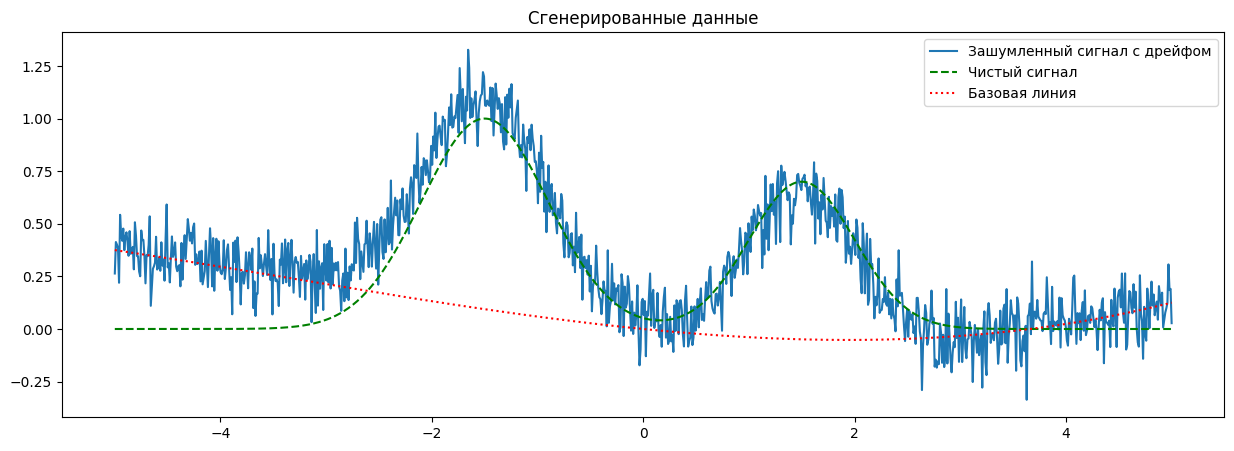

In [8]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def generate_signal(variant, n_samples=1000):
    x = np.linspace(-5, 5, n_samples)
    
    # Полезный сигнал
    mu1 = -2 + variant * 0.1
    sig1 = 0.5 + variant * 0.02
    mu2 = 2 - variant * 0.1
    sig2 = 0.6 - variant * 0.02
    clean_signal = gaussian(x, mu1, sig1) + 0.7 * gaussian(x, mu2, sig2)
    
    # Шум
    noise = np.random.normal(0, 0.1, n_samples)
    
    # Дрейф базовой линии
    baseline = 0.001 * (x**3) + 0.01 * (x**2) - 0.05 * x
    
    # Итоговый сигнал
    noisy_signal = clean_signal + noise + baseline
    
    return noisy_signal, clean_signal, baseline, x

# Генерируем и визуализируем данные
noisy_signal, clean_signal, baseline, x_axis = generate_signal(N)

plt.figure(figsize=(15, 5))
plt.plot(x_axis, noisy_signal, label='Зашумленный сигнал с дрейфом')
plt.plot(x_axis, clean_signal, label='Чистый сигнал', linestyle='--', color='green')
plt.plot(x_axis, baseline, label='Базовая линия', linestyle=':', color='red')
plt.legend()
plt.title('Сгенерированные данные')
plt.show()

### Создание автоэнкодера для шумоподавления
&emsp;Наша первая задача — убрать из сигнала случайный шум. Для этого мы обучим сверточный автоэнкодер. Входными данными для него будет зашумленный сигнал (без базовой линии), а целевыми — чистый сигнал.

&emsp;Как мы помним из лекций, при построении сверточных автоэнкодеров для временных рядов (или любых одномерных сигналов) стоит придерживаться нескольких правил:
* использовать рекуррентный или 1D-сверточные слои, выберем сверточные, рекуррентные нужны для длинных последовательностей. Чтобы добвить 1D сверточный слой, нужно ввести в `__init__` в части энкодера:
    ``` python
    nn.Conv1d(число_входов, число_фильтров, kernel_size=???, stride=???, padding=???), 
    ```
    где у первого слоя число входов будет равно 1, чиcло фильтров - 16, ядро 7, `stride = 2`, `padding = 3`;
* далее нужна нормализация:
    ``` python
    nn.BatchNorm1d(число_фильтров_прошлого_сверточного_слоя),
    ```
* затем нужно добавить активацию ReLU:
    ``` python
    nn.ReLU(inplace = True),
    ```
    где `inplace=True` применит функцию ReLU внутри энкодера без необходимости ручного применения в `forward`;
* такую комбинацию строк нужно повторить еще дважды (получив 3 сверточных слоя с нормализацией и активацией). На каждом последующем слое число фильтров должно увеличиваться в 2 раза, `padding` уменьшаться на 1, размер ядра уменьшаться на 2 для 2 слоя и еще на 3 для третьего;
* в декодере нужно построить обратную комбинацию, заменив `Conv1d` на транспонированную свертку `ConvTranspose1d`:
    * слои в декодере идут так же, как и в энкодере, за исключением третьего повтора комбинации - там не будет нормализации;
    * у всех слоев `ConvTranspose1d` задаем  `padding = 1` и размер ядра 4;
    * число фильтров у `ConvTranspose1d` зеркально числу фильтров `Conv1d` в энкодере (в первом `ConvTranspose1d` наибольшее число, затем в 2 раза меньше), но **в третьем `ConvTranspose1d` 1 фильтр**, чтобы получить одномерные данные (временной ряд) на выходе;
    * для стабильности обучения автоэнкодера лучше добавить на выход `tanh` активацию (при этом позже придется нормировать данные), для этого замените `ReLU` на `Tanh` после третьего  `ConvTranspose1d` (для `Tanh` не нужен аргумент `inplace=True`, она применится и без него);
* добавьте в энкодер после каждого ReLU регуляризацию для сверточного слоя - строку `nn.Dropout(0.2),`;
* в `forward` слои ваших энкодера и декодера применяются по порядку. После реализуется интерполяция - после `ConvTranspose1d` из-за округлений размер выхода может отличаться на 1 отсчет от исхдного, да и согласованность размерностей слоев здесь мы не проверяли (самый лучший подходи - посчитать, какое значение `output_padding` последнему `ConvTranspose1d` нужно задть), из-за чего сигнал может быть растянут в несколько раз. Поэтому линейной интерполяцией уравниваем размер выхода с размером входа. 

In [ ]:
class DenoisingAutoencoder(nn.Module):
    def __init__(self):
        super(DenoisingAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            # слои энкодера
        )
        self.decoder = nn.Sequential(
            # слои декодера
        )
    def forward(self, x):
        original_size = x.size()
        x = self.encoder(x)
        x = self.decoder(x)
        x = nn.functional.interpolate(x, size=original_size[2], mode='linear', align_corners=False)
        return x

### Обучение модели шумоподавления
&emsp;Для обучения нам нужно подготовить данные. Создадим датасет, где входом будет сигнал `clean_signal + noise`, а целью — `clean_signal`. Мы сгенерируем небольшой батч таких сигналов, чтобы модель лучше обобщалась. Для генерации создадим класс, в котором к даннм применяется нормализация в диапазон [-1;1], а сам нормализатор сохраняется, как атрибут класса. С помощью метода `inverse_scaler` можно отменить нормализацию в данных после обработки нейронной сетью.

In [562]:
scaler = lambda x, x_min, x_max: 2*((x-x_min)/(x_max-x_min)) - 1
unscaler = lambda x, x_min, x_max: x_min + (x_max-x_min)*(x+1)/2

In [563]:
class create_denoising_dataset:
    def __init__(self, variant, num_examples=500, n_samples=1000):
        X = []
        Y = []
        min_val, max_val = 0, 0
        for _ in range(num_examples):
            _, clean, _, _ = generate_signal(variant, n_samples)
            noise = np.random.normal(0, 0.1, n_samples)
            X.append(clean + noise)
            Y.append(clean)
            if max(X[-1]) > max_val: max_val = max(X[-1])
            if min(X[-1]) < min_val: min_val = min(X[-1])
        self.min_val = min_val
        self.max_val = max_val
        self.X = X
        self.Y = Y

    def get_tensor_dataset(self):
        X_tensor = torch.tensor(np.array(self._scal_X()), dtype=torch.float32).unsqueeze(1)
        Y_tensor = torch.tensor(np.array(self._scal_Y()), dtype=torch.float32).unsqueeze(1)
        return TensorDataset(X_tensor, Y_tensor)
    
    def scaler(self, X):
        return [scaler(x, self.min_val, self.max_val) for x in X]
    
    def unscaler(self, X):
        return [unscaler(x, self.min_val, self.max_val) for x in X]
    
    def _scal_X(self):
        return [[scaler(x, self.min_val, self.max_val) for x in sublist] for sublist in self.X]
    
    def _scal_Y(self):
        return [[scaler(y, self.min_val, self.max_val) for y in sublist] for sublist in self.Y]

denoising_object = create_denoising_dataset(N)
denoising_dataset = denoising_object.get_tensor_dataset()
denoising_loader = DataLoader(denoising_dataset, batch_size=32, shuffle=True)

&emsp;Теперь напишем стандартный цикл обучения. В качестве функции потерь будем использовать среднеквадратичную ошибку (MSE), так как мы решаем задачу регрессии — предсказываем «чистый» сигнал. Для L2 регуляризации задаем `weight_decay`.

In [564]:
denoiser = DenoisingAutoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.AdamW(denoiser.parameters(), lr=0.01, weight_decay=1e-2)
epochs = 100

Запускаем обучение

In [565]:
denoiser.train()
for epoch in range(epochs):
    epoch_loss = 0
    for data in denoising_loader:
        inputs, targets = data
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()
        outputs = denoiser(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    if epoch % 2 == 0:
        clear_output(True)
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(denoising_loader):.6f}')

Epoch [99/100], Loss: 0.000482


Проверим результат путем подачи в модель использованного ранее в виде примера сигнала с наложенной помехой.

Наибольшая приведенная погрешность: 5.23%


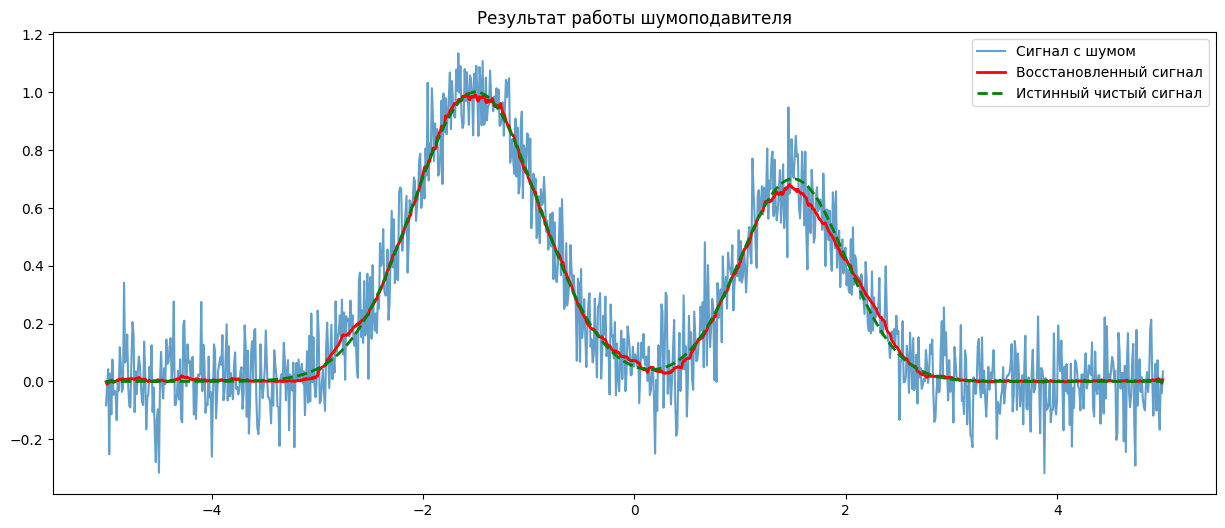

In [566]:
denoiser.eval()
with torch.no_grad():
    # Готовим входной сигнал (с шумом, но без дрейфа)
    signal_with_noise = clean_signal + np.random.normal(0, 0.1, len(clean_signal))
    signal_tensor = torch.tensor(denoising_object.scaler(signal_with_noise), dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
    
    denoised_output = denoiser(signal_tensor)
    denoised_signal = denoising_object.unscaler(denoised_output.cpu().squeeze().numpy())
    delta = max(denoised_signal - clean_signal)/max(clean_signal)*100

print(f'Наибольшая приведенная погрешность: {round(delta,2)}%')
plt.figure(figsize=(15, 6))
plt.plot(x_axis, signal_with_noise, label='Сигнал с шумом', alpha=0.7)
plt.plot(x_axis, denoised_signal, label='Восстановленный сигнал', color='red', linewidth=2)
plt.plot(x_axis, clean_signal, label='Истинный чистый сигнал', color='green', linestyle='--', linewidth=2)
plt.legend()
plt.title('Результат работы шумоподавителя')
plt.show()

### Сравнение с цифровым фильтром

На практике при обработке сигналов применяют цифровые фильтры. Их использование заключается в свертке исходного сигнала с некоторым фильтром, параметры которого задаются либо формулой (фильтр Гаусса, скользящего среднего, медианный) либо вычисляются исходя из области частот, которую в сигнале нужно сохранить (остальные области подавляются). Логично предположить, что возможно подобрать веса фильтра в процессе обучения методом обратного распространения ошибки. В этом случае нужно построить нейронную сеть из одного сверточного слоя с одним входом и одним фильтром. Зададим класс такой нейронной сети и сравним его результаты с автоэнкодером.   

In [567]:
class ConvFilter(nn.Module):
    def __init__(self, filter_window=17):
        super(ConvFilter, self).__init__()
        self.filter_window = filter_window
        self.pad = int((self.filter_window-1)/2)
        self.filter = nn.Conv1d(1, 1, kernel_size=self.filter_window, stride=1, padding=self.pad)

    def forward(self, x):
        original_size = x.size()
        x = self.filter(x)
        x = nn.functional.interpolate(x, size=original_size[2], mode='linear', align_corners=False)
        return x

В классе можно указать ширину окна фильтра при инициализации (**только нечетные целые числа**). Задайте вместо ??? любое случайное **нечетное** число от 3 до 99, на скорость обучения это практически не повлияет.

In [ ]:
simple_filter = ConvFilter(???).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(simple_filter.parameters(), lr=0.01)
epochs = 100

In [569]:
simple_filter.train()
for epoch in range(epochs):
    epoch_loss = 0
    for data in denoising_loader:
        inputs, targets = data
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()
        outputs = simple_filter(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    if epoch % 2 == 0:
        clear_output(True)
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(denoising_loader):.6f}')

Epoch [99/100], Loss: 0.000814


И построим график для оценки результата.

Наибольшая приведенная погрешность: 21.43%


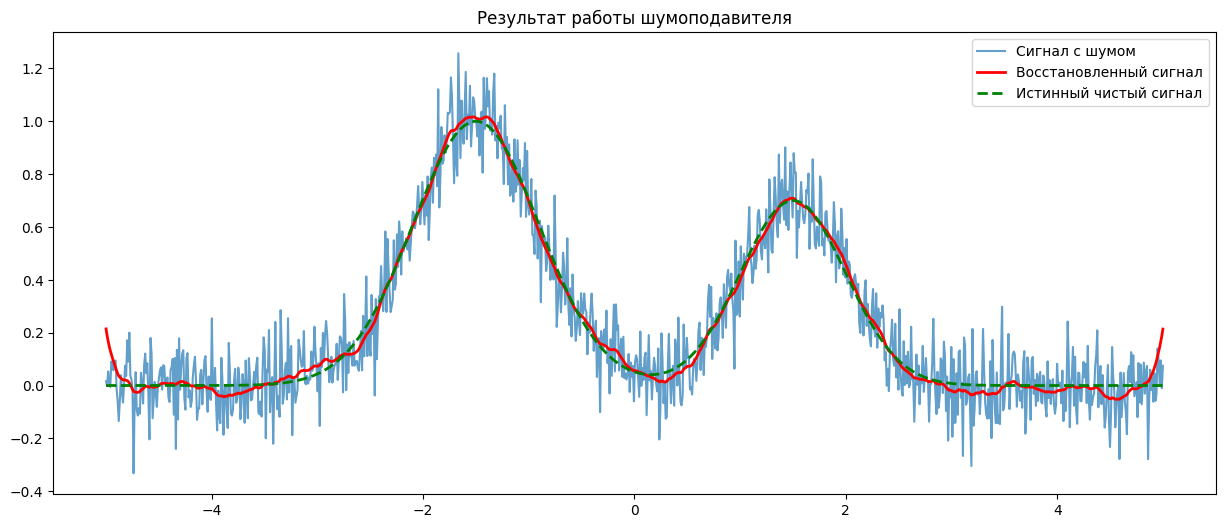

In [571]:
simple_filter.eval()
with torch.no_grad():
    signal_with_noise = clean_signal + np.random.normal(0, 0.1, len(clean_signal))
    signal_tensor = torch.tensor(denoising_object.scaler(signal_with_noise), dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
    denoised_output = simple_filter(signal_tensor)
    denoised_signal = denoising_object.unscaler(denoised_output.cpu().squeeze().numpy())
    delta = max(denoised_signal - clean_signal)/max(clean_signal)*100
print(f'Наибольшая приведенная погрешность: {round(delta,2)}%')
plt.figure(figsize=(15, 6))
plt.plot(x_axis, signal_with_noise, label='Сигнал с шумом', alpha=0.7)
plt.plot(x_axis, denoised_signal, label='Восстановленный сигнал', color='red', linewidth=2)
plt.plot(x_axis, clean_signal, label='Истинный чистый сигнал', color='green', linestyle='--', linewidth=2)
plt.legend()
plt.title('Результат работы шумоподавителя')
plt.show()

**Самостоятельное задание:** подберите для окна фильтра значение от 3 до 99, при котором будет достигнута наименьшая приведенная погрешность восстановленного сигнала.

### Устранение дрейфа базовой линии
&emsp;Теперь, когда у нас есть модель для удаления шума, займемся второй проблемой — дрейфом базовой линии. Мы можем решить эту задачу похожим образом: обучить еще одну модель (или ту же самую на других данных) предсказывать саму базовую линию по зашумленному сигналу, а затем вычесть ее.

&emsp;Для этого мы создадим новый датасет, где входом будет полный зашумленный сигнал (`noisy_signal`), а целью — только базовая линия (`baseline`). Архитектуру автоэнкодера можно использовать ту же самую.

In [610]:
class create_baseline_dataset:
    def __init__(self, variant, num_examples=500, n_samples=1000):
        X = []
        Y = []
        min_val, max_val = 0, 0
        for i in range(num_examples):
            noisy, _ , base, _ = generate_signal(variant, n_samples)
            X.append(noisy)
            Y.append(base)
            if max(X[-1]) > max_val: max_val = max(X[-1])
            if min(X[-1]) < min_val: min_val = min(X[-1])
        self.min_val = min_val
        self.max_val = max_val
        self.X = X
        self.Y = Y

    def get_tensor_dataset(self):
        X_tensor = torch.tensor(np.array(self._scal_X()), dtype=torch.float32).unsqueeze(1)
        Y_tensor = torch.tensor(np.array(self._scal_Y()), dtype=torch.float32).unsqueeze(1)
        return TensorDataset(X_tensor, Y_tensor)
    
    def scaler(self, X):
        return [scaler(x, self.min_val, self.max_val) for x in X]
    
    def unscaler(self, X):
        return [unscaler(x, self.min_val, self.max_val) for x in X]
    
    def _scal_X(self):
        return [[scaler(x, self.min_val, self.max_val) for x in sublist] for sublist in self.X]
    
    def _scal_Y(self):
        return [[scaler(y, self.min_val, self.max_val) for y in sublist] for sublist in self.Y]

baseline_object = create_baseline_dataset(N)
baseline_dataset = baseline_object.get_tensor_dataset()
baseline_loader = DataLoader(baseline_dataset, batch_size=32, shuffle=True)

Обучаем модель для предсказания базовой линии. Вместо ??? подставьте класс лучшей модели из преошлого задания (если это цифровой фильтр - не забудьте указать ширину окна).

In [ ]:
baseline_remover = ???().to(device)
criterion = nn.MSELoss()
optimizer = optim.AdamW(baseline_remover.parameters(), lr=7e-4, weight_decay=2e-3)
epochs = 600

Запускаем обучение

In [613]:
baseline_remover.train()
for epoch in range(epochs):
    epoch_loss = 0
    for inputs, targets in baseline_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = baseline_remover(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    if epoch % 2 == 0:
        clear_output(True)
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(denoising_loader):.6f}')

Epoch [599/600], Loss: 0.002428


Наибольшая приведенная погрешность: 38.09%


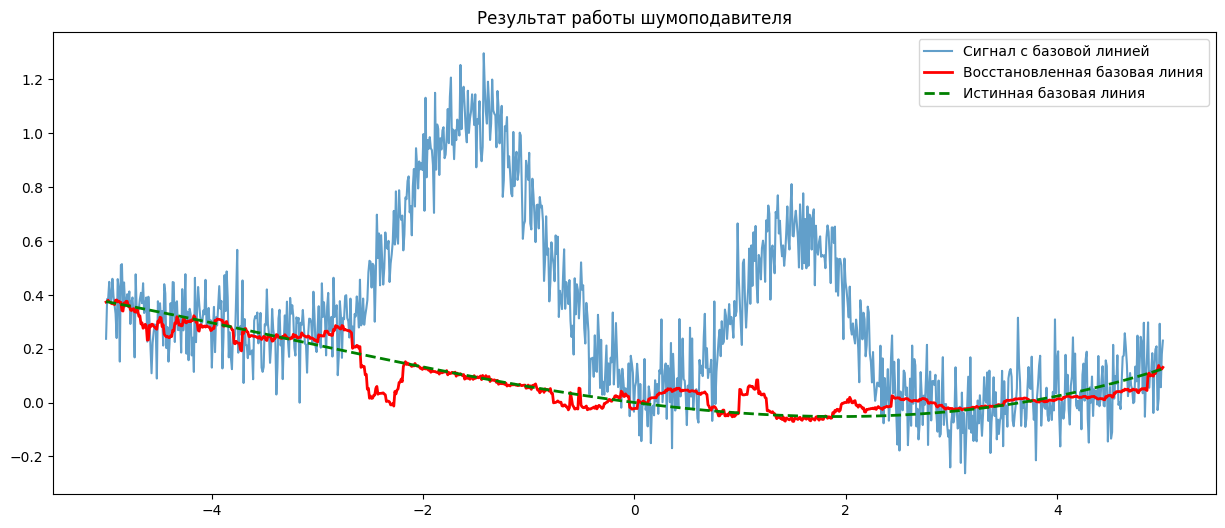

In [617]:
baseline_remover.eval()
with torch.no_grad():
    signal_with_noise = generate_signal(N)[0]
    signal_tensor = torch.tensor(baseline_object.scaler(signal_with_noise), dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
    denoised_output = baseline_remover(signal_tensor)
    # denoised_signal = baseline_object.inverse_scaler(denoised_output.cpu().squeeze().numpy())
    denoised_signal = baseline_object.unscaler(denoised_output.cpu().squeeze().numpy())
    delta = max(denoised_signal - clean_signal)/max(clean_signal)*100
print(f'Наибольшая приведенная погрешность: {round(delta,2)}%')
plt.figure(figsize=(15, 6))
plt.plot(x_axis, signal_with_noise, label='Сигнал с базовой линией', alpha=0.7)
plt.plot(x_axis, denoised_signal, label='Восстановленная базовая линия', color='red', linewidth=2)
plt.plot(x_axis, generate_signal(N)[2], label='Истинная базовая линия', color='green', linestyle='--', linewidth=2)
plt.legend()
plt.title('Результат работы шумоподавителя')
plt.show()

Повысить точность базовой линии можно с помощью регрессии ее параболой (чаще всего в таких сигналах базовая линия именно параболическая). Парабола гладкая кривая и пройдет между всех значений базовой линии.

Наибольшая приведенная погрешность: 40.34%


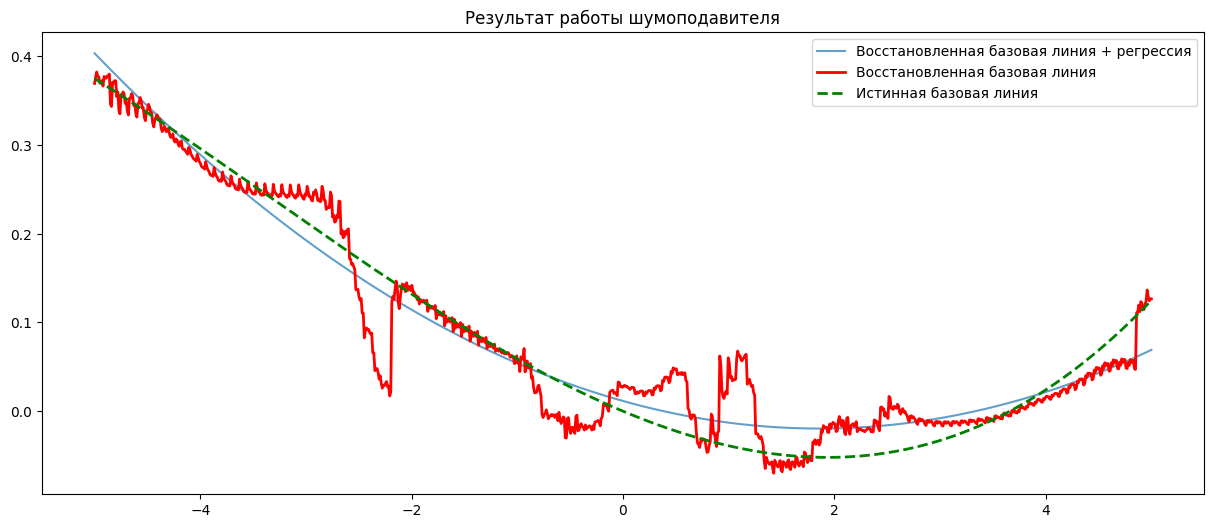

In [615]:
coeffs = np.polyfit(x_axis, denoised_signal, deg=2)
bl_regression = np.poly1d(coeffs)(x_axis) 

delta = max(bl_regression - clean_signal)/max(clean_signal)*100
print(f'Наибольшая приведенная погрешность: {round(delta,2)}%')
plt.figure(figsize=(15, 6))
plt.plot(x_axis, bl_regression, label='Восстановленная базовая линия + регрессия', alpha=0.7)
plt.plot(x_axis, denoised_signal, label='Восстановленная базовая линия', color='red', linewidth=2)
plt.plot(x_axis, generate_signal(N)[2], label='Истинная базовая линия', color='green', linestyle='--', linewidth=2)
plt.legend()
plt.title('Результат работы шумоподавителя')
plt.show()

Выводим результат.

&emsp;Теперь применим обе модели последовательно: сначала `baseline_remover`, чтобы предсказать и вычесть базовую линию, а затем `denoiser`, чтобы очистить оставшийся сигнал от шума.

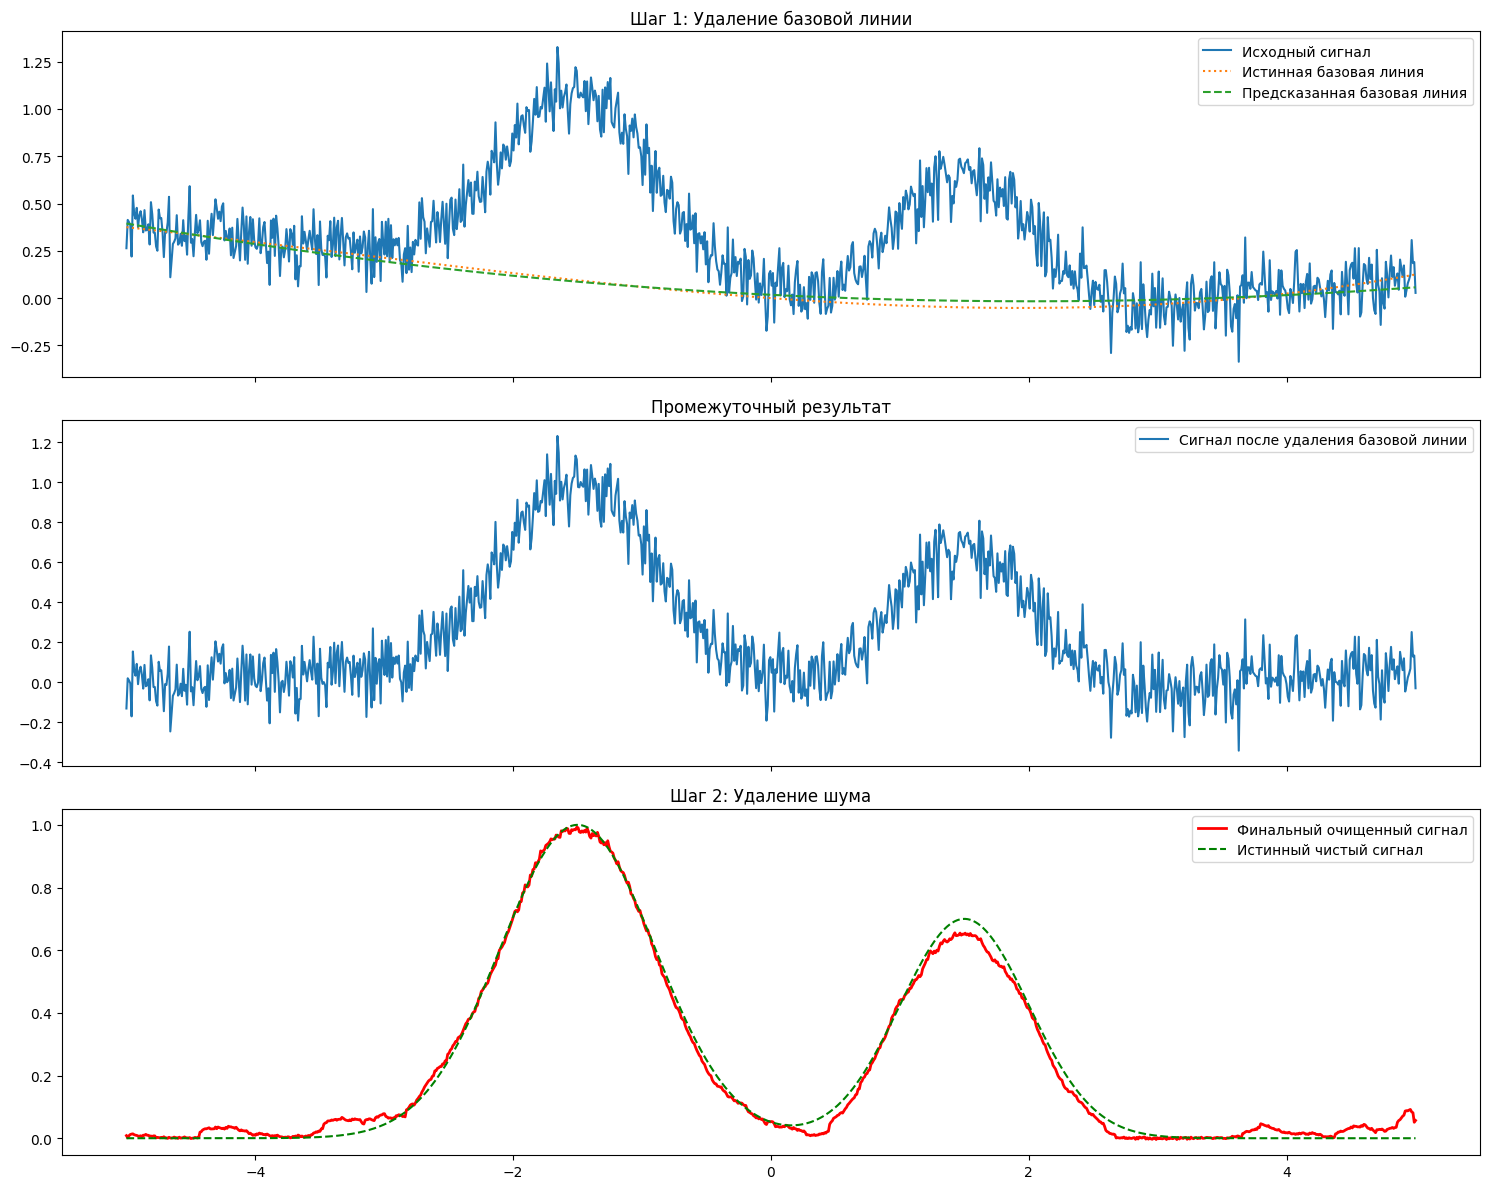

In [623]:
baseline_remover.eval()
denoiser.eval()

with torch.no_grad():
    # Шаг 1: Предсказываем и удаляем базовую линию
    noisy_signal_tensor = torch.tensor(baseline_object.scaler(generate_signal(N)[0]), dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
    predicted_baseline_tensor = baseline_remover(noisy_signal_tensor)
    predicted_baseline = baseline_object.unscaler(predicted_baseline_tensor.cpu().squeeze().numpy())
    coeffs = np.polyfit(x_axis, predicted_baseline, deg=2)
    predicted_baseline = np.poly1d(coeffs)(x_axis) 
    signal_without_baseline = noisy_signal - predicted_baseline
    
    # Шаг 2: Удаляем шум из сигнала без базовой линии
    signal_without_baseline_tensor = torch.tensor(denoising_object.scaler(signal_without_baseline), dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
    final_output_tensor = denoiser(signal_without_baseline_tensor)
    final_signal = denoising_object.unscaler(final_output_tensor.cpu().squeeze().numpy())

# Визуализация всех этапов
fig, axs = plt.subplots(3, 1, figsize=(15, 12), sharex=True)

axs[0].plot(x_axis, noisy_signal, label='Исходный сигнал')
axs[0].plot(x_axis, baseline, label='Истинная базовая линия', linestyle=':')
axs[0].plot(x_axis, predicted_baseline, label='Предсказанная базовая линия', linestyle='--')
axs[0].set_title('Шаг 1: Удаление базовой линии')
axs[0].legend()

axs[1].plot(x_axis, signal_without_baseline, label='Сигнал после удаления базовой линии')
axs[1].set_title('Промежуточный результат')
axs[1].legend()

axs[2].plot(x_axis, final_signal, label='Финальный очищенный сигнал', color='red', linewidth=2)
axs[2].plot(x_axis, clean_signal, label='Истинный чистый сигнал', color='green', linestyle='--')
axs[2].set_title('Шаг 2: Удаление шума')
axs[2].legend()

plt.tight_layout()
plt.show()

**Примечение:** для улучшения результатов можно собрать датасет из восстановленных на текущем этапе сигналов и исходных, без помехи и использовать эти данные для обучения еще одной модели, задача которой - максимально сгладить сигналы. Таким образом будет получен конвейер: модель для устранения базовой линии -> модель для регрессия базовой линии -> модель устранения помехи -> модель сглаживания сигнала. Использовать тот же энкодер как правило бессмысленно в качестве сглаживающей модели, поскольку сглаживание и является фильтрацией, добавлением еще одного автоэнкодера будет подобно усложнению архитектуры исходного энкодера для подавления помехи, а как вы знаете, бездумное усложнение архитектуры приводит к переобучению, из-за чего конечный результат слабо бы отличался от текущего.

## Часть 2. Генерация изображений

&emsp;В этой части мы познакомимся с тремя популярными генеративными моделями: вариационным автоэнкодером (VAE), условным вариационным автоэнкодером (CVAE) и генеративно-состязательной сетью (GAN). Мы будем использовать простой и популярный датасет MNIST, состоящий из рукописных цифр.

### Подготовка данных
&emsp;Загрузим датасет MNIST с помощью `torchvision`. Мы будем использовать `DataLoader` для удобной подачи данных в модель батчами.

In [624]:
transform = transforms.Compose([
    transforms.ToTensor(), # Преобразует изображение в тензор и нормализует в [0, 1]
    # transforms.Normalize((0.5,), (0.5,)) # Можно добавить нормализацию в [-1, 1]
])

batch_size = 128

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 9.91M/9.91M [00:18<00:00, 536kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 143kB/s]
100%|██████████| 1.65M/1.65M [00:05<00:00, 288kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.54MB/s]


### Вариационный автоэнкодер (VAE)
&emsp;VAE — это одна из простейших для генерации изображений модель. Задаем ее архитектуру.

In [ ]:
class VAE(nn.Module):
    def __init__(self, latent_dim=20):
        super().__init__()
        # энкодер
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 512), nn.ReLU(inplace=True),
            nn.Linear(512, 256),   nn.ReLU(inplace=True),
        )
        self.fc_mu      = nn.Linear(256, latent_dim)
        self.fc_log_var = nn.Linear(256, latent_dim)
        # декодер
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256), nn.ReLU(inplace=True),
            nn.Linear(256, 512),        nn.ReLU(inplace=True),
            nn.Linear(512, 28*28),
            nn.Sigmoid()
        )

    def encode(self, x):
        h = self.encoder(x)
        return self.fc_mu(h), self.fc_log_var(h)

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):   
        return self.decoder(z) 

    def forward(self, x):
        x = x.view(x.size(0), -1)
        mu, log_var = self.encode(x)
        z = self.reparameterize(mu, log_var)
        recon = self.decode(z)
        return recon, mu, log_var

&emsp;Теперь определим функцию потерь и цикл обучения. Помните, что `loss = reconstruction_loss + KL_divergence`.

In [626]:
def vae_loss_function(recon_x, x, mu, log_var):
    # Ошибка реконструкции (для MNIST хорошо подходит бинарная кросс-энтропия)
    BCE = nn.functional.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    # KL-дивергенция
    KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return BCE + KLD

vae_model = VAE().to(device)
optimizer = optim.Adam(vae_model.parameters(), lr=1e-3)
epochs = 10

vae_model.train()
for epoch in range(epochs):
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, log_var = vae_model(data)
        loss = vae_loss_function(recon_batch, data, mu, log_var)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    print(f'Epoch: {epoch+1} Average loss: {train_loss / len(train_loader.dataset):.4f}')

====> Epoch: 1 Average loss: 174.7262
====> Epoch: 2 Average loss: 126.5198
====> Epoch: 3 Average loss: 116.1692
====> Epoch: 4 Average loss: 111.8813
====> Epoch: 5 Average loss: 109.1439
====> Epoch: 6 Average loss: 107.2125
====> Epoch: 7 Average loss: 105.7890
====> Epoch: 8 Average loss: 104.7516
====> Epoch: 9 Average loss: 103.8757
====> Epoch: 10 Average loss: 103.1995


### Генерация новых изображений с помощью VAE
&emsp;После обучения мы можем использовать только декодер. Сэмплируя случайные векторы $z$ из стандартного нормального распределения и подавая их в декодер, мы будем получать новые изображения цифр.

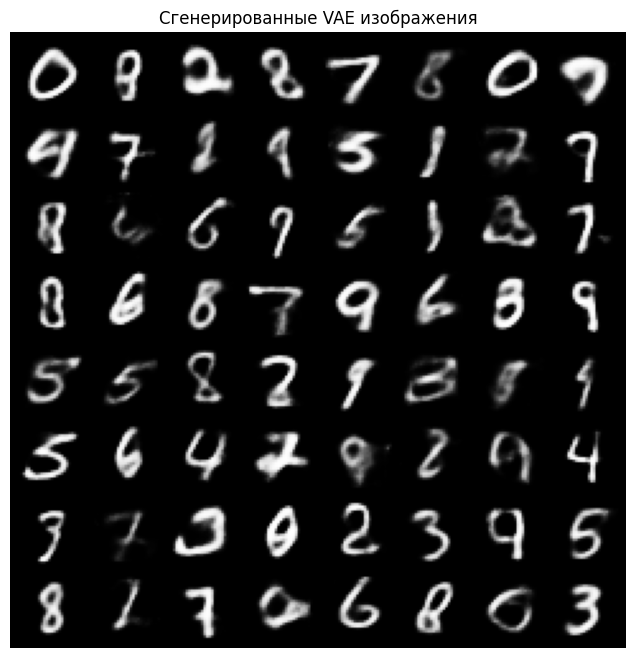

In [627]:
vae_model.eval()
with torch.no_grad():
    # Сэмплируем 64 случайных вектора из латентного пространства
    z = torch.randn(64, 20).to(device) # latent_dim = 20
    sample = vae_model.decode(z).cpu()
    
    # Преобразуем выход в сетку изображений для визуализации
    grid = torchvision.utils.make_grid(sample.view(64, 1, 28, 28), nrow=8)
    plt.figure(figsize=(8, 8))
    plt.imshow(grid.permute(1, 2, 0))
    plt.axis('off')
    plt.title('Сгенерированные VAE изображения')
    plt.show()

### Условный VAE (CVAE)
&emsp;CVAE — это расширение VAE, которое позволяет генерировать данные с учетом некоторого условия (например, метки класса). Это достигается путем подачи вектора условия (в нашем случае, one-hot кодированной метки цифры) как в энкодер, так и в декодер. Это позволяет нам контролировать, какую именно цифру мы хотим сгенерировать.

In [631]:
class CVAE(nn.Module):
    def __init__(self, latent_dim=20, num_classes=10):
        super().__init__()
        self.latent_dim = latent_dim
        self.num_classes = num_classes
        self.encoder = nn.Sequential(
            nn.Linear(28*28 + num_classes, 512), nn.ReLU(inplace=True),
            nn.Linear(512, 256), nn.ReLU(inplace=True),
        )
        self.fc_mu = nn.Linear(256, latent_dim)
        self.fc_log_var = nn.Linear(256, latent_dim)
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim + num_classes, 256), nn.ReLU(inplace=True),
            nn.Linear(256, 512), nn.ReLU(inplace=True),
            nn.Linear(512, 28*28), nn.Sigmoid()
        )

    def encode(self, x, y):
        h = self.encoder(torch.cat([x, y], dim=1))
        return self.fc_mu(h), self.fc_log_var(h)

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z, y):
        return self.decoder(torch.cat([z, y], dim=1))

    def forward(self, x, y):
        x = x.view(x.size(0), -1)
        mu, log_var = self.encode(x, y)
        z = self.reparameterize(mu, log_var)
        recon = self.decode(z, y)
        return recon, mu, log_var

    def sample(self, num_samples, y):
        if isinstance(y, int):
            y = torch.full((num_samples,), y, dtype=torch.long, device=next(self.parameters()).device)
        y_onehot = torch.zeros(num_samples, self.num_classes, device=next(self.parameters()).device)
        y_onehot.scatter_(1, y.view(-1, 1), 1)
        z = torch.randn(num_samples, self.latent_dim, device=next(self.parameters()).device)
        return self.decode(z, y_onehot)

# Обучение CVAE (цикл очень похож на VAE, но в него передаются еще и метки)
cvae_model = CVAE().to(device)
optimizer = optim.Adam(cvae_model.parameters(), lr=1e-3)
epochs = 10

cvae_model.train()
for epoch in range(epochs):
    train_loss = 0
    for batch_idx, (data, labels) in enumerate(train_loader):
        data = data.to(device)
        labels = labels.to(device)
        y_onehot = torch.zeros(labels.size(0), 10, device=device)
        y_onehot.scatter_(1, labels.view(-1, 1), 1)
        optimizer.zero_grad()
        recon_batch, mu, log_var = cvae_model(data, y_onehot)
        loss = vae_loss_function(recon_batch, data.view(data.size(0), -1), mu, log_var)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    print(f'Epoch: {epoch+1} Average loss: {train_loss / len(train_loader.dataset):.4f}')


Epoch: 1 Average loss: 166.3319
Epoch: 2 Average loss: 120.6262
Epoch: 3 Average loss: 111.5764
Epoch: 4 Average loss: 107.1695
Epoch: 5 Average loss: 104.5784
Epoch: 6 Average loss: 102.7263
Epoch: 7 Average loss: 101.4726
Epoch: 8 Average loss: 100.3280
Epoch: 9 Average loss: 99.5062
Epoch: 10 Average loss: 98.7372


**Самостоятельное задание:**
* задайте массив из 4 генерируемых цифр в переменной `digits_to_generate`;
* внутри конструкции `with torch.no_grad` вызовите для каждой цифры код генерации вместо ???:
    ```python
    generated_samples = cvae_model.sample(num_samples=K, y=digit)
    samples.append(generated_samples)
    ```
    где K замените на число генерируемых образцов - $4 + N/10$, где N - номер вашего варианта (округлить K до целого);
* также замените упоминания K на то же число в строке `grid = ...`;
* запустите ячейку.

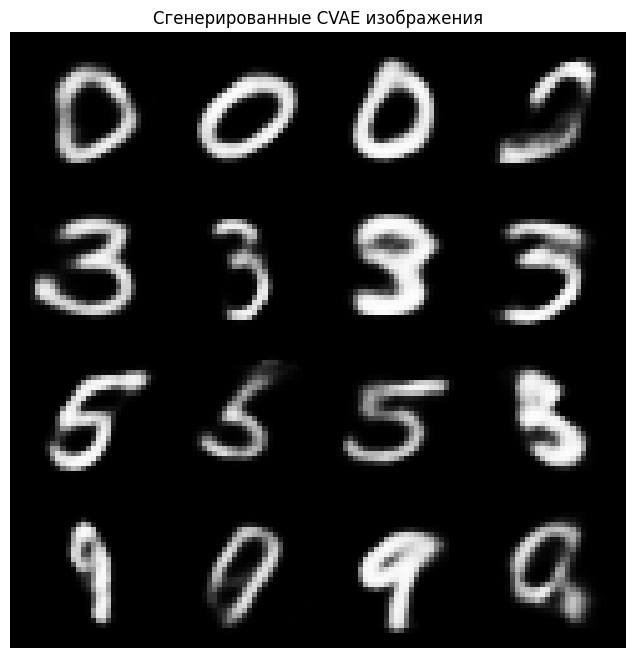

In [ ]:
cvae_model.eval()
samples = []
digits_to_generate = ???

with torch.no_grad():
    ???
    all_samples = torch.cat(samples)
    grid = torchvision.utils.make_grid(all_samples.cpu().view(len(digits_to_generate)*K, 1, 28, 28), nrow=K)
    plt.figure(figsize=(8, 8))
    plt.imshow(grid.permute(1, 2, 0))
    plt.axis('off')
    plt.title('Сгенерированные CVAE изображения')
    plt.show()

## Часть 3. Распознавание речи

&emsp;В заключительной части мы попробуем создать очень простую модель для распознавания речи и сравним ее производительность с современной предобученной моделью Whisper от OpenAI. Наша цель — не достичь высокого качества, а понять основные принципы работы таких систем и увидеть разницу между простой моделью, обученной на малых данных, и state-of-the-art решением.

### Подготовка данных
&emsp;Создадим наш собственный мини-датасет. С помощью библиотеки `gTTS` (Google Text-to-Speech) мы сгенерируем аудиофайлы для нескольких простых русских слов. Это позволит нам полностью контролировать данные для обучения.

In [680]:
link = 'https://github.com/heymynameis/mdl_ims/raw/refs/heads/main/labs/lab5/tsoi1008.txt'

response = requests.get(link)
file_content = response.text
if '\ufeff' in file_content: file_text = file_content.replace('\ufeff','').lower()
else: file_text = file_content.lower()
if '\r\n' in file_text: file_text = file_text.replace('\r\n', ' ')
else: file_text = file_text.replace('\n', ' ')
file_text = re.sub(r'[^А-Яа-яЁё ]', '', file_text)
all_words = list(set(file_text.split()))
words = sorted(all_words, key=len, reverse=True)[:700][::700//100]
words

['многозначительно',
 'превратилась',
 'растворяюсь',
 'вероятность',
 'рассмешите',
 'отбрасываю',
 'завтрашнем',
 'количеству',
 'встречаешь',
 'улыбнулась',
 'одинокому',
 'диафрагмы',
 'следовать',
 'созвездий',
 'останутся',
 'разгадать',
 'пролетают',
 'проснулся',
 'помещений',
 'телефонов',
 'затухает',
 'камчатка',
 'смотрите',
 'радостно',
 'двадцать',
 'промочил',
 'закрываю',
 'школьник',
 'никакого',
 'встретил',
 'объявляю',
 'зазвонит',
 'гоизонте',
 'красивый',
 'печалься',
 'утратили',
 'выселках',
 'солдатом',
 'сломался',
 'дрогнет',
 'кожаных',
 'одеялом',
 'остался',
 'нарушен',
 'сделать',
 'сеьезно',
 'длинные',
 'каждому',
 'достать',
 'мудреца',
 'пытаюсь',
 'городом',
 'подруга',
 'пожелай',
 'пустуют',
 'звонков',
 'веселую',
 'сестрой',
 'крепкий',
 'сыграли',
 'подумал',
 'оркестр',
 'платком',
 'ставить',
 'встречи',
 'незачем',
 'взгляни',
 'уезжает',
 'больше',
 'видишь',
 'слышна',
 'окурок',
 'шутник',
 'курить',
 'черное',
 'сминаю',
 'апрель',
 'стар

In [ ]:
data_dir = 'speech_data'
os.makedirs(data_dir, exist_ok=True)

print("Генерация аудиофайлов...")
for word in words:
    tts = gTTS(text=word, lang='ru')
    file_path = os.path.join(data_dir, f"{word}.mp3")
    tts.save(file_path)
print("Аудиофайлы сгенерированы.")

Audio(os.path.join(data_dir, f'{words[0]}.mp3'))

Генерация аудиофайлов...
Аудиофайлы сгенерированы.


&emsp;Теперь нам нужно преобразовать аудио в формат, понятный для нейронной сети. Обычно для этого аудиосигнал переводят в **спектрограмму** или **MFCC** (Mel-Frequency Cepstral Coefficients, спектрограмма, адаптированная под наиболее распознаваемые человеком частоты). Мы будем использовать MFCC, так как они хорошо зарекомендовали себя в распознавании речи. Также мы создадим словарь для преобразования символов в числа.

Создаем словарь символов. Добавим символ '_' для CTC Loss (blank token). Добавим некоторые прикладные функции.

In [ ]:
chars = sorted(list(set(''.join(words))))
char_to_int = {ch: i+1 for i, ch in enumerate(chars)}
int_to_char = {i+1: ch for i, ch in enumerate(chars)}
char_to_int['_'] = 0
int_to_char[0] = '_'
vocab_size = len(char_to_int)
print(f"Словарь: {char_to_int}")
print(f"Размер словаря: {vocab_size}")

def text_to_sequence(text, char_map):
    return [char_map[char] for char in text]

def audio_to_mfcc(file_path, n_mfcc=13):
    signal, sample_rate = librosa.load(file_path, sr=16000)
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=n_mfcc)
    return torch.tensor(mfccs, dtype=torch.float32).T

def plot_mfcc(file_path, n_mfcc=13):
    signal, sr = librosa.load(file_path, sr=16000)
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)

    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title("MFCC спектрограмма")
    plt.show()

Словарь: {'а': 1, 'б': 2, 'в': 3, 'г': 4, 'д': 5, 'е': 6, 'ж': 7, 'з': 8, 'и': 9, 'й': 10, 'к': 11, 'л': 12, 'м': 13, 'н': 14, 'о': 15, 'п': 16, 'р': 17, 'с': 18, 'т': 19, 'у': 20, 'ф': 21, 'х': 22, 'ц': 23, 'ч': 24, 'ш': 25, 'щ': 26, 'ъ': 27, 'ы': 28, 'ь': 29, 'ю': 30, 'я': 31, '_': 0}
Размер словаря: 32


Готовим датасет и создаем несколько вариантов слов для аугментации и для примера выводим MFCC спектрограмму записи одного слова.

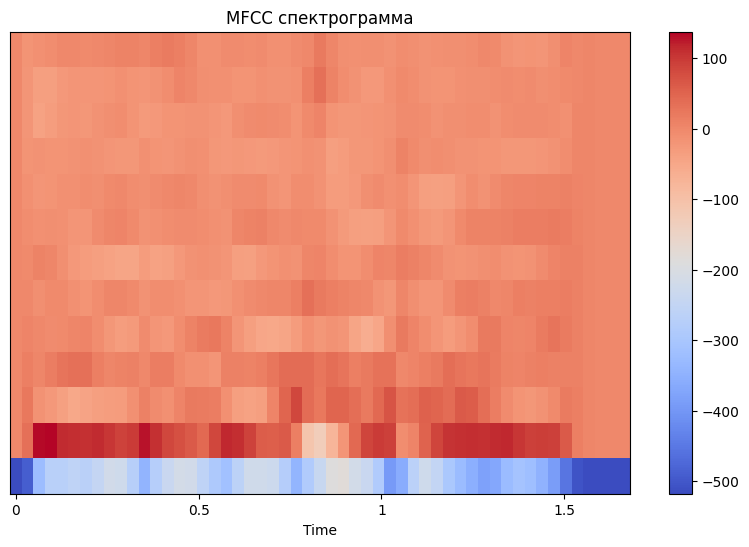

In [685]:
X_speech = []
Y_speech = []
input_lengths = []
label_lengths = []

for word in words:
    for _ in range(10):
        file_path = os.path.join(data_dir, f"{word}.mp3")
        mfcc = audio_to_mfcc(file_path)
        X_speech.append(mfcc)
        
        seq = text_to_sequence(word, char_to_int)
        Y_speech.append(torch.tensor(seq, dtype=torch.long))
        
        input_lengths.append(mfcc.shape[0])
        label_lengths.append(len(seq))

plot_mfcc(os.path.join(data_dir, f"{words[0]}.mp3"), n_mfcc=13)

Создаем речевые датасеты

In [686]:
# Паддинг последовательностей до одинаковой длины
X_speech_padded = nn.utils.rnn.pad_sequence(X_speech, batch_first=True, padding_value=0)
Y_speech_padded = nn.utils.rnn.pad_sequence(Y_speech, batch_first=True, padding_value=0)

speech_dataset = TensorDataset(X_speech_padded, Y_speech_padded, torch.tensor(input_lengths), torch.tensor(label_lengths))
speech_loader = DataLoader(speech_dataset, batch_size=4, shuffle=True)

### Создание и обучение простой модели
&emsp;Наша модель будет состоять из рекуррентного слоя (GRU), который хорошо подходит для обработки последовательностей, и полносвязного слоя, который будет предсказывать символы. Для обучения таких моделей используется специальная функция потерь — **Connectionist Temporal Classification (CTC)**. Она позволяет обучать модель на данных, где нет точного выравнивания между входной последовательностью (MFCC) и выходной (текст).

In [ ]:
class SpeechRecognitionModel(nn.Module):
    def __init__(self, n_mfcc, hidden_size, num_classes):
        super(SpeechRecognitionModel, self).__init__()
        self.gru = nn.GRU(input_size=n_mfcc, hidden_size=hidden_size, num_layers=2, 
                          batch_first=True, bidirectional=True)
        self.classifier = nn.Linear(hidden_size * 2, num_classes)

    def forward(self, x):
        x, _ = self.gru(x)
        x = self.classifier(x)
        return nn.functional.log_softmax(x, dim=2)

speech_model = SpeechRecognitionModel(n_mfcc=13, hidden_size=128, num_classes=vocab_size).to(device)
optimizer = optim.Adam(speech_model.parameters(), lr=5e-4)
ctc_loss = nn.CTCLoss(blank=0, reduction='mean')
epochs = 100

speech_model.train()
for epoch in range(epochs):
    epoch_loss = 0
    for mfccs, labels, input_len, label_len in speech_loader:
        mfccs, labels = mfccs.to(device), labels.to(device)
        optimizer.zero_grad()
        
        outputs = speech_model(mfccs) 
        outputs = outputs.permute(1, 0, 2)
        
        loss = ctc_loss(outputs, labels, input_len, label_len)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(speech_loader)}')

Epoch [10/100], Loss: 0.0082
Epoch [20/100], Loss: 0.0010
Epoch [30/100], Loss: 0.0002
Epoch [40/100], Loss: 0.0010
Epoch [50/100], Loss: 0.0002
Epoch [60/100], Loss: 0.0001
Epoch [70/100], Loss: 0.0000
Epoch [80/100], Loss: 0.0000
Epoch [90/100], Loss: 0.0000
Epoch [100/100], Loss: 0.0000


### Сравнение с Whisper
&emsp;Теперь самое интересное. Проверим нашу модель на одном из сгенерированных файлов и сравним результат с тем, что выдаст большая предобученная модель Whisper. Для декодирования выхода нашей модели мы будем использовать простой жадный алгоритм (берем самый вероятный символ на каждом шаге и убираем дубликаты и blank-токены).

In [695]:
def greedy_decoder(output, int_to_char_map):
    best_path = torch.argmax(output, dim=1)
    decoded_text = []
    prev_char = None
    for i in best_path:
        char_int = i.item()
        if char_int != 0 and char_int != prev_char: # Убираем blank и дубликаты
            decoded_text.append(int_to_char_map[char_int])
        prev_char = char_int
    return ''.join(decoded_text)

model_results = []
print("--- Результаты ---")
for word in words[::len(words)//15]:
    # Выбираем аудиофайл для теста
    audio_path = os.path.join(data_dir, f'{word}.mp3')

    # --- Тестирование нашей модели ---
    speech_model.eval()
    with torch.no_grad():
        mfcc_test = audio_to_mfcc(audio_path).unsqueeze(0).to(device)
        output_test = speech_model(mfcc_test)
        # Убираем batch измерение и переставляем для декодера
        output_test = output_test.permute(1, 0, 2).squeeze(1)
        model_res = greedy_decoder(output_test.cpu(), int_to_char)
        model_results.append(model_res)
    print('*'*10)
    print(f"Файл: {os.path.basename(audio_path)}")
    print(f"Распознано: '{model_res}'")

--- Результаты ---
**********
Файл: многозначительно.mp3
Распознано: 'многозначительно'
**********
Файл: завтрашнем.mp3
Распознано: 'завтрашненм'
**********
Файл: следовать.mp3
Распознано: 'следоват'
**********
Файл: помещений.mp3
Распознано: 'помещени'
**********
Файл: двадцать.mp3
Распознано: 'двадцат'
**********
Файл: объявляю.mp3
Распознано: 'объявляю'
**********
Файл: выселках.mp3
Распознано: 'выселках'
**********
Файл: остался.mp3
Распознано: 'остался'
**********
Файл: достать.mp3
Распознано: 'достат'
**********
Файл: пустуют.mp3
Распознано: 'пустуют'
**********
Файл: подумал.mp3
Распознано: 'подумал'
**********
Файл: взгляни.mp3
Распознано: 'взгляни'
**********
Файл: шутник.mp3
Распознано: 'шутник'
**********
Файл: думать.mp3
Распознано: 'думат'
**********
Файл: покажи.mp3
Распознано: 'покажи'
**********
Файл: гостем.mp3
Распознано: 'гостем'
**********
Файл: увидим.mp3
Распознано: 'увидим'


&emsp;А теперь вызовем Whisper и посмотрим, как он справится с этой же задачей. Мы будем использовать базовую модель (`tiny`), так как она достаточно компактна и быстра. Для реальных задач самый оптимальный выбор - модель `turbo`, она является оптимизированной версией `large` и работает почти также быстро, как `tiny` (разве что занимат много больше) при качестве восстановления существенно выше (`tiny` ошибается на 16%+ чаще). 

In [697]:
print("Загрузка модели Whisper...")
model_name = "tiny"
# Используем device, который определили в начале
whisper_model = whisper.load_model(model_name, device=device)

for i, word in enumerate(words[::len(words)//15]):
    audio_path = os.path.join(data_dir, f'{word}.mp3')
    result = whisper_model.transcribe(audio_path, language="ru")
    whisper_transcription = result["text"]

    print(f"Whisper: '{whisper_transcription}'")
    print(f"Своя модель: '{model_results[i]}'")

Загрузка модели Whisper...
Whisper: ' на безначительна.'
Своя модель: 'многозначительно'
Whisper: ' Завтрашнем.'
Своя модель: 'завтрашненм'
Whisper: ' Следовать.'
Своя модель: 'следоват'
Whisper: ' Russia'
Своя модель: 'помещени'
Whisper: ' Двадцать.'
Своя модель: 'двадцат'
Whisper: ' Объявляем.'
Своя модель: 'объявляю'
Whisper: ' Выселках.'
Своя модель: 'выселках'
Whisper: ' Остался.'
Своя модель: 'остался'
Whisper: ' До встречи!'
Своя модель: 'достат'
Whisper: ' Пустой от.'
Своя модель: 'пустуют'
Whisper: ' Подумал.'
Своя модель: 'подумал'
Whisper: ' Узблинни!'
Своя модель: 'взгляни'
Whisper: ' Шутник.'
Своя модель: 'шутник'
Whisper: ' Ну, мать.'
Своя модель: 'думат'
Whisper: ' покажи.'
Своя модель: 'покажи'
Whisper: ' гостям!'
Своя модель: 'гостем'
Whisper: ' Увидим.'
Своя модель: 'увидим'


Сымитируем неразборчивую речь. Можно видеть, как модель "галлюцинирует" (не всегда с первого раза) - вставляет в места без разборчивой речи фрагменты из исходных данных.

In [710]:
absourd = 'шашашашашаша'
tts_for_whisper = gTTS(text=absourd, lang='ru')
file_path = os.path.join(data_dir, "абсурд.mp3")
tts_for_whisper.save(file_path)

print(whisper_model.transcribe(file_path, language="ru")["text"])
Audio(os.path.join(data_dir, "абсурд.mp3"))

 С, С, С, С, С, С.


**Самостоятельное задание:** зафиксируйте полученные слова от whisper и вашей модели.

## Сдача работы

**При сдаче работы, для получения оценки, выполните при преподавателе задания или ответьте на вопросы:**
* *часть 1 - фильтрация автоэнкодером:*
    * какая модель оказалась адекватнее? Если сопоставимы, то как вы считаете - почему? Ведь архитектура существенно сложнее у автоэнкодера;
    * смените Dropout на 0.5 и L2 регуляризацию на 0.1;
    * измените в первом свертоном слое число фильтров на $M$ (заданное преподавателем число) и согласуйте с этим изменением остальные слои;
* *часть 2  генерация изображений:*
    * смените цифры, для которых генерируются изображения; 
    * измените число повторов (задавали вместо K) на число, заданное преподавателем;
    * как CVAE учитывает числа, подаваемые в качестве меток классов при генерации?
* *часть 3 - распознавание речи*
    * добавьте в массив слов `words` 5 цензурных существующих слов;
    * смените тип модели Whisper на `base`. Проверьте результаты генерации моделью и whisper;
    * смените код в ячейке сравнения вашей модели с Whisper:
    ``` python
    for i, word in enumerate(words[::len(words)//15])
    ```
    на тот, при котором распознавание происходило бы только для новыз слов;
    * зачем при распознавании речи спектрограмма?